# Analysez des données de systèmes éducatifs

## Introduction

### Contexte

Vous êtes Data Scientist dans une start-up de la EdTech, nommée academy, qui propose des contenus de formation en ligne pour un public de niveau lycée et université.

Mark, votre manager, vous a convié à une réunion pour vous présenter le projet d’expansion à l’international de l’entreprise. Il vous confie une première mission d’analyse exploratoire, pour déterminer si les données sur l’éducation de la banque mondiale permettent d’informer le projet d’expansion.

Mark aimerait explorer les pays avec un fort potentiel de clients pour les services de academy, et comment ce potentiel pourrait évoluer.

### Liens

- [Banque mondiale](https://datacatalog.worldbank.org/dataset/education-statistics)
- [Télécharger les données](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/Projet+-+Donn%C3%A9es+%C3%A9ducatives/Projet+Python_Dataset_Edstats_csv.zip)
- [Plus d'infos](http://datatopics.worldbank.org/education/)

### Objectifs

- Valider la qualité de ce jeu de données :
  - Comporte-t-il beaucoup de données manquantes ?
  - Comporte-t-il beaucoup de données dupliquées ?
- Décrire les informations contenues dans le jeu de données :
  - Nombre de colonnes ?
  - Nombre de lignes ?
- Sélectionner les informations qui semblent pertinentes pour répondre à la problématique :
  - Quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?
- Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde :
  - Moyenne
  - Médiane
  - Écart-type par pays / par continent ou bloc géographique

### Problématique

__Ce jeu de donnée peut-il informer les décisions d'ouverture vers de nouveaux pays pour une start-up qui propose des contenus de formation en ligne pour un public de niveau lycée et université ?__

## Setup

### Install Python

From [here](https://www.python.org/downloads/)

### Create a virtual environment

Via VSC : Cmd + Shft + P -> 'Python: Create Environment' -> Venv -> Choose Python to use as base
Created venv is activated automatically.

### Install jupyter

Send `pip install notebook` in a terminal.

### Launch jupyter notebook

Send `jupyter notebook` to open jupyter.
Create a new notebook.

### Install pandas

In [5]:
%pip install pandas

#### Check the version of the installed package

In [6]:
%pip list # get the list of all packages installed, then find pandas -> version is 2.2.3

Note: you may need to restart the kernel to use updated packages.


In [7]:
# other method to return pandas version directly
%pip freeze | findstr pandas

pandas==2.2.3
Note: you may need to restart the kernel to use updated packages.


[This website](https://pandas.pydata.org/) tells us that 2.2.3 is the latest version :  

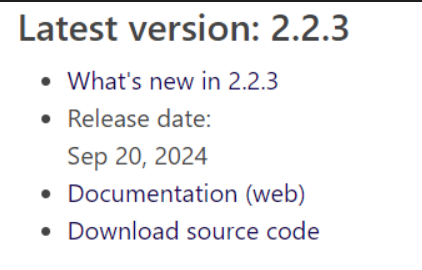

## Step 1 : Menez une analyse générale des données

### Cours : Découvrez les librairies Python pour la Data Science

#### Prise en main des [Numpy](https://numpy.org/doc/2.1/user/index.html#user) Arrays

- Avantages des Arrays :  
  - Mémoire définie pour chaque élément -> moins de mémoire
  - Opérations plus rapides (jusqu'à 30 fois plus rapide qu'une liste classique)
- NumPy (pour Numerical Python) est une librairie Python permettant de manipuler et d’effectuer rapidement et simplement de nombreuses opérations mathématiques sur un tableau de données.
- Les données sont stockées dans une structure similaire à une liste Python, un tableau NumPy, ou array.
- Ce dernier, contrairement à une liste, est obligatoirement monotype.
- On peut sélectionner au sein d’un array :
  - un élément via son indice avec l’écriture :  nom_array[indice]  ;
  - plusieurs éléments contigus via la syntaxe :  nom_array[début:fin:pas]  ;
  - certains éléments spécifiques via une condition :  nom_array[condition]  .
- Les arrays possèdent de nombreuses méthodes permettant de les manipuler ou d'effectuer des opérations mathématiques, de façon très simple.

- Les arrays NumPy sont multidimensionnels, ils peuvent être en 2 dimensions pour correspondre aux besoins du format des données en data, voire en 3D ou 4D.
- Il est possible de créer des tableaux NumPy :
  - via la fonction array de NumPy à partir de listes de listes Python :  np.array(liste_de_liste) ;
  - à partir des fonctions prédéfinies de NumPy pour remplir un tableau avec des valeurs aléatoires, ou avec une valeur fixe.
- On peut accéder aux éléments d’un array A en utilisant la syntaxe  A[i, j] , où  i  et  j  sont respectivement le numéro de ligne et le numéro de colonne de l’élément au sein du tableau. L’opérateur :  permet de sélectionner plusieurs éléments, voire tout une ligne ou colonne.
- Il existe de nombreuses méthodes applicables à des arrays, dont la liste exhaustive se trouve sur la documentation officielle de NumPy.
- Ces tableaux de valeurs numériques sont appelés des matrices, en mathématiques. De nombreux algorithmes font intervenir des calculs matriciels, et nécessitent l’utilisation de NumPy lorsqu’ils sont écrits en Python.

#### Prise en main des [Pandas](https://pandas.pydata.org/docs/user_guide/index.html#user-guide) DataFrames

- On peut sélectionner une ou plusieurs colonnes d’un data frame via la syntaxe  mon_dataframe[col], où col est soit le nom de la colonne à sélectionner (lorsqu’il n'y en a qu’une), soit une liste de noms de colonnes (lorsqu’il y en a plusieurs).
- Une colonne d’un data frame est une Series Pandas.
- De nombreuses manipulations sont possibles avec/via des Series ; on peut notamment :
  - modifier, ajouter ou supprimer une colonne ;
  - modifier le nom d’une colonne via la méthode .rename() ;
  - changer le type d’une colonne via la méthode .astype() ;
  - trier un data frame via la méthode .sort_values().

- Il existe deux méthodes pour sélectionner précisément des éléments au sein d’un data frame :
  - La méthode .iloc permet de sélectionner à partir des indices. La syntaxe est :  mon_dataframe.iloc[ indice(s) ligne ,  indice(s) colonne ]  .
  - La méthode .loc permet de sélectionner à partir de conditions et des noms de colonnes. La syntaxe est :  mon_dataframe.loc[ condition sur les lignes ,  colonne(s) ]  .
- La condition sur les lignes est une condition qui va être testée sur chaque ligne. Une ligne est conservée dans le processus de sélection si elle satisfait à cette condition. Cette condition peut être une conjonction de plusieurs conditions séparées par des "et" logiques (&) ou des "ou" logiques (|).
- Les index sont des valeurs qui sont associées intrinsèquement à chaque ligne. Si on effectue un tri ou toute autre opération, une ligne, quelle que soit sa position dans le data frame, aura toujours le même index. Il est possible de réinitialiser ce dernier via la méthode  .reset_index .
- La méthode .loc peut être également utilisée pour modifier la partie du data frame sélectionnée.

- Pour agréger des données, il faut définir une ou plusieurs variables placées en index, pour former des groupes sur lesquels s’appliquera une fonction d’agrégation.
- Le résultat final d’une agrégation contiendra autant de lignes que de valeurs différentes dans la variable ou les variables choisies en index.
- Il existe deux méthodes en Python permettant de réaliser une agrégation :
  - la méthode group_by ;
  - la méthode pivot_table.

- Il existe deux façons de fusionner deux data frames :
  - si les data frames ont la même structure, on peut faire une concaténation via la fonction concat : mettre les 2 data frames bout à bout ;
  - sinon, on peut faire une jointure via la fonction/méthodemerge.
- Une jointure permet de joindre les informations de 2 data frames à partir d’une clé, une variable commune aux 2 data frames.
- Il existe 4 types de jointures :
  - la jointure interne qui conserve les clés se trouvant dans le premier ET le second data frame ;
  - la jointure à droite (ou à gauche) qui conserve uniquement les clés se trouvant dans le data frame à droite (ou à gauche), et complète les informations manquantes par des valeurs manquantes, ouNaN ;
  - la jointure externe qui conserve toutes les clés se trouvant dans le premier OU le second data frame.

#### Data visualisation

##### Prise en main de [matplotlib](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.scatter.html)

- La datavisualisation est un ensemble de techniques utilisées pour représenter visuellement des informations clés sur un gros volume de données, afin d’en permettre la compréhension et l’analyse.
- Pour représenter :
  - une évolution dans le temps, on privilégiera des diagrammes en barres ou des courbes ;
  - une comparaison entre différents groupes, on utilisera un diagramme circulaire ou un diagrammes en barres ;
  - une distribution, on privilégiera un histogramme ou un diagramme à densité ;
  - la relation entre 2 variables numériques, on développera un nuage de points.
- Il existe quelques règles à observer pour réaliser un graphique efficace : 
  - privilégier la simplicité, quitte à multiplier le nombre de graphiques ;
  - privilégier la clarté, en proposant le plus d’informations possible pour permettre au lecteur d’interpréter seul ce graphique ;
  - choisir le graphique adéquat en fonction de ce qu’on cherche à représenter.

- Matplotlib met à disposition une fonction par type de graphique souhaité :
  - plot : pour les courbes ;
  - bar : pour les diagrammes à barres ;
  - pie : pour les diagrammes circulaires ;
  - hist : pour faire des histogrammes ;
  - scatter : pour les nuages de points.
- Personnalisez vos différents graphiques en utilisant les différents paramètres de chaque fonction.
- Tracez différents graphiques sur une seule fenêtre graphique, pour ajouter des dimensions supplémentaires.

- Ajoutez des éléments externes à un graphique à partir des différentes fonctions proposées par Matplotlib :
  - un titre, via la fonction title ;
  - une légende via la fonction legend ;
  - les titres des axes viaxlabel et ylabel .
- Modifiez de nombreux éléments internes à notre visualisation :
  - les graduations, via la fonction xticks ou yticks ;
  - ajouter du texte à un emplacement précis via la fonction text ;
  - modifier le quadrillage via grid ;
  - modifier des éléments graphiques spécifiques via la fonction rc .

##### En complément : Seaborn

- Seaborn est une surcouche de Matplotlib ; il est donc possible de mixer des fonctions des deux librairies sur un seul et même graphique.
- Seaborn est né pour faciliter la création de visualisations à partir des data frames Pandas. Grâce à cette philosophie, on peut ajouter autant de dimensions (couleur, forme, taille, etc.) que de variables dans un data frame.
- Seaborn ajoute une dimension esthétique à ses graphiques, en donnant la possibilité de changer les thèmes et/ou les palettes de couleurs.

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
ed_stats_country = pd.read_csv('Projet+Python_Dataset_Edstats_csv/EdStatsCountry.csv')
ed_stats_country_series = pd.read_csv('Projet+Python_Dataset_Edstats_csv/EdStatsCountry-Series.csv')
ed_stats_data = pd.read_csv('Projet+Python_Dataset_Edstats_csv/EdStatsData.csv')
ed_stats_foot_note = pd.read_csv('Projet+Python_Dataset_Edstats_csv/EdStatsFootNote.csv')
ed_stats_series = pd.read_csv('Projet+Python_Dataset_Edstats_csv/EdStatsSeries.csv')

### Explore data

#### EdStatsCountry.csv

##### General description

In [4]:
# General info

ed_stats_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [5]:
# Check for null values

ed_stats_country.isnull().sum()
#ed_stats_country.isnull().all()
#sum(ed_stats_country.isnull().any())

Country Code                                           0
Short Name                                             0
Table Name                                             0
Long Name                                              0
2-alpha code                                           3
Currency Unit                                         26
Special Notes                                         96
Region                                                27
Income Group                                          27
WB-2 code                                              1
National accounts base year                           36
National accounts reference year                     209
SNA price valuation                                   44
Lending category                                      97
Other groups                                         183
System of National Accounts                           26
Alternative conversion factor                        194
PPP survey year                

This file contains 32 columns and 241 lines. Most of the columns are of type *object* (string).  
Only "National accounts reference year", "Latest industrial data", "Latest trade data" and "Unnamed: 31" are of type *float64*.

28 of the 32 columns contain null values. The column "Unnamed: 31" only contains null values.
Columns "Country Code", "Short Name", "Table Name" and "Long Name" are the only one with no missing values.

##### Columns description

In [6]:
# Check for duplicates
# ed_stats_country.loc[ed_stats_country['Country Code'].duplicated()].iloc[:, :5]
ed_stats_country.loc[ed_stats_country['Currency Unit'].duplicated()].iloc[:, :6]

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit
12,AUT,Austria,Austria,Republic of Austria,AT,Euro
15,BEL,Belgium,Belgium,Kingdom of Belgium,BE,Euro
17,BFA,Burkina Faso,Burkina Faso,Burkina Faso,BF,CFA franc
32,CAF,Central African Republic,Central African Republic,Central African Republic,CF,CFA franc
38,CIV,Côte d'Ivoire,Côte d'Ivoire,Republic of Côte d'Ivoire,CI,CFA franc
...,...,...,...,...,...,...
229,VCT,St. Vincent and the Grenadines,St. Vincent and the Grenadines,St. Vincent and the Grenadines,VC,East Caribbean dollar
231,VIR,Virgin Islands,Virgin Islands (U.S.),Virgin Islands of the United States,VI,U.S. dollar
234,WLD,World,World,World,1W,NaN
236,XKX,Kosovo,Kosovo,Republic of Kosovo,NaN,Euro


In [7]:
# Check for digits in "Country Code" and "2-alpha code" columns
# ed_stats_country.loc[ed_stats_country['Country Code'].str.contains(r'\d', na=False)].iloc[:, :5] # No digit in any code
ed_stats_country.loc[ed_stats_country['2-alpha code'].str.contains(r'\d', na=False)].iloc[:, :5]


,Country Code,Short Name,Table Name,Long Name,2-alpha code
5,ARB,Arab World,Arab World,Arab World,1A
57,EAP,East Asia & Pacific (developing only),East Asia & Pacific,East Asia & Pacific (developing only),4E
58,EAS,East Asia & Pacific (all income levels),East Asia & Pacific (all income levels),East Asia & Pacific (all income levels),Z4
59,ECA,Europe & Central Asia (developing only),Europe & Central Asia,Europe & Central Asia (developing only),7E
60,ECS,Europe & Central Asia (all income levels),Europe & Central Asia (all income levels),Europe & Central Asia (all income levels),Z7
187,SAS,South Asia,South Asia,South Asia,8S
234,WLD,World,World,World,1W


In [8]:
# Check for null values in "2-alpha code", "Region" columns
ed_stats_country.loc[ed_stats_country['2-alpha code'].isnull()].iloc[:, :5]
# ed_stats_country.loc[ed_stats_country['Region'].isnull()].iloc[:, 1:8]

,Country Code,Short Name,Table Name,Long Name,2-alpha code
35,CHI,Channel Islands,Channel Islands,Channel Islands,NaN
158,NAM,Namibia,Namibia,Republic of Namibia,NaN
236,XKX,Kosovo,Kosovo,Republic of Kosovo,NaN


In [9]:
# Check for null values in "2-alpha code", "Region" columns
ed_stats_country.loc[(ed_stats_country['WB-2 code'].isnull())].iloc[:, :5]
# ed_stats_country.loc[ed_stats_country['Region'].isnull()].iloc[:, 1:8]

,Country Code,Short Name,Table Name,Long Name,2-alpha code
158,NAM,Namibia,Namibia,Republic of Namibia,NaN


In [10]:
# Check the number of countries for each currency
ed_stats_country.value_counts('Currency Unit')

# Check the number of currencies used in only 1 country
# sum(ed_stats_country.value_counts('Currency Unit') == 1)

Currency Unit
Euro                         23
CFA franc                    14
U.S. dollar                  14
East Caribbean dollar         6
Danish krone                  3
                             ..
Uzbek sum                     1
Vanuatu vatu                  1
Venezuelan bolivar fuerte     1
Vietnamese dong               1
Yemeni rial                   1
Name: count, Length: 152, dtype: int64

In [11]:
# Used to get main info on a given column
column_name = 'Source of most recent Income and expenditure data'
value_counts = ed_stats_country.value_counts(column_name)
nulls = ed_stats_country.loc[(ed_stats_country[column_name].isnull())].iloc[:, 1:20]
duplicates = ed_stats_country.loc[ed_stats_country[column_name].duplicated()].iloc[:, :16]

In [12]:
# Used to get main info on a given column
value_counts

Source of most recent Income and expenditure data
Integrated household survey (IHS), 2012           15
Integrated household survey (IHS), 2010            9
Integrated household survey (IHS), 2011            9
Expenditure survey/budget survey (ES/BS), 2012     7
Integrated household survey (IHS), 2008            7
                                                  ..
Priority survey (PS), 2002/03                      1
Priority survey (PS), 2007                         1
Priority survey (PS), 2008                         1
Priority survey (PS), 2010                         1
Priority survey (PS), 2010/11                      1
Name: count, Length: 75, dtype: int64

In [13]:
# Check what is the income group of countries having null values in "Lending category"
ed_stats_country.loc[(ed_stats_country['Lending category'].isnull())]["Income Group"].value_counts()

Income Group
High income: nonOECD    37
High income: OECD       28
Upper middle income      3
Low income               1
Lower middle income      1
Name: count, dtype: int64

In [14]:
# Check the cases where "2-alpha code" is different from "WB-2 code"
main_id_columns = ["Country Code", "Short Name", "Table Name", "Long Name", "2-alpha code", "WB-2 code"]
ed_stats_country.loc[((ed_stats_country["2-alpha code"].notnull()) | (ed_stats_country["WB-2 code"].notnull())) & (ed_stats_country["2-alpha code"] != ed_stats_country["WB-2 code"])][main_id_columns]

,Country Code,Short Name,Table Name,Long Name,2-alpha code,WB-2 code
35,CHI,Channel Islands,Channel Islands,Channel Islands,NaN,JG
40,COD,Dem. Rep. Congo,"Congo, Dem. Rep.",Democratic Republic of the Congo,CD,ZR
181,PSE,West Bank and Gaza,West Bank and Gaza,West Bank and Gaza,PS,GZ
197,SRB,Serbia,Serbia,Republic of Serbia,RS,YF
216,TLS,Timor-Leste,Timor-Leste,Democratic Republic of Timor-Leste,TL,TP
236,XKX,Kosovo,Kosovo,Republic of Kosovo,NaN,KV
237,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,RY


In [15]:
# Compare values of 'National accounts reference year' and 'National accounts base year'
ed_stats_country.loc[ed_stats_country['National accounts reference year'].notnull()][['National accounts reference year', 'National accounts base year']]

,National accounts reference year,National accounts base year
3,1996.0,Original chained constant price data are resca...
8,1996.0,Original chained constant price data are resca...
11,2012.0,Original chained constant price data are resca...
19,2002.0,Original chained constant price data are resca...
22,1996.0,Original chained constant price data are resca...
23,2000.0,Original chained constant price data are resca...
35,2007.0,2003
49,2000.0,Original chained constant price data are resca...
71,2005.0,Original chained constant price data are resca...
76,1996.0,Original chained constant price data are resca...


In [15]:
ed_stats_country["Unnamed: 31"].value_counts().shape[0]

0

In [100]:
# Automatically get info about each variable of a given dataframe.
def get_df_variables_info(df: pd.DataFrame):
    # Set the seaborn theme for plots
    sns.set_theme(palette="pastel")
    
    # Get the shape of the DataFrame
    (n_rows, n_columns) = df.shape
    print(f"""
Number of rows: {n_rows}
Number of columns: {n_columns}""", end='')

    # Sensitivity for top common values (15%)
    top_common_values_sensitivity = 0.15
    
    # Iterate over each column in the DataFrame
    for i, col in enumerate(df.columns):
        # Count occurrences of each value in the column
        value_counts = df.value_counts(col)
        # Get the column type
        col_type = df[col].dtype
        # Count null values in the column
        n_null_values = df.isnull().sum()[col]
        # Count unique values
        n_unique_values = len(value_counts)
        # Count non-null values
        n_values = n_rows - n_null_values
        # Get the mode of the column
        mode = df[col].mode().values
        
        # Print basic information about the column
        print(f"""
{"*"*20}
column name: {col}
type: {col_type}
missing value rate: {round(n_null_values/n_rows*100, 2)}%""", end='')

        # Proceed if there are non-null values
        if n_values != 0:
            print(f"""
unique values: {n_unique_values} out of {n_values} non-null values ({round(100-n_unique_values/n_values*100, 2)}% of duplicates)""", end='')

            # If the column has fewer than 6 unique values, print their counts
            if n_unique_values < 6:
                for i, v in enumerate(value_counts):
                    print(f"""
        - {value_counts.index[i]} ({v} occurrences)""", end='')

            # If the column type is numeric, gather statistical info
            if np.issubdtype(col_type, np.number):
                # Calculate quantiles, ignoring NaN values
                quantiles = np.quantile(df[col].dropna(), np.array([0.0, 0.25, 0.5, 0.75, 1.0]))
                mean = round(df[col].mean(), 2)
                
                # Print statistical summary
                print(f"""
mean: {mean}
min: {df[col].min()}
max: {df[col].max()}
median: {df[col].median()}
std: {round(df[col].std(ddof=1), 2)}""", end='')

                # Create a boxplot for the column
                fig, ax = plt.subplots(figsize=(9, 3))
                ax.boxplot(df[col].dropna(), vert=False, showmeans=True, 
                           meanprops={"markerfacecolor":'white', "marker":'o', "markeredgecolor":'firebrick', "markersize":8})

                # Customize the plot
                ax.grid(visible=False)

                # Draw quantiles as vertical lines
                ax.vlines(quantiles, [0]*quantiles.size, [1]*quantiles.size, color='chocolate', ls=':', lw=1, zorder=0)
                ax.set_ylim(0.5, 1.5)
                ax.set_yticklabels([])  # Hide y-tick labels
                ax.set_xticks(quantiles)  # Set x-ticks to quantiles

                # Annotate mean value next to the mean marker
                ax.text(mean, 1.1, f'Mean: {round(mean, 2)}', color='firebrick', ha='center', fontsize=10)

                # Set the plot title
                plt.title(f"Distribution of {col}")
                plt.show()

            # Print the mode of the column
            print(f"""
mode: {", ".join(str(v) if i < 3 else f"... ({len(mode)} elements)" for i, v in enumerate(mode[:min(len(mode), 4)]))} ({value_counts.values[0]} occurrence(s))""", end='')

            # Calculate top common values based on sensitivity
            n_top_common_values = int(len(value_counts) * top_common_values_sensitivity)
            top_common_values = value_counts.values[:n_top_common_values]
            
            # Check if the top common values represent a significant proportion of the data
            if value_counts.quantile(1 - top_common_values_sensitivity) / value_counts.max() < 0.25 and n_top_common_values <= 10:
                sum_top_common_values = top_common_values.sum()
                top_common_values_prop = round(sum_top_common_values / n_values, 2)
                top_common_values_info = [f"{value_counts.index[i]} ({value})" for i, value in enumerate(top_common_values)]
                
                # Print additional comments on common values
                print(f"""
additional comment : First {n_top_common_values} unique values represent {top_common_values_prop * 100}% of total values : {', '.join(top_common_values_info)}""", end='')
        else:
            # Inform if the column only contains null values
            print(f"""
This column only contains null values.""", end='')
        
        print("")  # Newline for better readability between columns

    return ""



Number of rows: 241
Number of columns: 32
********************
column name: Country Code
type: object
missing value rate: 0.0%
unique values: 241 out of 241 non-null values (0.0% of duplicates)
mode: ABW, AFG, AGO, ... (241 elements) (1 occurrence(s))

********************
column name: Short Name
type: object
missing value rate: 0.0%
unique values: 241 out of 241 non-null values (0.0% of duplicates)
mode: Afghanistan, Albania, Algeria, ... (241 elements) (1 occurrence(s))

********************
column name: Table Name
type: object
missing value rate: 0.0%
unique values: 241 out of 241 non-null values (0.0% of duplicates)
mode: Afghanistan, Albania, Algeria, ... (241 elements) (1 occurrence(s))

********************
column name: Long Name
type: object
missing value rate: 0.0%
unique values: 241 out of 241 non-null values (0.0% of duplicates)
mode: American Samoa, Antigua and Barbuda, Arab Republic of Egypt, ... (241 elements) (1 occurrence(s))

********************
column name: 2-alpha 

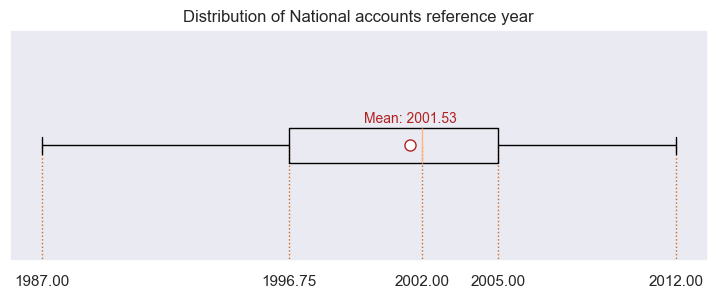


mode: 2005.0 (11 occurrence(s))

********************
column name: SNA price valuation
type: object
missing value rate: 18.26%
unique values: 2 out of 197 non-null values (98.98% of duplicates)
        - Value added at basic prices (VAB) (163 occurrences)
        - Value added at producer prices (VAP) (34 occurrences)
mode: Value added at basic prices (VAB) (163 occurrence(s))

********************
column name: Lending category
type: object
missing value rate: 40.25%
unique values: 3 out of 144 non-null values (97.92% of duplicates)
        - IBRD (67 occurrences)
        - IDA (59 occurrences)
        - Blend (18 occurrences)
mode: IBRD (67 occurrence(s))

********************
column name: Other groups
type: object
missing value rate: 75.93%
unique values: 2 out of 58 non-null values (96.55% of duplicates)
        - HIPC (40 occurrences)
        - Euro area (18 occurrences)
mode: HIPC (40 occurrence(s))

********************
column name: System of National Accounts
type: object
missi

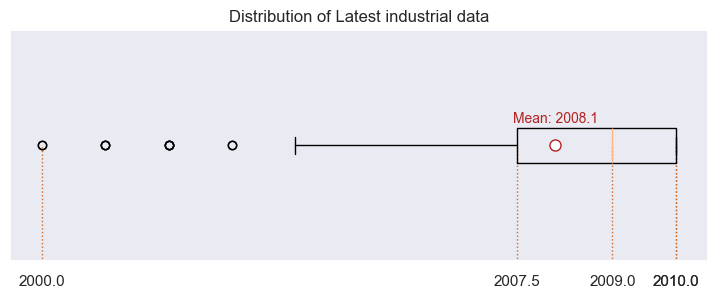


mode: 2010.0 (42 occurrence(s))

********************
column name: Latest trade data
type: float64
missing value rate: 23.24%
unique values: 13 out of 185 non-null values (92.97% of duplicates)
mean: 2010.99
min: 1995.0
max: 2012.0
median: 2012.0
std: 2.57

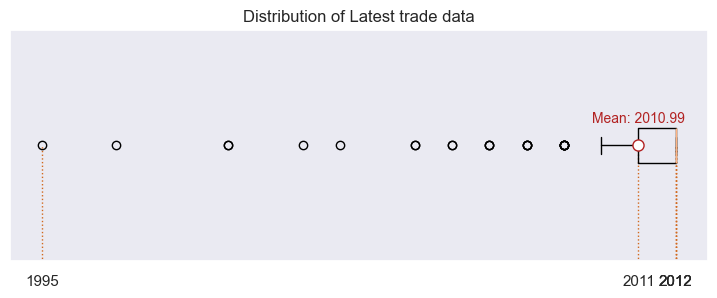


mode: 2012.0 (135 occurrence(s))
additional comment : First 1 unique values represent 73.0% of total values : 2012.0 (135)

********************
column name: Latest water withdrawal data
type: object
missing value rate: 25.73%
unique values: 20 out of 179 non-null values (88.83% of duplicates)
mode: 2000, 2005 (40 occurrence(s))

********************
column name: Unnamed: 31
type: float64
missing value rate: 100.0%
This column only contains null values.



In [101]:
print(get_df_variables_info(ed_stats_country))

1. Country Code : 3 letter-code identifying the country. 241 unique values. No duplicate.
2. Short Name : Name of the country (short version). 241 unique values. No duplicate.
3. Table Name : Name of the country used in the file "EdStatsData.csv". 241 unique values. No duplicate.
4. Long Name : Name of the country (long version). 241 unique values. No duplicate.
5. 2-alpha code : 2 letter / number code identifying the country. 238 unique values. Cannot really be used since CHI, NAM and XKX are missing that value.
6. Currency Unit : Full name of the currency. Lots of duplicates since a currency can be used in several countries. 26 null values. 152 unique values. Top 5 used currencies are Euro, CFA franc, U.S. dollar, East Caribbean dollar, Danish krone. 141 currencies are used in only 1 country.
7. Special Notes : Additional information about the end of the fiscal year, description of aggregates, income groups, data source, etc...
8. Region : 27 null values (mainly income groups and other aggregates, but also Gibraltar). 7 unique values other than NaN (Europe & Central Asia, Sub-Saharan Africa, Latin America & Caribbean, East Asia & Pacific, Middle East & North Africa, South Asia, North America)
9. Income Group : same 27 null values as Region. 5 unique values (Upper middle income, Lower middle income, High income: nonOECD, Low income, High income: OECD)
10. WB-2 code : Other unique country code from the world bank. 1 null value (Namibia). No duplicates. Very similar to 2-alpha code (only 7 cases where there are different)
11. National accounts base year : 'National accounts base year is the year used as the base period for constant price calculations in the country's national accounts. It is recommended that he base year of constant price estimates be changed periodically to reflect changes in economic structure and relative prices.'
12. National accounts reference year : Seems to be the same thing as "National accounts base year", even though both values are never equal for a given line.
13. SNA price valuation : SNA price valuation refers to the assessment of the economic value of goods and services in a country, using standardized measures for accurate national accounting. 44 null values. 2 unique values: "Value added at basice prices (VAB)" (163 occurrences) and "Value added at producer prices (VAP)" (34 occurrences)
14. Lending Category : 97 null values. 3 unique value : IBRD (International Bank for Reconstruction and Development), IDA (International Development Association), Blend (IDA-eligible but also creditworthy for some IBRD borrowing). Logically, most of the null values are from High income countries (65), and very few belong to income groups such as Upper middle income (3), Lower middle income (1), Low income (1)
15. Other groups : 183 null values. 2 unique values : HIPC (Heavily indebted poor countries), Euro area
16. System of National Accounts : Details the SNA methodoly being used. 26 null values. 3 unique values : 1993 (165), 1968 (42), 2008 (8).
17. Alternative conversion factor : specific currency conversion rates used when official exchange rates are unreliable, providing more accurate values for economic data in certain countries. I don't understand why these are dates. I will assume this is not relevant for the study.
18. PPP survey year : Purchasing power parities (PPPs) control for the differences in price levels between economies and equalize the purchasing power of currencies. 96 null values. 3 unique values : 2005 (98), Rolling (37), 2011 (10)
19. Balance of Payments Manual in use : 60 null values. 1 unique value : IMF Balance of Payments Manual, 6th edition (181).
20. External debt Reporting status : 117 null values. 3 unique values : Actual (107), Estimate (11), Preleminary (6)
21. System of trade : 41 null values. 2 unique values : General trade system (106), Special trade system (94)
22. Government Accounting concept : Government accounting involves systematically recording and interpreting financial transactions to ensure accountability, efficiency, and transparency in public sector finances. 80 null values. 2 unique values : Consolidated central government (95), Budgetary central government (66).
23. IMF data dissemination standard : 60 null values. 2 unique values : General Data Dissemination System (GDDS) (110), Special Data Dissemination Standard (SDDS) (71). GDDF promotes data transparency and statistical development among participating countries, ultimately leading to lower borrowing costs through improved data sharing and identification of capacity gaps. SDDS provides a framework for IMF member countries to voluntarily commit to specific data publication standards, signaling their status as "good statistical citizens" and facilitating access to international capital markets.
24. Latest population census : 28 null values. 27 unique values. First 4 unique values represent 66.0% of total values : 2011 (59), 2010 (49), 2012 (18), 2009 (14).
25. Latest household survey : 100 null values. 60 unique values.
26. Source of most recent Income and expenditure data : 81 null values. 75 unique values.
27. Vital registration complete : 130 null values. 2 unique values : Yes (110), Yes. Vital registration for Guernsey and Jersey. (1).
28. Latest agricultural census : 99 null values. 35 unique values. First 5 unique values represent 59.0% of total values : 2010 (36), 2007 (16), 2013 (13), 2012 (10), 2011 (9).
29. Latest industrial data : 134 null values. 11 unique values.
30. Latest trade data : 56 null values. 13 unique values. First 1 unique values represent 73.0% of total values : 2012.0 (135).
31. Latest water withdrawal data : 62 null values. 20 unique values.
32. Unnamed: 31 : Only contains null values.

##### Conclusion

The file EdStatsCountry.csv contains comprehensive data on 241 countries, including identification codes, names, economic indicators, most recent surveys and censuses and statistical information related to their financial and demographic profiles. This information aims to facilitate analysis of global economic conditions.

#### EdStatsData.csv

##### General description

In [17]:
# General info

ed_stats_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [69]:
# Check for null values

# ed_stats_data.isnull().sum()
# ed_stats_data.isnull().all()
sum(ed_stats_data.isnull().any())

66

The file EdStatsData.csv contains 70 columns and 886930 lines. Most of the columns are of type *float64*.  
Only "Country Name", "Country Code", "Indicator Name" and "Indicator Code" are of type *object* (string).

66 of the 70 columns contain null values. The column "Unnamed: 69" only contains null values.
Columns "Country Name", "Country Code", "Indicator Name" and "Indicator Code" are the only one with no missing values.


Number of rows: 886930
Number of columns: 70

********************
column name: Country Name
type: object
missing value rate: 0.0%
unique values: 242 out of 886930 non-null values (99.97% of duplicates)
mode: Afghanistan, Albania, Algeria, ... (242 elements) (3665 occurrence(s))


********************
column name: Country Code
type: object
missing value rate: 0.0%
unique values: 242 out of 886930 non-null values (99.97% of duplicates)
mode: ABW, AFG, AGO, ... (242 elements) (3665 occurrence(s))


********************
column name: Indicator Name
type: object
missing value rate: 0.0%
unique values: 3665 out of 886930 non-null values (99.59% of duplicates)
mode: Adjusted net enrolment rate, lower secondary, both sexes (%), Adjusted net enrolment rate, lower secondary, female (%), Adjusted net enrolment rate, lower secondary, gender parity index (GPI), ... (3665 elements) (242 occurrence(s))


********************
column name: Indicator Code
type: object
missing value rate: 0.0%
unique va

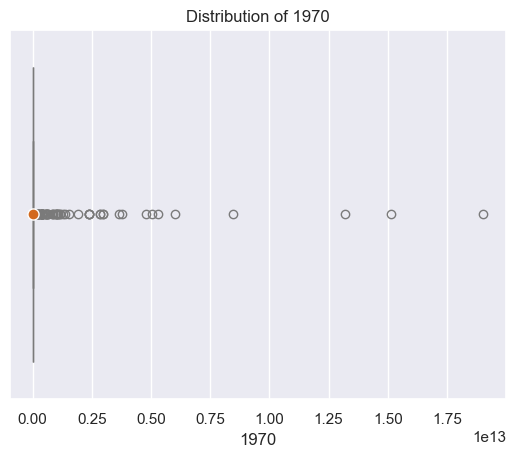


********************
column name: 1970
type: float64
missing value rate: 91.85%
unique values: 24595 out of 72288 non-null values (65.98% of duplicates)
mean: 1974772449.59
min: -1.4355636441179
max: 19039286948196.1
median: 6.317723601271825
std: 121168685351.94
mode: 0.0 (1572 occurrence(s))



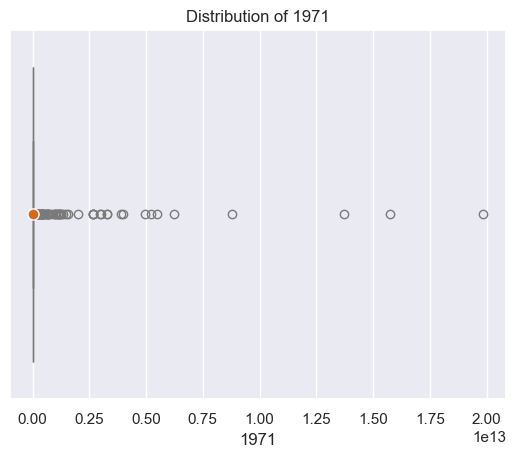


********************
column name: 1971
type: float64
missing value rate: 95.99%
unique values: 30892 out of 35537 non-null values (13.07% of duplicates)
mean: 4253638470.19
min: -1.59462487352471
max: 19864566419298.1
median: 63.1623992919922
std: 180481446225.22
mode: 3.0 (379 occurrence(s))



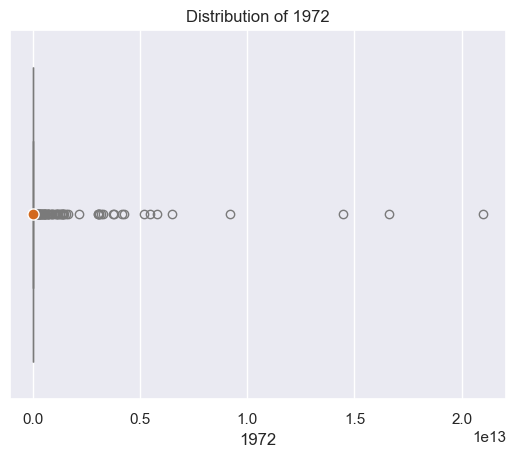


********************
column name: 1972
type: float64
missing value rate: 95.98%
unique values: 30982 out of 35619 non-null values (13.02% of duplicates)
mean: 4592364905.26
min: -3.05652223376186
max: 21009161433401.4
median: 66.5513916015625
std: 191408271479.84
mode: 3.0 (378 occurrence(s))



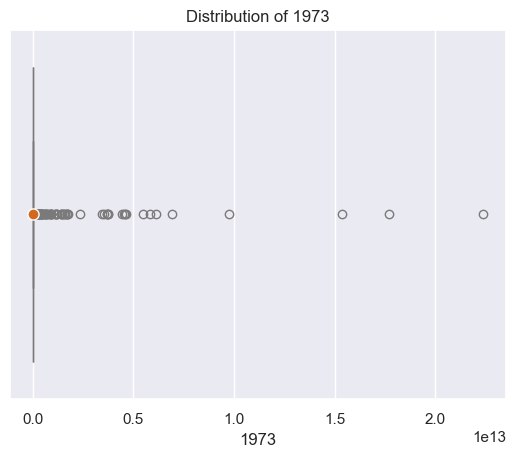


********************
column name: 1973
type: float64
missing value rate: 95.99%
unique values: 30988 out of 35545 non-null values (12.82% of duplicates)
mean: 5105005610.89
min: -4.03258231095521
max: 22383671023495.4
median: 69.6959533691406
std: 205917043980.67
mode: 3.0 (377 occurrence(s))



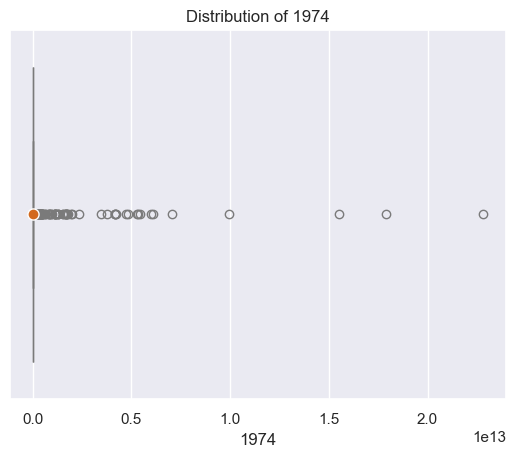


********************
column name: 1974
type: float64
missing value rate: 95.97%
unique values: 31139 out of 35730 non-null values (12.85% of duplicates)
mean: 5401492903.41
min: -4.21356295533909
max: 22829911729819.1
median: 70.87760162353516
std: 211214985371.1
mode: 3.0 (374 occurrence(s))



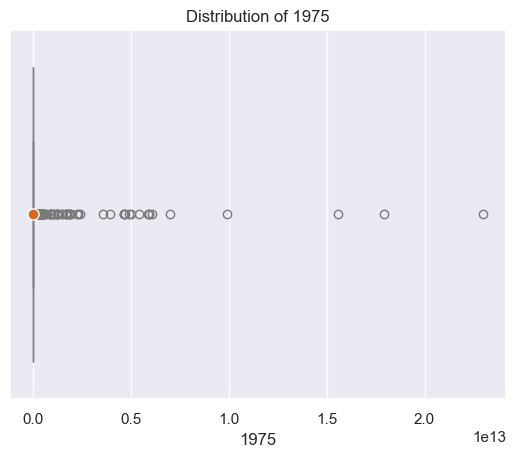


********************
column name: 1975
type: float64
missing value rate: 90.16%
unique values: 37838 out of 87306 non-null values (56.66% of duplicates)
mean: 2314287511.57
min: -3.65856897383129
max: 23006343161670.4
median: 9.67741966247559
std: 137505922744.68
mode: 0.0 (1572 occurrence(s))



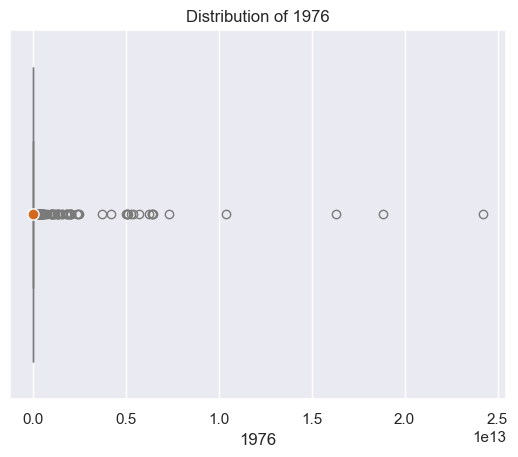


********************
column name: 1976
type: float64
missing value rate: 95.77%
unique values: 32679 out of 37483 non-null values (12.82% of duplicates)
mean: 5731808142.09
min: -2.95094477402788
max: 24241276811572.6
median: 71.0158996582031
std: 221554619977.12
mode: 3.0 (386 occurrence(s))



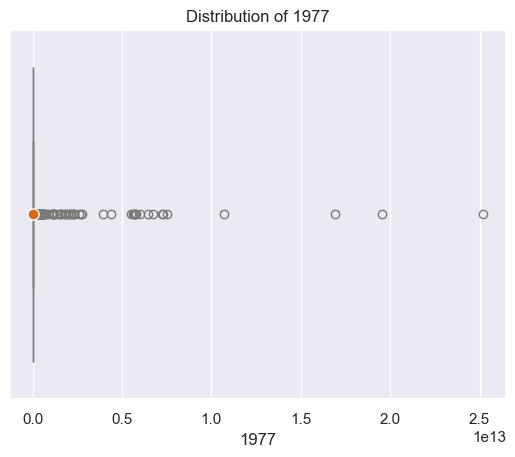


********************
column name: 1977
type: float64
missing value rate: 95.76%
unique values: 32808 out of 37574 non-null values (12.68% of duplicates)
mean: 6124437154.16
min: -3.17486983145803
max: 25213826643314.4
median: 71.3332633972168
std: 232548901067.37
mode: 3.0 (380 occurrence(s))



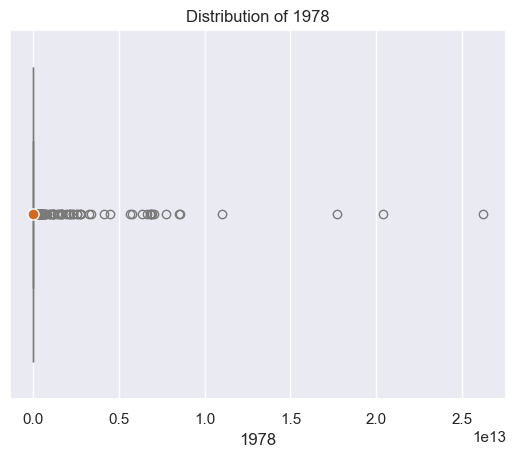


********************
column name: 1978
type: float64
missing value rate: 95.76%
unique values: 32887 out of 37576 non-null values (12.48% of duplicates)
mean: 6671488719.03
min: -3.55874933463883
max: 26221014860337.7
median: 72.9051239013672
std: 247398632281.27
mode: 3.0 (382 occurrence(s))



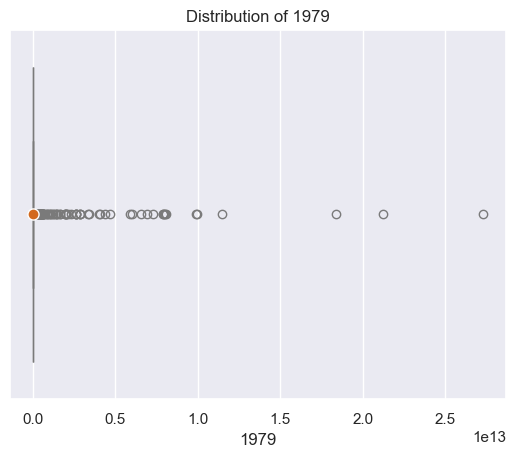


********************
column name: 1979
type: float64
missing value rate: 95.85%
unique values: 32359 out of 36809 non-null values (12.09% of duplicates)
mean: 7436723955.05
min: -2.97361230998001
max: 27308727186242.9
median: 75.1017303466797
std: 266095745105.96
mode: 3.0 (385 occurrence(s))



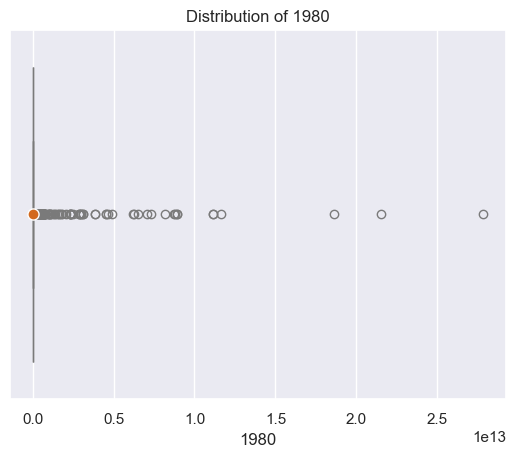


********************
column name: 1980
type: float64
missing value rate: 89.95%
unique values: 39456 out of 89122 non-null values (55.73% of duplicates)
mean: 3283897508.64
min: -1.40424045876436
max: 27843189307931.6
median: 11.07
std: 178077355006.15
mode: 0.0 (1144 occurrence(s))



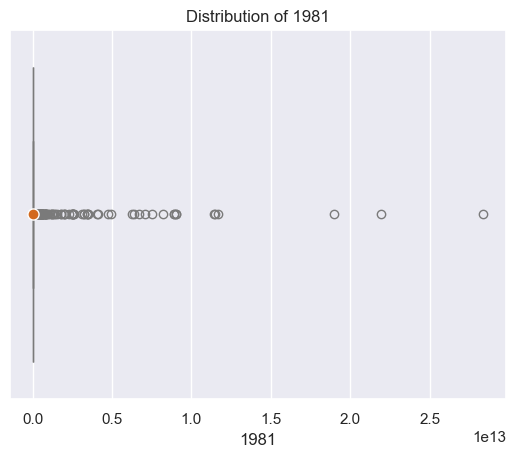


********************
column name: 1981
type: float64
missing value rate: 95.63%
unique values: 34090 out of 38777 non-null values (12.09% of duplicates)
mean: 7664969392.47
min: -1.47834496141634
max: 28379257951893.0
median: 74.6721267700195
std: 274414168518.62
mode: 3.0 (386 occurrence(s))



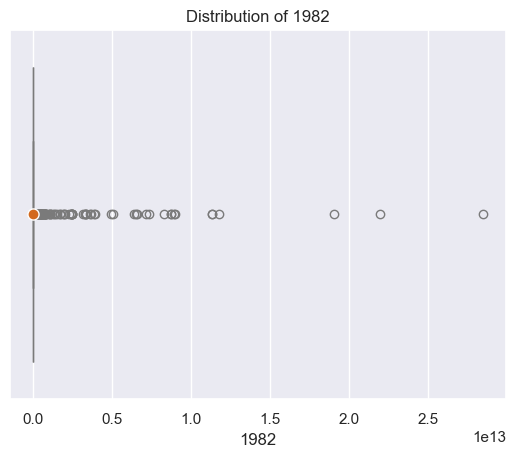


********************
column name: 1982
type: float64
missing value rate: 95.77%
unique values: 32969 out of 37511 non-null values (12.11% of duplicates)
mean: 7913721582.27
min: -2.35876483031488
max: 28480670615135.4
median: 77.1097183227539
std: 279054890539.17
mode: 3.0 (391 occurrence(s))



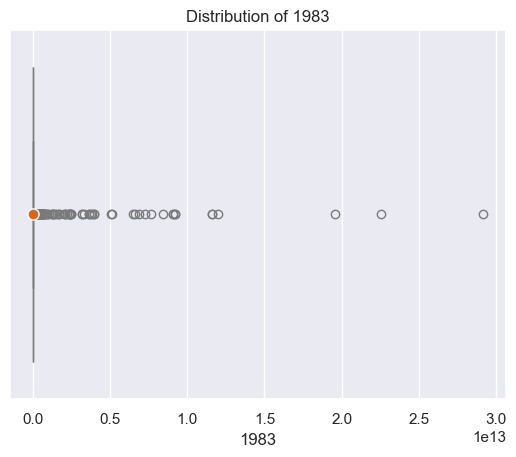


********************
column name: 1983
type: float64
missing value rate: 95.66%
unique values: 33683 out of 38460 non-null values (12.42% of duplicates)
mean: 7856908292.0
min: -2.86727333719202
max: 29164360664954.1
median: 75.9252815246582
std: 282380912099.18
mode: 3.0 (391 occurrence(s))



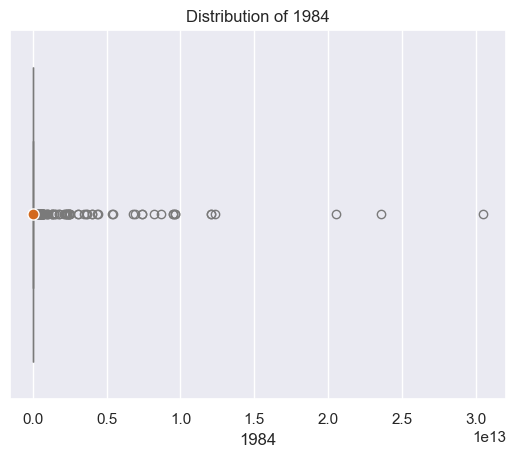


********************
column name: 1984
type: float64
missing value rate: 95.65%
unique values: 33903 out of 38606 non-null values (12.18% of duplicates)
mean: 8118001691.3
min: -2.80054825234308
max: 30485211655932.4
median: 75.33138275146484
std: 294063483007.32
mode: 3.0 (392 occurrence(s))



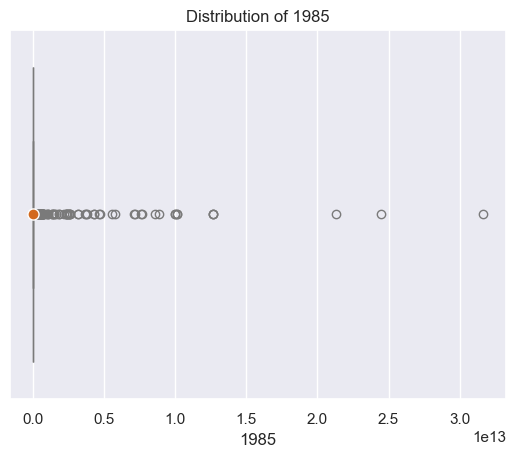


********************
column name: 1985
type: float64
missing value rate: 89.82%
unique values: 41133 out of 90296 non-null values (54.45% of duplicates)
mean: 3622763069.55
min: -2.21631540604909
max: 31664646793713.8
median: 12.0
std: 200292918506.93
mode: 0.0 (787 occurrence(s))



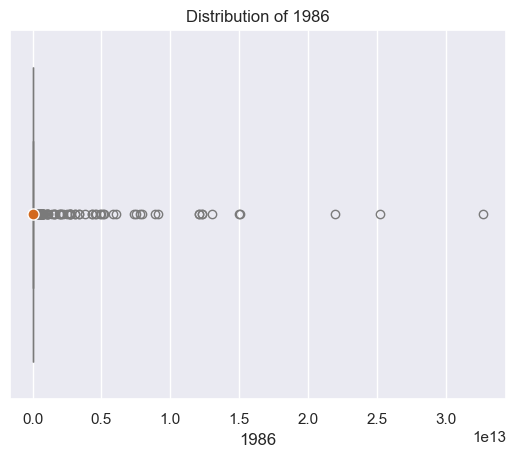


********************
column name: 1986
type: float64
missing value rate: 95.56%
unique values: 34774 out of 39372 non-null values (11.68% of duplicates)
mean: 9156550107.95
min: -1.55672226585984
max: 32712843955205.1
median: 74.0942764282227
std: 326467474653.7
mode: 3.0 (395 occurrence(s))



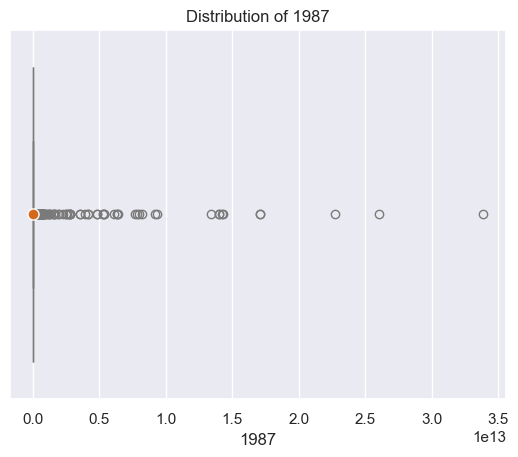


********************
column name: 1987
type: float64
missing value rate: 95.64%
unique values: 34021 out of 38641 non-null values (11.96% of duplicates)
mean: 10149008176.44
min: -1.41088587394711
max: 33882440955342.1
median: 73.5701370239258
std: 353535110136.19
mode: 3.0 (400 occurrence(s))



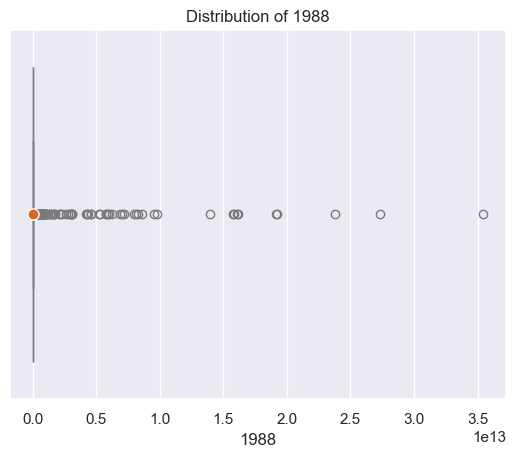


********************
column name: 1988
type: float64
missing value rate: 95.65%
unique values: 34013 out of 38552 non-null values (11.77% of duplicates)
mean: 11047093700.58
min: -1.42520227072015
max: 35457378555162.8
median: 73.5427474975586
std: 380425690032.74
mode: 3.0 (401 occurrence(s))



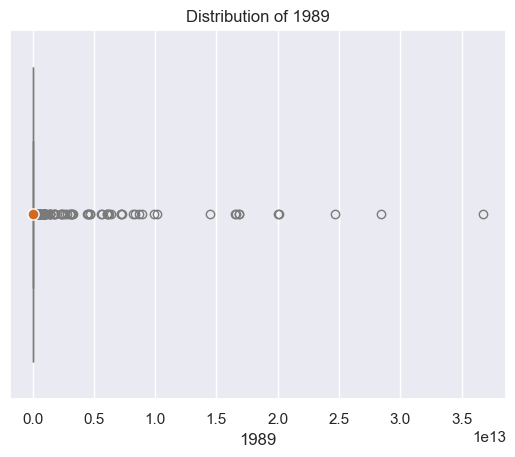


********************
column name: 1989
type: float64
missing value rate: 95.77%
unique values: 33181 out of 37540 non-null values (11.61% of duplicates)
mean: 11954359464.5
min: -1.56242450454169
max: 36787413390635.6
median: 79.35322189331055
std: 401487301932.88
mode: 3.0 (408 occurrence(s))



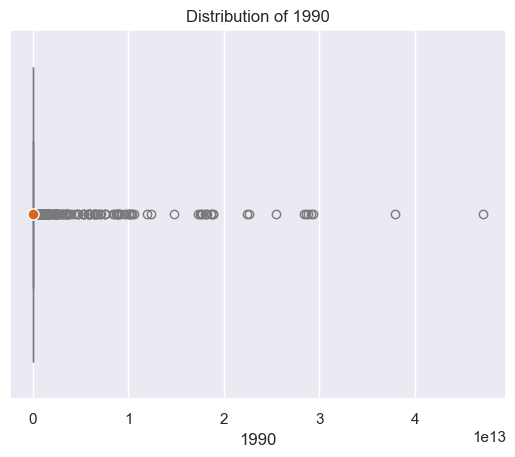


********************
column name: 1990
type: float64
missing value rate: 85.97%
unique values: 72800 out of 124405 non-null values (41.48% of duplicates)
mean: 9084423550.66
min: -1.80375047906806
max: 47143438466903.2
median: 50.4837913513184
std: 366566685061.9
mode: 0.0 (944 occurrence(s))



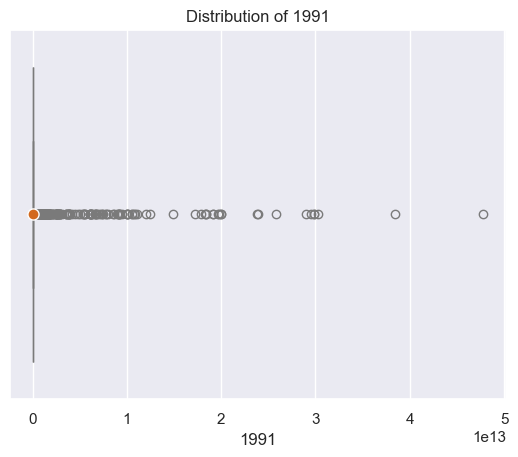


********************
column name: 1991
type: float64
missing value rate: 91.61%
unique values: 67172 out of 74437 non-null values (9.76% of duplicates)
mean: 15716740023.54
min: -5.81433929887776
max: 47812717689115.0
median: 39160.0
std: 488135688946.06
mode: 3.0 (417 occurrence(s))



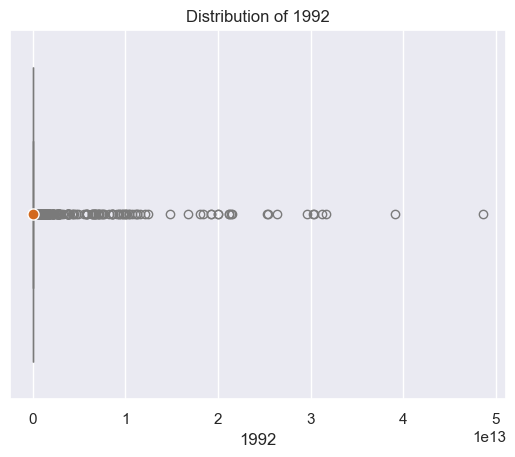


********************
column name: 1992
type: float64
missing value rate: 91.48%
unique values: 68026 out of 75543 non-null values (9.95% of duplicates)
mean: 16046684980.91
min: -5.08933323509646
max: 48664457634800.1
median: 34773.0
std: 501205532249.85
mode: 3.0 (417 occurrence(s))



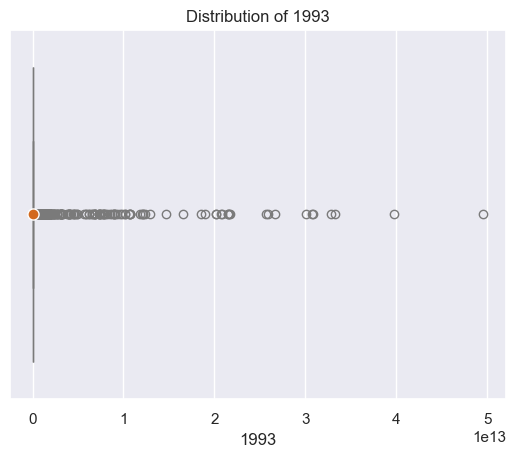


********************
column name: 1993
type: float64
missing value rate: 91.45%
unique values: 68440 out of 75793 non-null values (9.7% of duplicates)
mean: 16435324911.56
min: -6.18485680497581
max: 49596000966258.9
median: 34971.0
std: 512196248891.19
mode: 3.0 (416 occurrence(s))



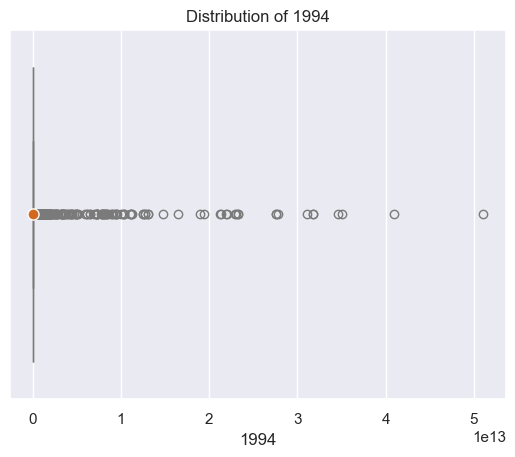


********************
column name: 1994
type: float64
missing value rate: 91.27%
unique values: 69974 out of 77462 non-null values (9.67% of duplicates)
mean: 16840220344.07
min: -4.79269132920358
max: 51065807538866.0
median: 31825.0
std: 529298242836.15
mode: 3.0 (418 occurrence(s))



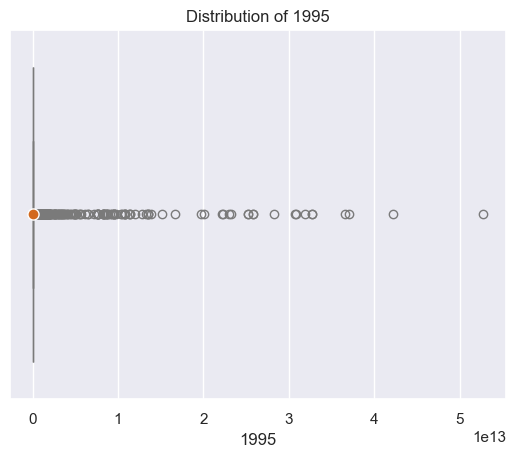


********************
column name: 1995
type: float64
missing value rate: 85.19%
unique values: 79225 out of 131361 non-null values (39.69% of duplicates)
mean: 10525426793.16
min: -2.69772207995649
max: 52754475204801.0
median: 50.1866271626934
std: 428521845883.65
mode: 0.0 (545 occurrence(s))



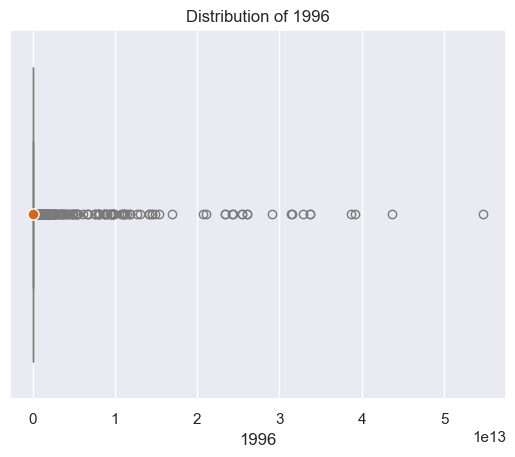


********************
column name: 1996
type: float64
missing value rate: 91.34%
unique values: 69787 out of 76807 non-null values (9.14% of duplicates)
mean: 18746300978.39
min: -3.82017422256626
max: 54780314314471.5
median: 32624.0
std: 581258593846.43
mode: 3.0 (411 occurrence(s))



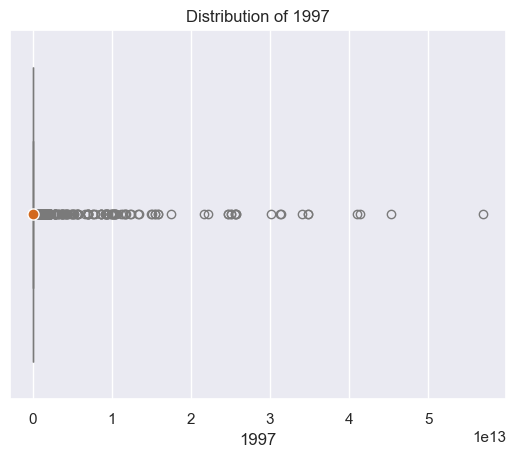


********************
column name: 1997
type: float64
missing value rate: 91.72%
unique values: 66665 out of 73453 non-null values (9.24% of duplicates)
mean: 20273850044.99
min: -2.51724485829146
max: 56955214645836.2
median: 43196.0
std: 614235660874.9
mode: 3.0 (414 occurrence(s))



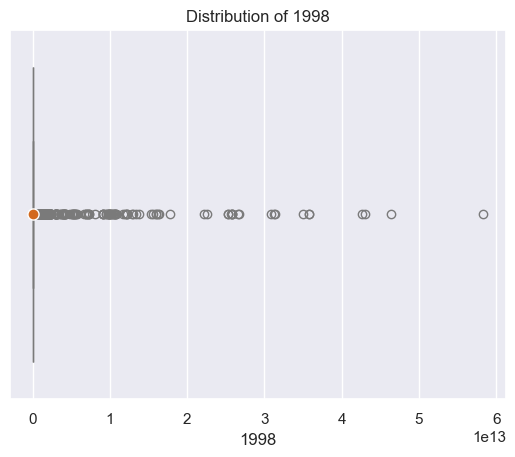


********************
column name: 1998
type: float64
missing value rate: 90.43%
unique values: 77746 out of 84914 non-null values (8.44% of duplicates)
mean: 17946782923.98
min: -60862.0
max: 58351373560296.6
median: 15214.0
std: 585914770745.92
mode: 100.0 (527 occurrence(s))



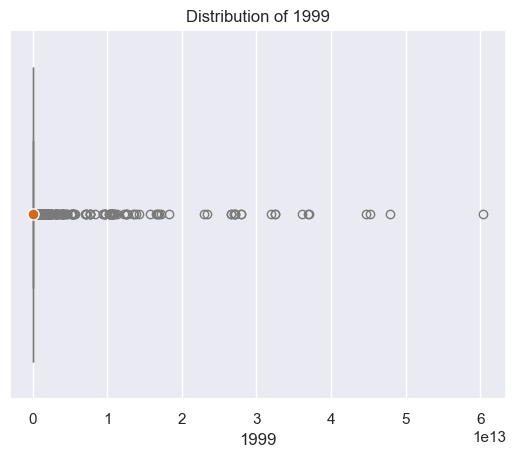


********************
column name: 1999
type: float64
missing value rate: 86.6%
unique values: 104452 out of 118839 non-null values (12.11% of duplicates)
mean: 13315578553.54
min: -65260.0
max: 60406324400195.4
median: 1251.0
std: 515347248864.69
mode: 100.0 (922 occurrence(s))



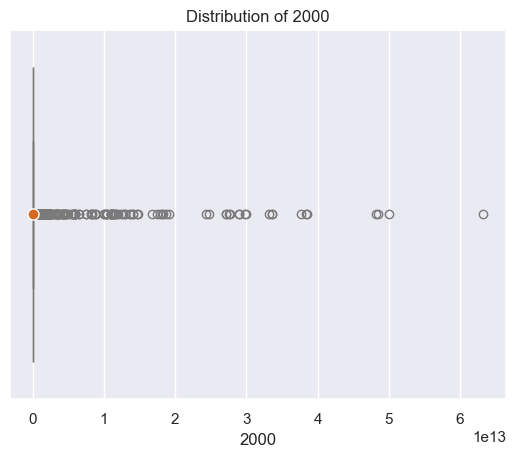


********************
column name: 2000
type: float64
missing value rate: 80.08%
unique values: 115971 out of 176676 non-null values (34.36% of duplicates)
mean: 9423383683.79
min: -67593.0
max: 63272930868729.8
median: 50.7871671569787
std: 444237415249.5
mode: 100.0 (989 occurrence(s))



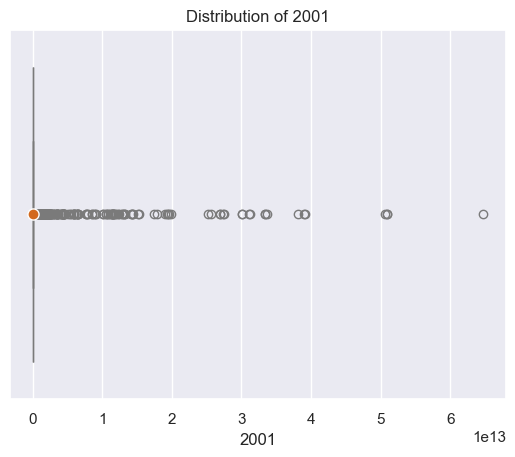


********************
column name: 2001
type: float64
missing value rate: 86.07%
unique values: 108633 out of 123509 non-null values (12.04% of duplicates)
mean: 13848674153.87
min: -69737.0
max: 64778339442512.2
median: 830.0
std: 544924199157.56
mode: 100.0 (982 occurrence(s))



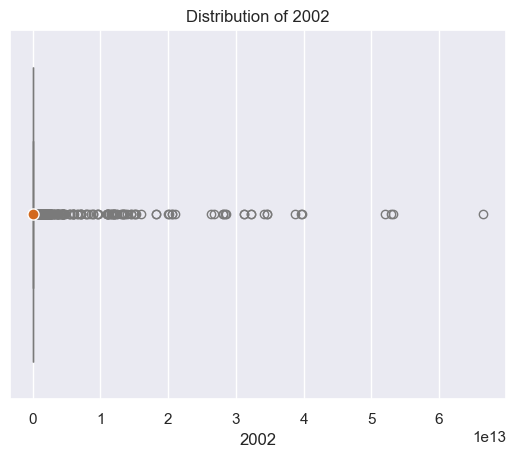


********************
column name: 2002
type: float64
missing value rate: 86.0%
unique values: 108974 out of 124205 non-null values (12.26% of duplicates)
mean: 14282985240.17
min: -92143.0
max: 66547530649452.9
median: 946.0
std: 562288604614.65
mode: 100.0 (934 occurrence(s))



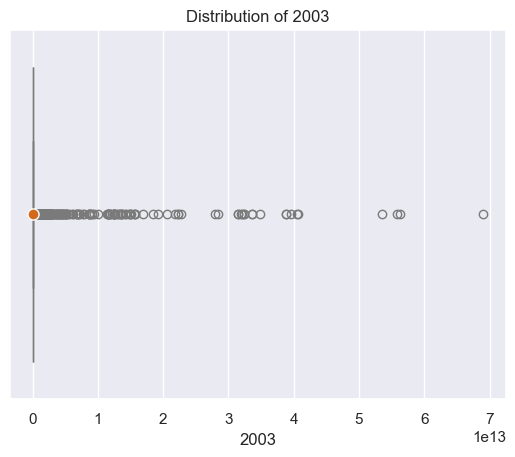


********************
column name: 2003
type: float64
missing value rate: 85.3%
unique values: 114344 out of 130363 non-null values (12.29% of duplicates)
mean: 14493931503.97
min: -111186.0
max: 69063279399840.2
median: 395.61496267
std: 580360721926.83
mode: 100.0 (878 occurrence(s))



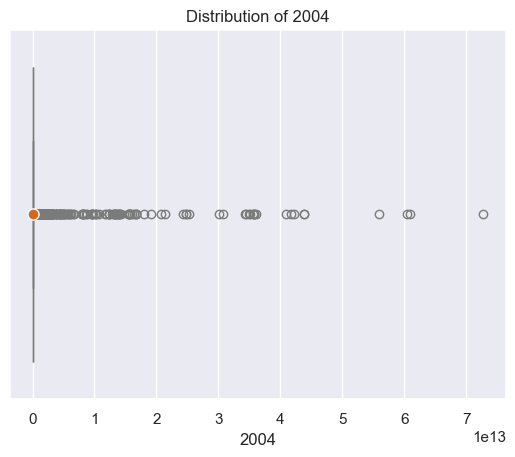


********************
column name: 2004
type: float64
missing value rate: 85.48%
unique values: 113431 out of 128814 non-null values (11.94% of duplicates)
mean: 15897290510.68
min: -126260.0
max: 72788290554396.4
median: 335.0
std: 627833708489.24
mode: 100.0 (941 occurrence(s))



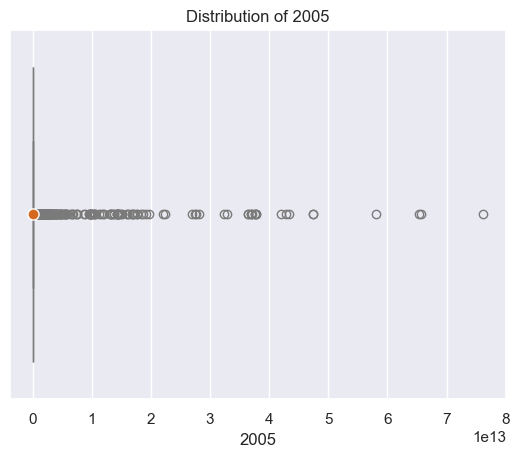


********************
column name: 2005
type: float64
missing value rate: 79.24%
unique values: 123821 out of 184108 non-null values (32.75% of duplicates)
mean: 11886369143.02
min: -134724.0
max: 76240446997338.9
median: 50.3151206970215
std: 557618094903.67
mode: 100.0 (950 occurrence(s))



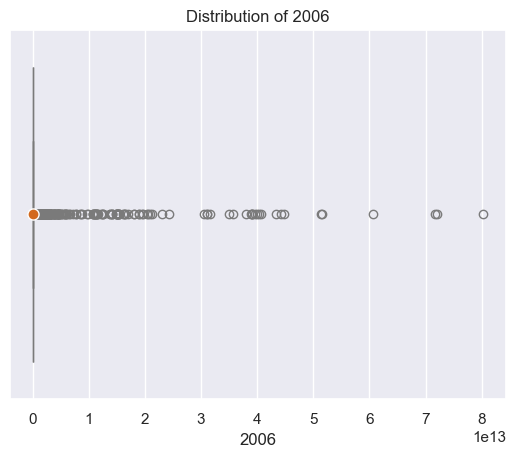


********************
column name: 2006
type: float64
missing value rate: 84.18%
unique values: 124989 out of 140312 non-null values (10.92% of duplicates)
mean: 16846738101.81
min: -370894.0
max: 80318399991191.3
median: 99.81849340601795
std: 685148411393.78
mode: 100.0 (904 occurrence(s))



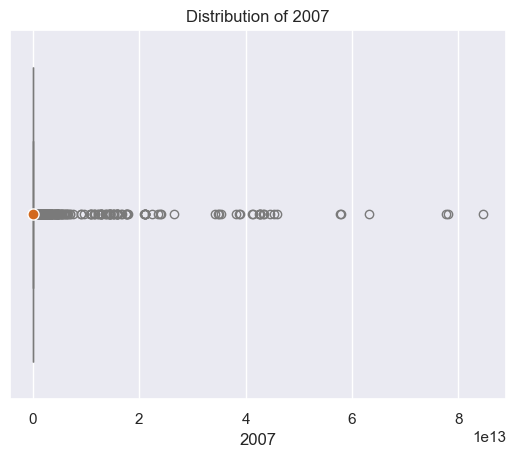


********************
column name: 2007
type: float64
missing value rate: 84.52%
unique values: 121541 out of 137272 non-null values (11.46% of duplicates)
mean: 18723002078.75
min: -388217.0
max: 84691447699464.0
median: 100.0
std: 746568758042.23
mode: 100.0 (1013 occurrence(s))



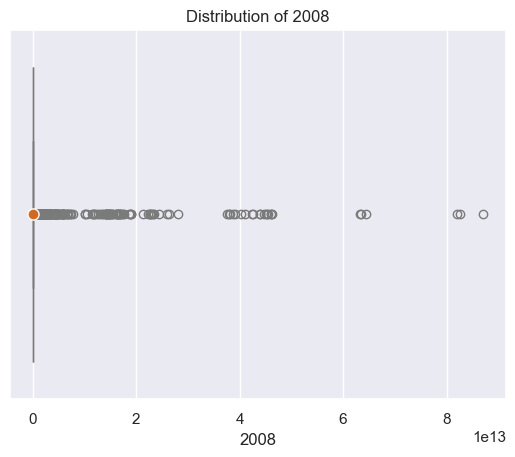


********************
column name: 2008
type: float64
missing value rate: 84.85%
unique values: 119598 out of 134387 non-null values (11.0% of duplicates)
mean: 20297938641.71
min: -408854.0
max: 87110219802678.9
median: 100.0
std: 794413214846.79
mode: 100.0 (943 occurrence(s))



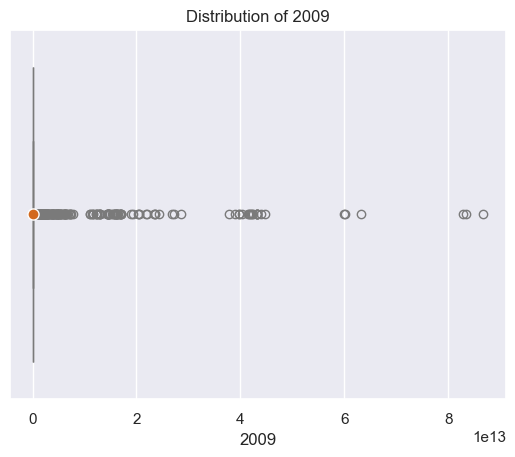


********************
column name: 2009
type: float64
missing value rate: 83.98%
unique values: 126177 out of 142108 non-null values (11.21% of duplicates)
mean: 18949069732.95
min: -456124.0
max: 86775163961907.7
median: 99.2503852844238
std: 762364956966.46
mode: 100.0 (1000 occurrence(s))



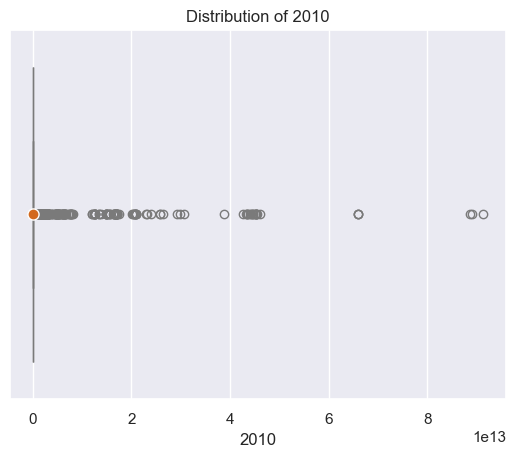


********************
column name: 2010
type: float64
missing value rate: 72.67%
unique values: 135853 out of 242442 non-null values (43.96% of duplicates)
mean: 11895924324.6
min: -496905.0
max: 91346761245407.2
median: 20.46019886016845
std: 621870964576.57
mode: 0.0 (5068 occurrence(s))



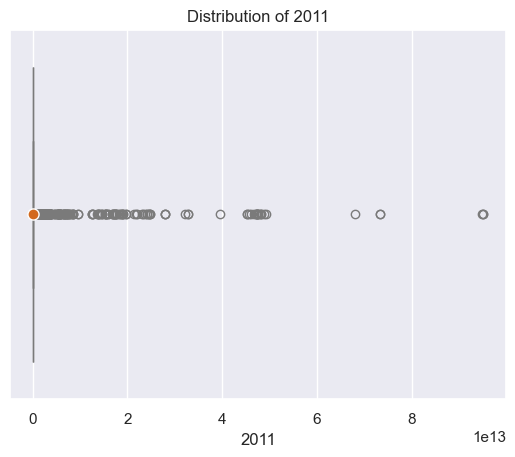


********************
column name: 2011
type: float64
missing value rate: 83.54%
unique values: 128444 out of 146012 non-null values (12.03% of duplicates)
mean: 21179108773.99
min: -570994.0
max: 95063136211954.1
median: 98.53509521484375
std: 855585335679.97
mode: 100.0 (1048 occurrence(s))



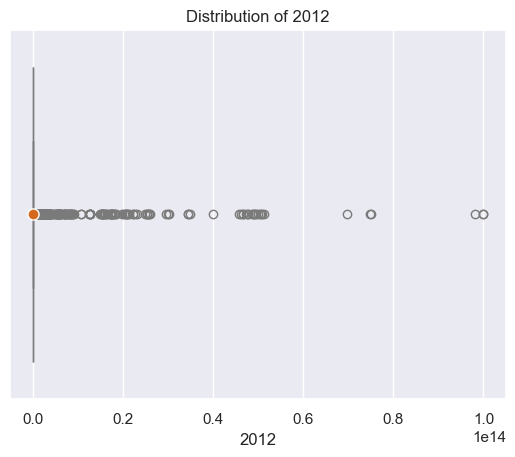


********************
column name: 2012
type: float64
missing value rate: 83.4%
unique values: 130040 out of 147264 non-null values (11.7% of duplicates)
mean: 21763227127.57
min: -604993.0
max: 99994730175215.4
median: 97.59012222290039
std: 883395495201.33
mode: 100.0 (1107 occurrence(s))



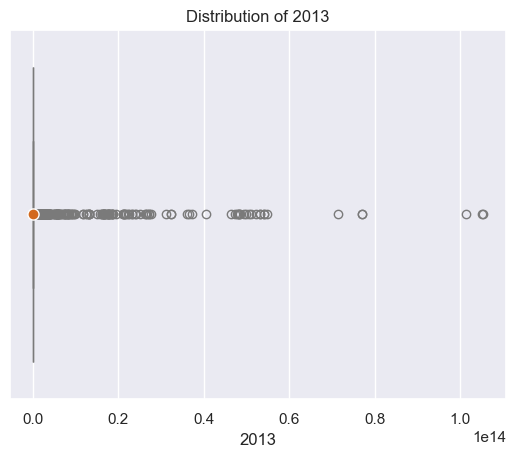


********************
column name: 2013
type: float64
missing value rate: 84.5%
unique values: 120987 out of 137509 non-null values (12.02% of duplicates)
mean: 24253320032.23
min: -615748.0
max: 105457955976107.0
median: 100.0
std: 951301602368.14
mode: 100.0 (1043 occurrence(s))



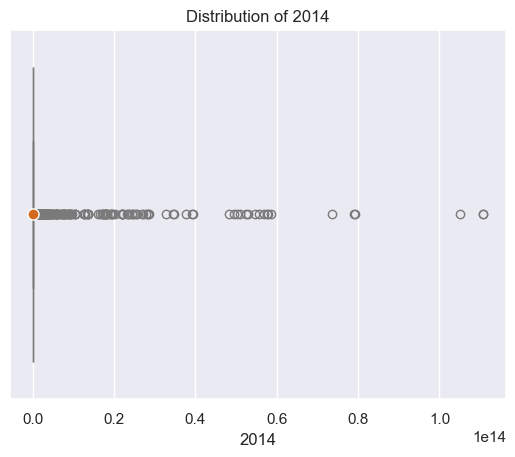


********************
column name: 2014
type: float64
missing value rate: 87.17%
unique values: 100187 out of 113789 non-null values (11.95% of duplicates)
mean: 26784486485.46
min: -89.0
max: 110805995944461.0
median: 100.0
std: 1023180279184.95
mode: 100.0 (1054 occurrence(s))



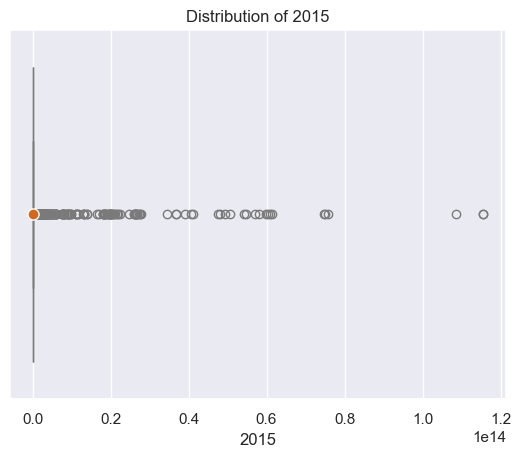


********************
column name: 2015
type: float64
missing value rate: 85.22%
unique values: 79334 out of 131058 non-null values (39.47% of duplicates)
mean: 23537199876.48
min: -2.46784652277199
max: 115619758353829.0
median: 52.35
std: 973246472636.04
mode: 0.0 (4463 occurrence(s))



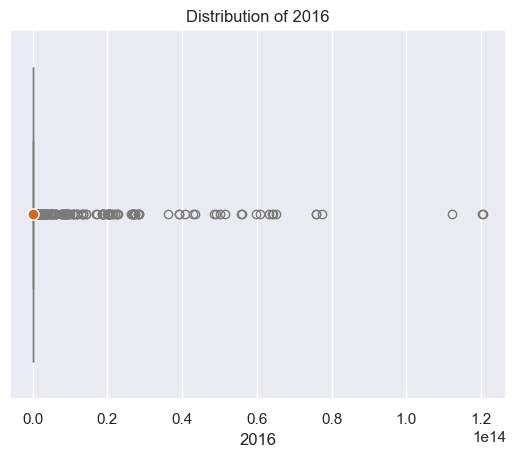


********************
column name: 2016
type: float64
missing value rate: 98.14%
unique values: 12749 out of 16460 non-null values (22.55% of duplicates)
mean: 193441064053.01
min: -1.79753864116921
max: 120603020118353.0
median: 6264.0
std: 2839188497131.51
mode: 3.0 (547 occurrence(s))



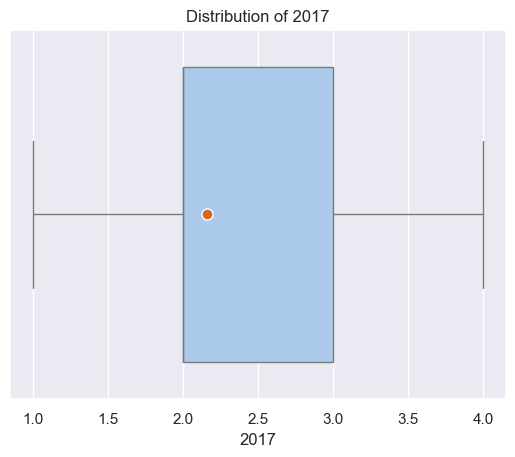


********************
column name: 2017
type: float64
missing value rate: 99.98%
unique values: 4 out of 143 non-null values (97.2% of duplicates)
        - 2.0 (64 occurrences)
        - 3.0 (42 occurrences)
        - 1.0 (31 occurrences)
        - 4.0 (6 occurrences)
mean: 2.16
min: 1.0
max: 4.0
median: 2.0
std: 0.81
mode: 2.0 (64 occurrence(s))



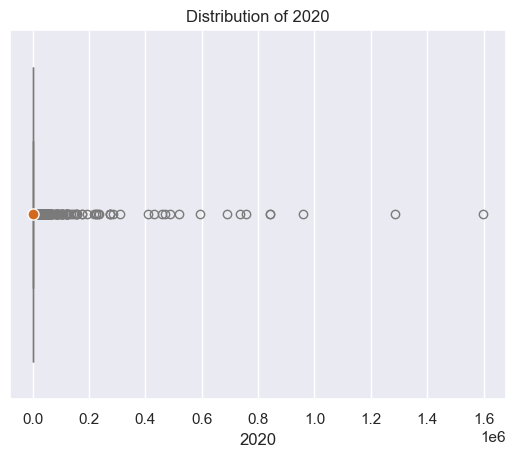


********************
column name: 2020
type: float64
missing value rate: 94.2%
unique values: 8595 out of 51436 non-null values (83.29% of duplicates)
mean: 578.07
min: -1.87
max: 1599479.25
median: 0.23
std: 14750.72
mode: 0.0 (4429 occurrence(s))



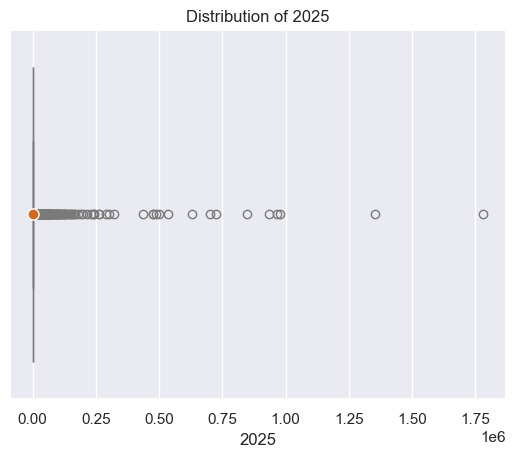


********************
column name: 2025
type: float64
missing value rate: 94.2%
unique values: 8566 out of 51436 non-null values (83.35% of duplicates)
mean: 605.48
min: -2.0
max: 1781898.44
median: 0.23
std: 15773.05
mode: 0.0 (4758 occurrence(s))



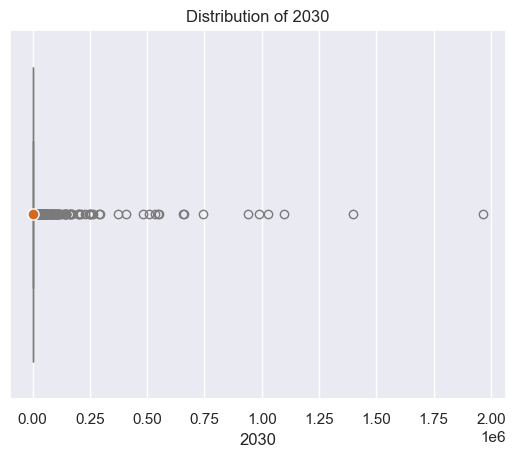


********************
column name: 2030
type: float64
missing value rate: 94.2%
unique values: 8513 out of 51436 non-null values (83.45% of duplicates)
mean: 631.59
min: -2.11
max: 1967258.22
median: 0.23
std: 16785.56
mode: 0.0 (5120 occurrence(s))



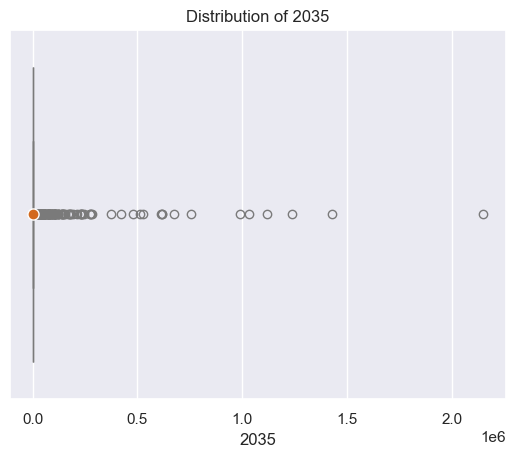


********************
column name: 2035
type: float64
missing value rate: 94.2%
unique values: 8447 out of 51436 non-null values (83.58% of duplicates)
mean: 655.65
min: -2.15
max: 2151416.19
median: 0.23
std: 17786.66
mode: 0.0 (5555 occurrence(s))



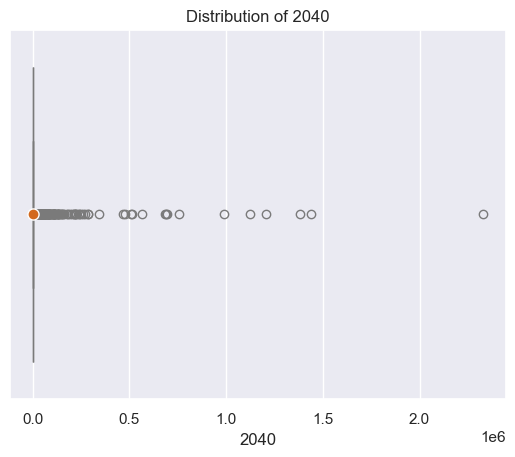


********************
column name: 2040
type: float64
missing value rate: 94.2%
unique values: 8403 out of 51436 non-null values (83.66% of duplicates)
mean: 675.15
min: -2.14
max: 2330335.99
median: 0.23
std: 18744.08
mode: 0.0 (6011 occurrence(s))



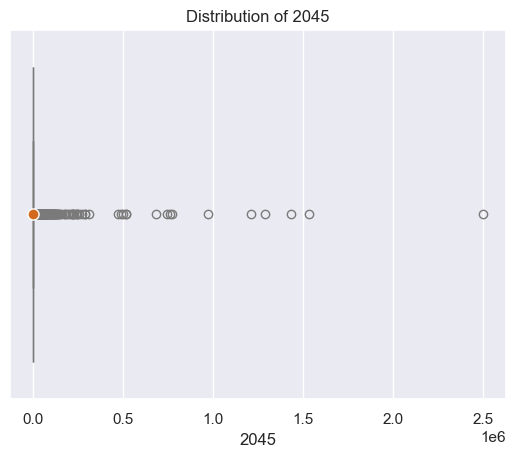


********************
column name: 2045
type: float64
missing value rate: 94.2%
unique values: 8254 out of 51436 non-null values (83.95% of duplicates)
mean: 691.13
min: -2.09
max: 2500439.4
median: 0.23
std: 19654.09
mode: 0.0 (6506 occurrence(s))



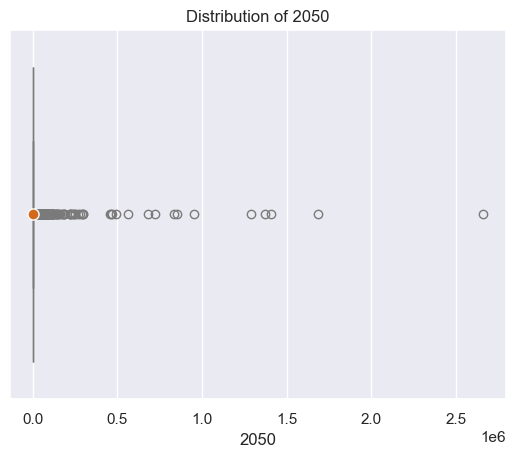


********************
column name: 2050
type: float64
missing value rate: 94.2%
unique values: 8132 out of 51436 non-null values (84.19% of duplicates)
mean: 704.06
min: -1.98
max: 2662071.37
median: 0.23
std: 20529.41
mode: 0.0 (7035 occurrence(s))



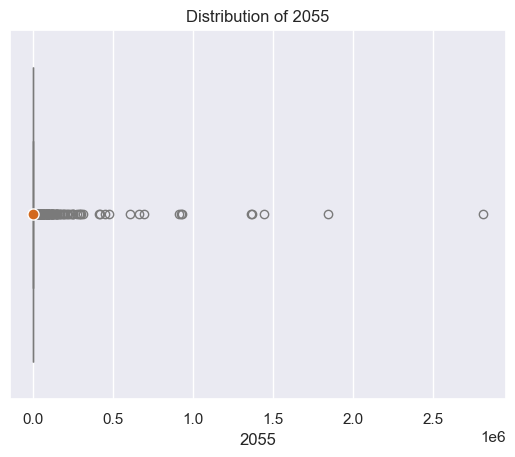


********************
column name: 2055
type: float64
missing value rate: 94.2%
unique values: 8027 out of 51436 non-null values (84.39% of duplicates)
mean: 714.58
min: -1.83
max: 2813669.77
median: 0.23
std: 21368.51
mode: 0.0 (7593 occurrence(s))



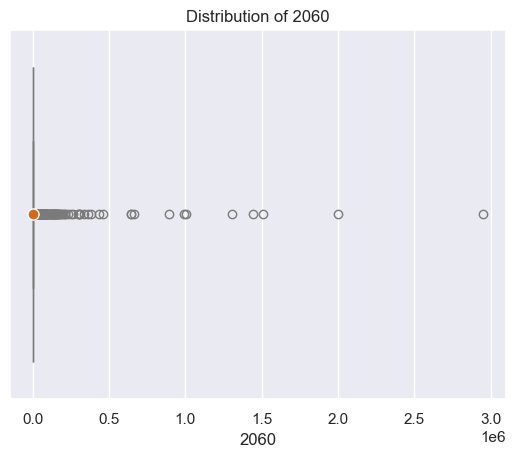


********************
column name: 2060
type: float64
missing value rate: 94.2%
unique values: 7914 out of 51436 non-null values (84.61% of duplicates)
mean: 722.49
min: -1.63
max: 2951568.84
median: 0.23
std: 22158.45
mode: 0.0 (8125 occurrence(s))



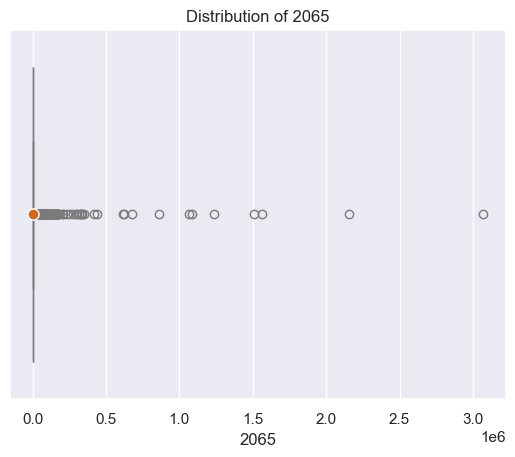


********************
column name: 2065
type: float64
missing value rate: 94.2%
unique values: 7800 out of 51436 non-null values (84.84% of duplicates)
mean: 727.13
min: -1.44
max: 3070878.84
median: 0.23
std: 22879.9
mode: 0.0 (8684 occurrence(s))



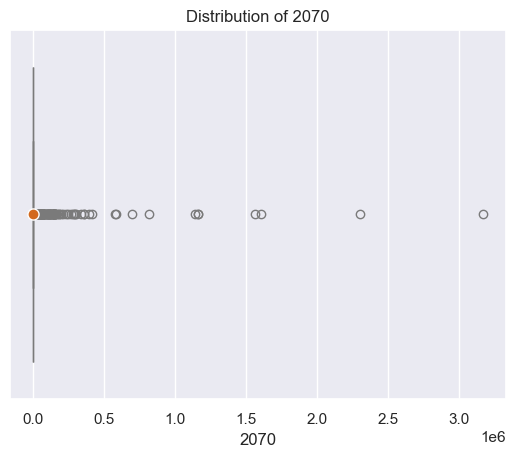


********************
column name: 2070
type: float64
missing value rate: 94.2%
unique values: 7700 out of 51436 non-null values (85.03% of duplicates)
mean: 728.38
min: -1.26
max: 3169710.61
median: 0.23
std: 23523.38
mode: 0.0 (9268 occurrence(s))



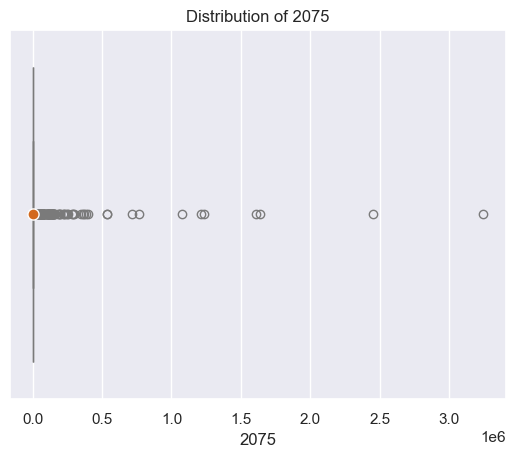


********************
column name: 2075
type: float64
missing value rate: 94.2%
unique values: 7562 out of 51436 non-null values (85.3% of duplicates)
mean: 726.65
min: -1.09
max: 3246239.22
median: 0.23
std: 24081.49
mode: 0.0 (9840 occurrence(s))



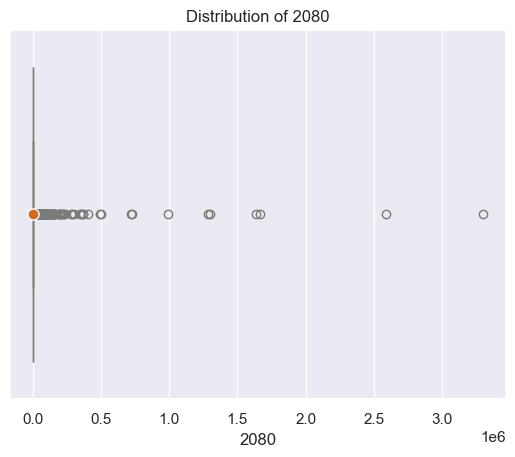


********************
column name: 2080
type: float64
missing value rate: 94.2%
unique values: 7466 out of 51436 non-null values (85.48% of duplicates)
mean: 722.83
min: -0.92
max: 3301586.19
median: 0.23
std: 24558.97
mode: 0.0 (10404 occurrence(s))



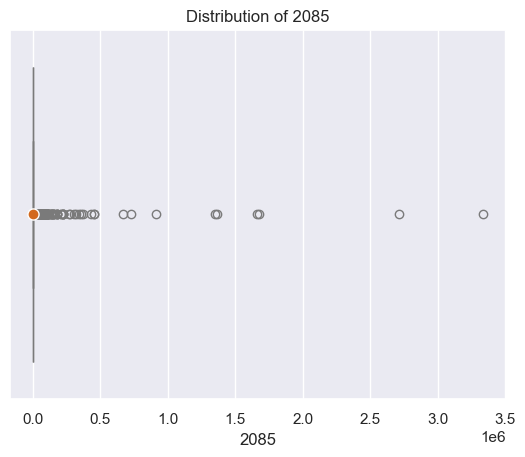


********************
column name: 2085
type: float64
missing value rate: 94.2%
unique values: 7335 out of 51436 non-null values (85.74% of duplicates)
mean: 717.69
min: -0.78
max: 3337871.21
median: 0.23
std: 24965.87
mode: 0.0 (10996 occurrence(s))



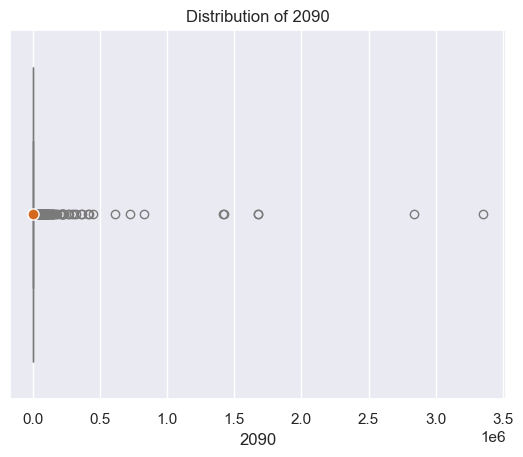


********************
column name: 2090
type: float64
missing value rate: 94.2%
unique values: 7150 out of 51436 non-null values (86.1% of duplicates)
mean: 711.31
min: -0.65
max: 3354746.27
median: 0.23
std: 25301.83
mode: 0.0 (11583 occurrence(s))



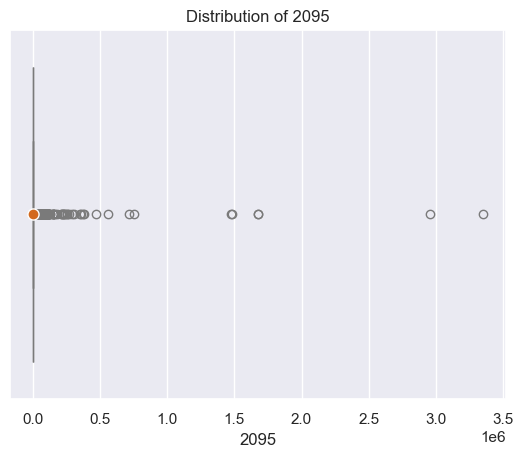


********************
column name: 2095
type: float64
missing value rate: 94.2%
unique values: 7044 out of 51436 non-null values (86.31% of duplicates)
mean: 703.43
min: -0.55
max: 3351886.89
median: 0.23
std: 25560.69
mode: 0.0 (12097 occurrence(s))



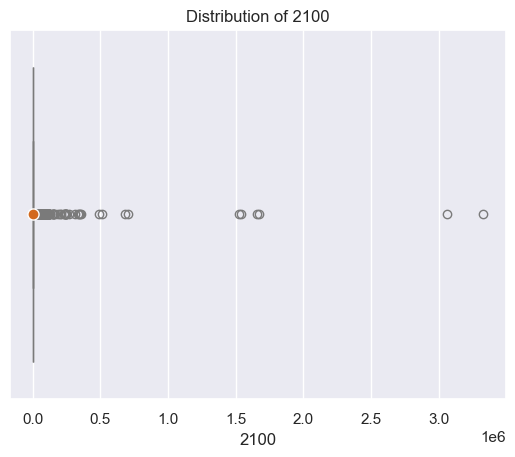


********************
column name: 2100
type: float64
missing value rate: 94.2%
unique values: 6914 out of 51436 non-null values (86.56% of duplicates)
mean: 694.03
min: -0.45
max: 3330483.54
median: 0.22
std: 25741.89
mode: 0.0 (12632 occurrence(s))


********************
column name: Unnamed: 69
type: float64
missing value rate: 100.0%
This column only contains null values.




In [138]:
# Get info about each variable.

print(get_df_variables_info(ed_stats_data))

##### Columns description

In [19]:
# Show that every country code / indicator code combination is unique

ed_stats_data_country_indicator = ed_stats_data[["Country Code", "Indicator Code"]]
sum(ed_stats_data_country_indicator.duplicated())

0

In [20]:
ed_stats_data_group_by = ed_stats_data.groupby(["Country Code", "Country Name", "Indicator Code", "Indicator Name"]).sum()
ed_stats_data_group_by

1970  \
Country Code Country Name Indicator Code              Indicator Name                                             
ABW          Aruba        BAR.NOED.1519.FE.ZS         Barro-Lee: Percentage of female population age ...   0.0   
                          BAR.NOED.1519.ZS            Barro-Lee: Percentage of population age 15-19 w...   0.0   
                          BAR.NOED.15UP.FE.ZS         Barro-Lee: Percentage of female population age ...   0.0   
                          BAR.NOED.15UP.ZS            Barro-Lee: Percentage of population age 15+ wit...   0.0   
                          BAR.NOED.2024.FE.ZS         Barro-Lee: Percentage of female population age ...   0.0   
...                                                                                                        ...   
ZWE          Zimbabwe     UIS.XUNIT.USCONST.3.FSGOV   Government expenditure per upper secondary stud...   0.0   
                          UIS.XUNIT.USCONST.4.FSGOV   Government expenditure per post-secondary non-t...   0.0   
                          UIS.XUNIT.USCONST.56.FSGOV  Government expenditure per tertiary student (co...   0.0   
                          XGDP.23.FSGOV.FDINSTADM.FFD Government expenditure in secondary institution...   0.0   
                          XGDP.56.FSGOV.FDINSTADM.FFD Government expenditure in tertiary institutions...   0.0   

                                                                                                          1971  \
Country Code Country Name Indicator Code              Indicator Name                                             
ABW          Aruba        BAR.NOED.1519.FE.ZS         Barro-Lee: Percentage of female population age ...   0.0   
                          BAR.NOED.1519.ZS            Barro-Lee: Percentage of population age 15-19 w...   0.0   
                          BAR.NOED.15UP.FE.ZS         Barro-Lee: Percentage of female population age ...   0.0   
                          BAR.NOED.15UP.ZS            Barro-Lee: Percentage of population age 15+ wit...   0.0   
                          BAR.NOED.2024.FE.ZS         Barro-Lee: Percentage of female population age ...   0.0   
...                                                                                                        ...   
ZWE          Zimbabwe     UIS.XUNIT.USCONST.3.FSGOV   Government expenditure per upper secondary stud...   0.0   
                          UIS.XUNIT.USCONST.4.FSGOV   Government expenditure per post-secondary non-t...   0.0   
                          UIS.XUNIT.USCONST.56.FSGOV  Government expenditure per tertiary student (co...   0.0   
                          XGDP.23.FSGOV.FDINSTADM.FFD Government expenditure in secondary institution...   0.0   
                          XGDP.56.FSGOV.FDINSTADM.FFD Government expenditure in tertiary institutions...   0.0   

                                                                                                          1972  \
Country Code Country Name Indicator Code              Indicator Name                                             
ABW          Aruba        BAR.NOED.1519.FE.ZS         Barro-Lee: Percentage of female population age ...   0.0   
                          BAR.NOED.1519.ZS            Barro-Lee: Percentage of population age 15-19 w...   0.0   
                          BAR.NOED.15UP.FE.ZS         Barro-Lee: Percentage of female population age ...   0.0   
                          BAR.NOED.15UP.ZS            Barro-Lee: Percentage of population age 15+ wit...   0.0   
                          BAR.NOED.2024.FE.ZS         Barro-Lee: Percentage of female population age ...   0.0   
...                                                                                                        ...   
ZWE          Zimbabwe     UIS.XUNIT.USCONST.3.FSGOV   Government expenditure per upper secondary stud...   0.0   
                          UIS.XUNIT.USCONST.4.FSGOV   Government expenditure per post-secondary non-t...   0.0   


1. Country Name : 0 null values. 242 unique values. There are 886688 duplicates values, excluding null duplicates.
2. Country Code : 0 null values. 242 unique values. There are 886688 duplicates values, excluding null duplicates.
3. Indicator Name : 0 null values. 3665 unique values. There are 883265 duplicates values, excluding null duplicates.
4. Indicator Code : 0 null values. 3665 unique values. There are 883265 duplicates values, excluding null duplicates.
5. 1970 : 814642 null values. 24595 unique values. There are 47693 duplicates values, excluding null duplicates.
6. 1971 : 851393 null values. 30892 unique values. There are 4645 duplicates values, excluding null duplicates.
7. 1972 : 851311 null values. 30982 unique values. There are 4637 duplicates values, excluding null duplicates.
8. 1973 : 851385 null values. 30988 unique values. There are 4557 duplicates values, excluding null duplicates.
9. 1974 : 851200 null values. 31139 unique values. There are 4591 duplicates values, excluding null duplicates.
10. 1975 : 799624 null values. 37838 unique values. There are 49468 duplicates values, excluding null duplicates.
11. 1976 : 849447 null values. 32679 unique values. There are 4804 duplicates values, excluding null duplicates.
12. 1977 : 849356 null values. 32808 unique values. There are 4766 duplicates values, excluding null duplicates.
13. 1978 : 849354 null values. 32887 unique values. There are 4689 duplicates values, excluding null duplicates.
14. 1979 : 850121 null values. 32359 unique values. There are 4450 duplicates values, excluding null duplicates.
15. 1980 : 797808 null values. 39456 unique values. There are 49666 duplicates values, excluding null duplicates.
16. 1981 : 848153 null values. 34090 unique values. There are 4687 duplicates values, excluding null duplicates.
17. 1982 : 849419 null values. 32969 unique values. There are 4542 duplicates values, excluding null duplicates.
18. 1983 : 848470 null values. 33683 unique values. There are 4777 duplicates values, excluding null duplicates.
19. 1984 : 848324 null values. 33903 unique values. There are 4703 duplicates values, excluding null duplicates.
20. 1985 : 796634 null values. 41133 unique values. There are 49163 duplicates values, excluding null duplicates.
21. 1986 : 847558 null values. 34774 unique values. There are 4598 duplicates values, excluding null duplicates.
22. 1987 : 848289 null values. 34021 unique values. There are 4620 duplicates values, excluding null duplicates.
23. 1988 : 848378 null values. 34013 unique values. There are 4539 duplicates values, excluding null duplicates.
24. 1989 : 849390 null values. 33181 unique values. There are 4359 duplicates values, excluding null duplicates.
25. 1990 : 762525 null values. 72800 unique values. There are 51605 duplicates values, excluding null duplicates.
26. 1991 : 812493 null values. 67172 unique values. There are 7265 duplicates values, excluding null duplicates.
27. 1992 : 811387 null values. 68026 unique values. There are 7517 duplicates values, excluding null duplicates.
28. 1993 : 811137 null values. 68440 unique values. There are 7353 duplicates values, excluding null duplicates.
29. 1994 : 809468 null values. 69974 unique values. There are 7488 duplicates values, excluding null duplicates.
30. 1995 : 755569 null values. 79225 unique values. There are 52136 duplicates values, excluding null duplicates.
31. 1996 : 810123 null values. 69787 unique values. There are 7020 duplicates values, excluding null duplicates.
32. 1997 : 813477 null values. 66665 unique values. There are 6788 duplicates values, excluding null duplicates.
33. 1998 : 802016 null values. 77746 unique values. There are 7168 duplicates values, excluding null duplicates.
34. 1999 : 768091 null values. 104452 unique values. There are 14387 duplicates values, excluding null duplicates.
35. 2000 : 710254 null values. 115971 unique values. There are 60705 duplicates values, excluding null duplicates.
36. 2001 : 763421 null values. 108633 unique values. There are 14876 duplicates values, excluding null duplicates.
37. 2002 : 762725 null values. 108974 unique values. There are 15231 duplicates values, excluding null duplicates.
38. 2003 : 756567 null values. 114344 unique values. There are 16019 duplicates values, excluding null duplicates.
39. 2004 : 758116 null values. 113431 unique values. There are 15383 duplicates values, excluding null duplicates.
40. 2005 : 702822 null values. 123821 unique values. There are 60287 duplicates values, excluding null duplicates.
41. 2006 : 746618 null values. 124989 unique values. There are 15323 duplicates values, excluding null duplicates.
42. 2007 : 749658 null values. 121541 unique values. There are 15731 duplicates values, excluding null duplicates.
43. 2008 : 752543 null values. 119598 unique values. There are 14789 duplicates values, excluding null duplicates.
44. 2009 : 744822 null values. 126177 unique values. There are 15931 duplicates values, excluding null duplicates.
45. 2010 : 644488 null values. 135853 unique values. There are 106589 duplicates values, excluding null duplicates.
46. 2011 : 740918 null values. 128444 unique values. There are 17568 duplicates values, excluding null duplicates.
47. 2012 : 739666 null values. 130040 unique values. There are 17224 duplicates values, excluding null duplicates.
48. 2013 : 749421 null values. 120987 unique values. There are 16522 duplicates values, excluding null duplicates.
49. 2014 : 773141 null values. 100187 unique values. There are 13602 duplicates values, excluding null duplicates.
50. 2015 : 755872 null values. 79334 unique values. There are 51724 duplicates values, excluding null duplicates.
51. 2016 : 870470 null values. 12749 unique values. There are 3711 duplicates values, excluding null duplicates.
52. 2017 : 886787 null values. 4 unique values : 2.0 (64), 3.0 (42), 1.0 (31), 4.0 (6). There are 139 duplicates values, excluding null duplicates.
53. 2020 : 835494 null values. 8595 unique values. There are 42841 duplicates values, excluding null duplicates.
54. 2025 : 835494 null values. 8566 unique values. There are 42870 duplicates values, excluding null duplicates.
55. 2030 : 835494 null values. 8513 unique values. There are 42923 duplicates values, excluding null duplicates.
56. 2035 : 835494 null values. 8447 unique values. There are 42989 duplicates values, excluding null duplicates.
57. 2040 : 835494 null values. 8403 unique values. There are 43033 duplicates values, excluding null duplicates.
58. 2045 : 835494 null values. 8254 unique values. There are 43182 duplicates values, excluding null duplicates.
59. 2050 : 835494 null values. 8132 unique values. There are 43304 duplicates values, excluding null duplicates.
60. 2055 : 835494 null values. 8027 unique values. There are 43409 duplicates values, excluding null duplicates.
61. 2060 : 835494 null values. 7914 unique values. There are 43522 duplicates values, excluding null duplicates.
62. 2065 : 835494 null values. 7800 unique values. There are 43636 duplicates values, excluding null duplicates.
63. 2070 : 835494 null values. 7700 unique values. There are 43736 duplicates values, excluding null duplicates.
64. 2075 : 835494 null values. 7562 unique values. There are 43874 duplicates values, excluding null duplicates.
65. 2080 : 835494 null values. 7466 unique values. There are 43970 duplicates values, excluding null duplicates.
66. 2085 : 835494 null values. 7335 unique values. There are 44101 duplicates values, excluding null duplicates.
67. 2090 : 835494 null values. 7150 unique values. There are 44286 duplicates values, excluding null duplicates.
68. 2095 : 835494 null values. 7044 unique values. There are 44392 duplicates values, excluding null duplicates.
69. 2100 : 835494 null values. 6914 unique values. There are 44522 duplicates values, excluding null duplicates.
70. Unnamed: 69 : 886930 null values. 0 unique values. There are 0 duplicates values, excluding null duplicates.

In [22]:
# Calculate the percentage of filled data for each country

# Drop the 'Unnamed: 69' column as it contains no data
ed_stats_data_dropped = ed_stats_data.drop(columns=['Unnamed: 69'])

# Calculate the percentage of filled data for each country
def calculate_filled_percentage(row):
    total_columns = len(row) - 4  # Exclude the first 4 columns (Country Name, Country Code, Indicator Name, Indicator Code)
    filled_columns = row[4:].count()  # Count non-null values from the 5th column onwards
    return round((filled_columns / total_columns) * 100, 2)

ed_stats_data_dropped['Filled Percentage'] = ed_stats_data_dropped.apply(calculate_filled_percentage, axis=1)

# Group by Country Name and calculate the average filled percentage
country_filled_percentage = ed_stats_data_dropped.groupby('Country Name')['Filled Percentage'].mean().round(2).reset_index()

# Sort by filled percentage in descending order
country_filled_percentage = country_filled_percentage.sort_values(by='Filled Percentage', ascending=False)

display(country_filled_percentage)

,Country Name,Filled Percentage
138,Malta,14.45
52,Cyprus,14.36
104,Italy,14.26
30,Bulgaria,13.93
95,Hungary,13.87
...,...,...
83,Greenland,0.20
102,Isle of Man,0.10
71,Faroe Islands,0.09
164,Northern Mariana Islands,0.07


In [104]:
# Calculate the percentage of filled data for each year

# Drop the 'Unnamed: 69' column as it contains no data
ed_stats_data_dropped = ed_stats_data.drop(columns=['Unnamed: 69'])
total_entries = ed_stats_data_dropped.shape[0]

# Initialize an empty DataFrame to store the results
filled_percentage_per_year = {"Year":[], "Filled percentage":[]}

# Calculate the percentage of filled data for each year
for year in range(1970,2101):
    filled_percentage_per_year["Year"].append(int(year))
    if str(year) in ed_stats_data_dropped.columns:
        filled_entries = ed_stats_data_dropped[str(year)].count()
        filled_percentage_per_year["Filled percentage"].append(round((filled_entries / total_entries) * 100, 2))
    else:
        filled_percentage_per_year["Filled percentage"].append(0)

df_filled_percentage_per_year = pd.DataFrame(filled_percentage_per_year, index = filled_percentage_per_year["Year"], columns = ["Filled percentage"])

In [58]:
df_filled_percentage_per_year

,Filled percentage
1970,8.15
1971,4.01
1972,4.02
1973,4.01
1974,4.03
...,...
2096,0.00
2097,0.00
2098,0.00
2099,0.00


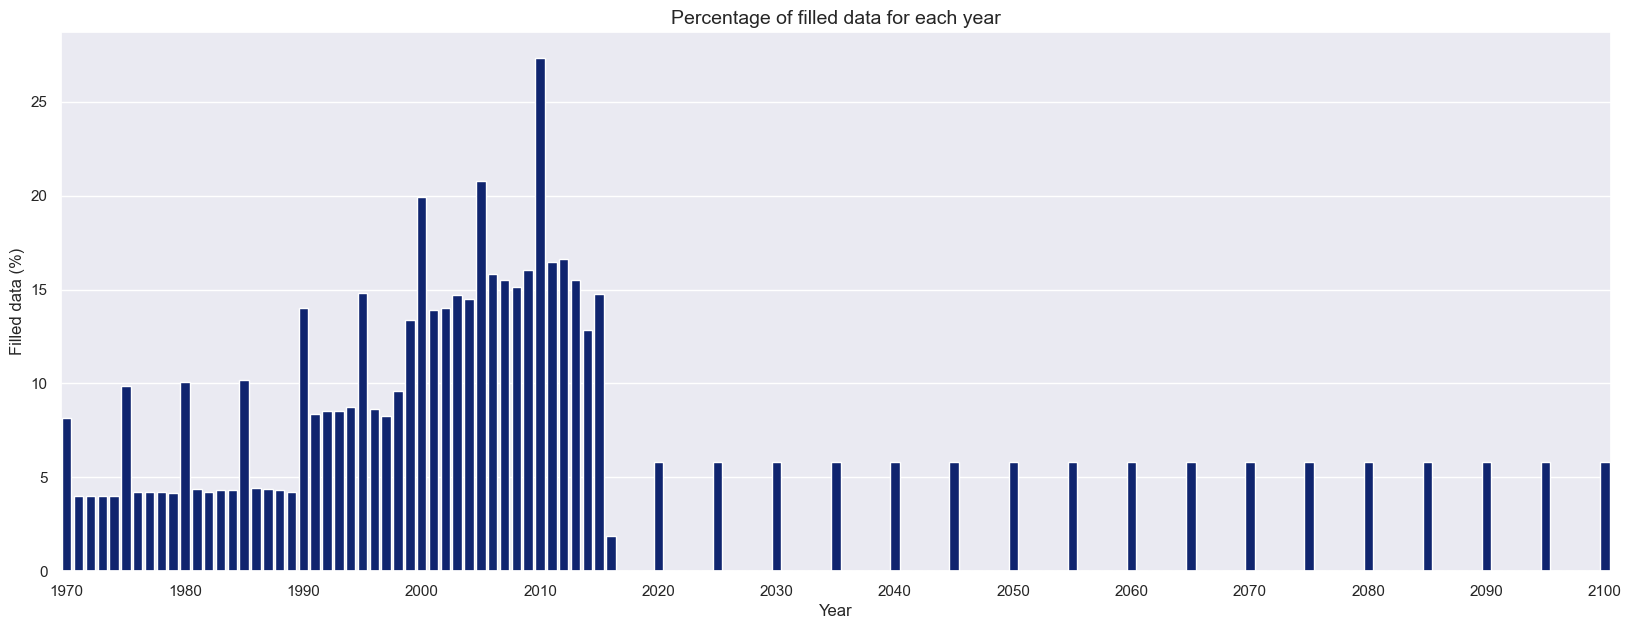

In [110]:
# Visualize the years for which there is most data

plt.figure(figsize=(20,7))
sns.barplot(df_filled_percentage_per_year, x=df_filled_percentage_per_year.index, y="Filled percentage")
plt.xticks(np.arange(min(df_filled_percentage_per_year.index), max(df_filled_percentage_per_year.index)+1, 10).astype('str'))
plt.ylabel("Filled data (%)")
plt.xlabel("Year")
plt.title("Percentage of filled data for each year", fontsize=14)
sns.set_theme(palette="dark")
plt.show()

After 2017, the percentage of filled data seems rather consistent.
Let's analyze quickly what are the indicators after 2017.

In [119]:
# Select columns for years after 2017
years = ed_stats_data.columns[ed_stats_data.columns.str.isnumeric()]
years_after_2017 = years[years.astype(int) > 2017]

# Display indicators with at least one non-null value after 2017
indicators_after_2017 = ed_stats_data[ed_stats_data[years_after_2017].notnull().any(axis=1)].value_counts(['Indicator Code', 'Indicator Name']).reset_index()
indicators_after_2017

,Indicator Code,Indicator Name,count
0,PRJ.POP.ALL.S1.MF,Wittgenstein Projection: Population in thousan...,167
1,PRJ.ATT.1519.1.FE,Wittgenstein Projection: Percentage of the pop...,167
2,PRJ.ATT.1519.1.MA,Wittgenstein Projection: Percentage of the pop...,167
3,PRJ.ATT.1519.1.MF,Wittgenstein Projection: Percentage of the pop...,167
4,PRJ.POP.ALL.1.MA,Wittgenstein Projection: Population in thousan...,167
...,...,...,...
303,PRJ.ATT.1519.3.MF,Wittgenstein Projection: Percentage of the pop...,167
304,PRJ.ATT.1519.3.MA,Wittgenstein Projection: Percentage of the pop...,167
305,PRJ.ATT.1519.3.FE,Wittgenstein Projection: Percentage of the pop...,167
306,PRJ.ATT.1519.2.MF,Wittgenstein Projection: Percentage of the pop...,167


In [121]:
indicators_after_2017["Indicator Name"].str.contains('Wittgenstein Projection').all()

np.True_

All the indicators after 2017 contain "Wittgenstein Projection". These are all projections.

In [25]:
# Calculate the percentage of filled data for each country for each year

# Drop the 'Unnamed: 69' column as it contains no data
ed_stats_data_dropped = ed_stats_data.drop(columns=['Unnamed: 69'])

# Initialize an empty DataFrame to store the results
results = []

# Iterate over each country
for country in ed_stats_data_dropped['Country Name'].unique():
    country_df = ed_stats_data_dropped[ed_stats_data_dropped['Country Name'] == country]
    filled_percentage = {}
    filled_percentage['Country Name'] = country
    
    # Calculate the percentage of filled data for each year
    for year in ed_stats_data_dropped.columns[4:]:
        total_entries = len(country_df)
        filled_entries = country_df[str(year)].count()
        filled_percentage[year] = round((filled_entries / total_entries) * 100, 2)
    
    results.append(filled_percentage)

result_df = pd.DataFrame(results)

In [26]:
result_df

,Country Name,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Arab World,4.77,4.97,5.16,5.05,5.24,5.32,5.32,5.32,5.38,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,East Asia & Pacific,2.51,2.51,2.51,3.22,3.27,3.44,3.57,3.52,3.55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,East Asia & Pacific (excluding high income),2.05,2.07,2.13,2.84,2.84,3.38,3.38,3.38,3.44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Euro area,4.83,4.83,4.88,4.88,4.88,5.05,5.24,5.29,5.21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Europe & Central Asia,3.77,3.79,4.01,4.23,4.23,4.26,4.26,4.26,4.26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Virgin Islands (U.S.),0.46,0.95,0.93,0.93,0.87,0.93,1.09,1.06,1.04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
238,West Bank and Gaza,0.95,0.95,0.95,0.95,0.95,0.98,1.12,0.98,0.98,...,8.4,8.4,8.4,8.4,8.4,8.4,8.4,8.4,8.4,8.4
239,"Yemen, Rep.",11.19,1.36,1.36,1.36,1.36,11.19,1.36,1.36,1.36,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
240,Zambia,14.13,3.19,7.07,5.89,7.37,16.13,8.46,8.29,7.07,...,8.4,8.4,8.4,8.4,8.4,8.4,8.4,8.4,8.4,8.4


In [ ]:
# Create a list of all the years inside EdStatsData.csv
years = ed_stats_data.columns[4:-1]

# View all the lines which do not contain any data
ed_stats_data.loc[ed_stats_data[years].isnull().all(axis=1)]

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Arab World,ARB,"Adjusted net enrolment rate, upper secondary, ...",UIS.NERA.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886475,Zimbabwe,ZWE,UIS: Percentage of population age 25+ with a d...,UIS.EA.8.AG25T99,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886480,Zimbabwe,ZWE,UIS: Percentage of population age 25+ with at ...,UIS.EA.7T8.AG25T99.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886481,Zimbabwe,ZWE,UIS: Percentage of population age 25+ with at ...,UIS.EA.7T8.AG25T99.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886482,Zimbabwe,ZWE,UIS: Percentage of population age 25+ with at ...,UIS.EA.7T8.AG25T99.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Get the proportion of rows with no data
ed_stats_data.loc[ed_stats_data[years].isnull().all(axis=1)].shape[0]/ed_stats_data.shape[0]

0.5970313327996573

There are 529525 rows (i.e. Country / Indicator pairs) for which there is no data at all. That corresponds approximately to 60% of the data.

##### Conclusion

- The file EdStatsData.csv contains data on 3665 indicators for 242 countries from 1970 to 2100. Every Country Code / Indicator Code pair forms a unique identifier.  
- The percentage of filled data per country goes from 0.04% (St. Marin (French Part)) to 14.45% (Malta). Therefore, there are a lot of missing values.  
- The percentage of filled data per year goes from 0.02% (2017) to 27.33% (2010). There is a peak every 5 five years (1970, 1975, 1980, and so on) until 2010. Then there is a huge drop on year 2017. After that, the amount of data stays constant every 5 years. Note that the percentage of filled data is 0% for every year which are not a multiple of 5 after 2017 because those years are not in the csv file. 
  - This tells us that the data set is not really up-to-date (about 8 years behind) but it should not cause any issue to perform estimations.  
- The proportion of Country / Indicator pairs for which there is no data is close to 60%.

#### EdStatsSeries.csv

##### General description

In [27]:
# General info

ed_stats_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

In [28]:
# Check for null values

# ed_stats_series.isnull().sum()
ed_stats_series.notnull().all()
# sum(ed_stats_series.isnull().any())

Series Code                             True
Topic                                   True
Indicator Name                          True
Short definition                       False
Long definition                         True
Unit of measure                        False
Periodicity                            False
Base Period                            False
Other notes                            False
Aggregation method                     False
Limitations and exceptions             False
Notes from original source             False
General comments                       False
Source                                  True
Statistical concept and methodology    False
Development relevance                  False
Related source links                   False
Other web links                        False
Related indicators                     False
License Type                           False
Unnamed: 20                            False
dtype: bool

The file EdStatsSeries.csv contains 21 columns and 3665 lines.  
16 columns contain null values. 6 columns only contains null values ("Unit of measure", "Notes from original source", "Other web links", "Related indicators", "License Type" and "Unnamed: 20") and are therefore irrelevant.  
These 6 columns are the only ones of type *float64*. All the other columns are of type *object* (string).  
5 columns do not contain any null values : "Series Code", "Topic", "Indicator Name", "Long definition", and "Source".

In [74]:
# Get info about each variable.

print(get_df_variables_info(ed_stats_series))


Number of rows: 3665
Number of columns: 21

********************
column name: Series Code
type: object
missing value rate: 0.0%
unique values: 3665 out of 3665 non-null values (0.0% of duplicates)
mode: BAR.NOED.1519.FE.ZS, BAR.NOED.1519.ZS, BAR.NOED.15UP.FE.ZS, ... (3665 elements) (1 occurrence(s))

********************
column name: Topic
type: object
missing value rate: 0.0%
unique values: 37 out of 3665 non-null values (98.99% of duplicates)
mode: Learning Outcomes (1046 occurrence(s))
additional comment : First 5 unique values represent 74.0% of total values : Learning Outcomes (1046), Attainment (733), Education Equality (426), Secondary (256), Primary (248)

********************
column name: Indicator Name
type: object
missing value rate: 0.0%
unique values: 3665 out of 3665 non-null values (0.0% of duplicates)
mode: Adjusted net enrolment rate, lower secondary, both sexes (%), Adjusted net enrolment rate, lower secondary, female (%), Adjusted net enrolment rate, lower secondary

##### Columns description

In [30]:
column_name = "Short definition"

value_counts = ed_stats_series.value_counts(column_name)
duplicates = ed_stats_series.loc[(ed_stats_series[column_name].duplicated())].iloc[:, :3]
nulls = ed_stats_series.loc[(ed_stats_series[column_name].isnull())].iloc[:, :2]

In [32]:
illetrate_indicators = ed_stats_series[ed_stats_series["Short definition"] == "Average total number of invented/nonsense words correctly read per minute. The indicator measures students' ability to fluently decipher/decode randomly-presented “words” that follow linguistic rules but do not actually exist in the stated language. Skill in reading nonwords can be a purer measure of decoding than using real words because children cannot recognize the words by sight. Decoding is considered a self-teaching skill that enables children to read new and unfamiliar words independently. Users are discouraged from using these data to make direct comparisons across countries or languages. Consult the EdData website and the specific country report for more information: www.eddataglobal.org."]
series_code_saber = ed_stats_series[ed_stats_series["Series Code"].str.contains('SABER')]

1. Series Code : 0 null values. 3665 unique values. There are 0 duplicates values, excluding null duplicates.
2. Topic : 0 null values. 37 unique values. First 5 unique values represent 74.0% of total values : Learning Outcomes (1046), Attainment (733), Education Equality (426), Secondary (256), Primary (248). There are 3628 duplicates values, excluding null duplicates.
3. Indicator Name : 0 null values. 3665 unique values. There are 0 duplicates values, excluding null duplicates.
4. Short definition : 1509 null values. 1169 unique values. There are 987 duplicates values, excluding null duplicates. The reason for duplicated values is that definition is sometimes used to indicate how data should be interprated. For example, all "Saber" indicators have the same definitions : "Data Interpretation: 1=Latent; 2=Emerging; 3=Established; 4=Advanced. For additional information, visit the SABER: (website: http://saber.worldbank.org/index.cfm". Other example : all "Correct Non-Words Read Per Minute" indicators (at different levels of education / in different language) have the same defintiions. 
5. Long definition : 0 null values. 2060 unique values. There are 1605 duplicates values, excluding null duplicates. Same reason as short definitions for the duplicates values.
6. Unit of measure : Only nulls
7. Periodicity : 3566 null values. 1 unique values : Annual (99).
8. Base Period : 3351 null values. 4 unique values : Projections (2010 to 2100) (308), 14 (2), 2010 (2), 2011 (2). There are 310 duplicates values, excluding null duplicates.
9. Other notes : 3113 null values. 14 unique values. First 2 unique values represent 82.0% of total values : EGRA (403), Health: Population: Structure (52). There are 538 duplicates values, excluding null duplicates.
10. Aggregation method : 3618 null values. 3 unique values : Weighted average (31), Sum (10), Gap-filled total (6). There are 44 duplicates values, excluding null duplicates.
11. Limitations and exceptions : 3651 null values. 9 unique values : *too long to display* (3), *too long to display* (3), *too long to display* (2), *too long to display* (1), *too long to display* (1), *too long to display* (1), *too long to display* (1), *too long to display* (1), *too long to display* (1). There are 5 duplicates values, excluding null duplicates.
12. Notes from original source : Only nulls
13. General comments : 3651 null values. 8 unique values : *too long to display* (3), *too long to display* (3), *too long to display* (2), *too long to display* (2), *too long to display* (1), *too long to display* (1), *too long to display* (1), *too long to display* (1). There are 6 duplicates values, excluding null duplicates.
14. Source : 0 null values. 31 unique values. First 4 unique values represent 64.0% of total values : UNESCO Institute for Statistics (1269), Early Grade Reading Assessment (EGRA): https://www.eddataglobal.org/reading/ (403), Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/ (360), Wittgenstein Centre for Demography and Global Human Capital: http://www.oeaw.ac.at/vid/dataexplorer/ (308). There are 3634 duplicates values, excluding null duplicates.
15. Statistical concept and methodology : 3642 null values. 2 unique values : TIMSS (20), *too long to display* (3). There are 21 duplicates values, excluding null duplicates.
16. Development relevance : 3662 null values. 1 unique values : *too long to display* (3).
17. Related source links : 3450 null values. 1 unique values : http://saber.worldbank.org/index.cfm (215).
18. Other web links : Only nulls
19. Related indicators : Only nulls
20. License Type : Only nulls
21. Unnamed: 20 : Only nulls

##### Conclusion

The file EdStatsSeries.csv contains information about 3665 indicators, each identified by a unique series code. The dataset covers a variety of topics, with a significant concentration in Learning Outcomes and Attainment. While most indicators have distinct names and definitions, a number share similar short and long definitions, particularly in specific contexts like the 'Saber' indicators.

Notably, many columns are mostly populated with null values only. The file also includes the source of the data and the statistical methodology employed. 
Overall, this dataset serves as a valuable resource for understanding a variety of indicators, with a focus on educaitonal indicators.

#### EdStatsCountry-Series.csv

##### General description

In [33]:
# General info

ed_stats_country_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


In [34]:
# Check for null values

ed_stats_country_series.isnull().sum()
# ed_stats_country_series.isnull().all()
# sum(ed_stats_country_series.isnull().any())

CountryCode      0
SeriesCode       0
DESCRIPTION      0
Unnamed: 3     613
dtype: int64

The file EdStatsCountry-Series.csv contains 4 columns and 613 lines. 
The only column that contains null values is "Unnamed: 3". Just like the previous csv files, this column only contains null values and is therefore irrelevant.

Columns "CountryCode", "SeriesCode" and "DESCRIPTION" are of type *object* (string).

In [75]:
# Get info about each variable.

print(get_df_variables_info(ed_stats_country_series))


Number of rows: 613
Number of columns: 4

********************
column name: CountryCode
type: object
missing value rate: 0.0%
unique values: 211 out of 613 non-null values (65.58% of duplicates)
mode: GEO, MDA (18 occurrence(s))

********************
column name: SeriesCode
type: object
missing value rate: 0.0%
unique values: 21 out of 613 non-null values (96.57% of duplicates)
mode: SP.POP.GROW, SP.POP.TOTL (211 occurrence(s))
additional comment : First 3 unique values represent 72.0% of total values : SP.POP.GROW (211), SP.POP.TOTL (211), NY.GDP.PCAP.PP.KD (19)

********************
column name: DESCRIPTION
type: object
missing value rate: 0.0%
unique values: 97 out of 613 non-null values (84.18% of duplicates)
mode: Data sources : United Nations World Population Prospects (154 occurrence(s))

********************
column name: Unnamed: 3
type: float64
missing value rate: 100.0%
This column only contains null values.



##### Columns description

In [35]:
column_name = "CountryCode"

value_counts = ed_stats_country_series.value_counts(column_name)
duplicates = ed_stats_country_series.loc[(ed_stats_country_series[column_name].duplicated())].iloc[:, :3]

In [36]:
value_counts.shape[0]

211

In [37]:
# A lot of countries seem to have only 2 indicators (series). This cell allows to :
#   - calculate the number of countries in that situation
country_codes_twice_count = sum(ed_stats_country_series.value_counts('CountryCode') == 2) # -> 183 countries with only 2 indicators

#   - check if those 2 indicators are always the same for all those countries. 

country_code_counts = ed_stats_country_series.value_counts('CountryCode')
country_codes_twice = country_code_counts[country_code_counts == 2].index
series_value_count = ed_stats_country_series[ed_stats_country_series["CountryCode"].isin(country_codes_twice)].value_counts("SeriesCode")
description_value_counts = ed_stats_country_series[ed_stats_country_series["CountryCode"].isin(country_codes_twice)].value_counts("DESCRIPTION")
display(series_value_count) # the 2 indicators are always the same for all those countries

SeriesCode
SP.POP.GROW    183
SP.POP.TOTL    183
Name: count, dtype: int64

In [38]:
display(description_value_counts) # however, both indicators do not have the same source for every country


DESCRIPTION
Data sources : United Nations World Population Prospects                                                                                                                                                                                                                                  134
Data sources: United Nations World Population Prospects                                                                                                                                                                                                                                   123
Data sources : Eurostat                                                                                                                                                                                                                                                                    54
Data sources : For years after 2000, Statistical Office of Montenegro. For years 1960-1999, growth rates of United Nations World P

1. CountryCode : 0 null values. 211 unique values. Each country has at least 2 indicators (series). 183 countries have exactly 2 indicators (SP.POP.GROW and SP.POP.TOTL). 
2. SeriesCode : 0 null values. 21 unique values. Most seen indicators are "SP.POP.GROW", "SP.POP.TOTL", "NY.GDP.PCAP.PP.KD", "NY.GNP.PCAP.PP.CD", "NY.GDP.PCAP.PP.CD".
3. DESCRIPTION : 0 null values. Indicates specificities for a given SeriesCode for different countries. Mainly indicates the data sources which can differ. The main data sources are "United Nations World Population Prospects" and "Eurostat".

##### Conclusion

The file EdStatsCountry-Series.csv contains country-specific information on some indicators.  
Most common information which varies from one country to another for a given indicator is the data source.

#### EdStatsFootNote.csv

##### General description

In [68]:
# General info

ed_stats_foot_note.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


The file EdStatsFootNote.csv contains 5 columns and 643638 lines. 
The only column that contains null values is "Unnamed: 4". Just like the previous csv files, this column only contains null values and is therefore irrelevant.

Columns "CountryCode", "SeriesCode", "Year" and "DESCRIPTION" are of type *object* (string).

This file's structure looks really similar to the structure of EdStatsCountry-Series, but with a lot more entries and with additional "Year" column.

In [76]:
# Get info about each variable.

print(get_df_variables_info(ed_stats_foot_note))


Number of rows: 643638
Number of columns: 5

********************
column name: CountryCode
type: object
missing value rate: 0.0%
unique values: 239 out of 643638 non-null values (99.96% of duplicates)
mode: LIC (7320 occurrence(s))

********************
column name: SeriesCode
type: object
missing value rate: 0.0%
unique values: 1558 out of 643638 non-null values (99.76% of duplicates)
mode: SH.DYN.MORT (9226 occurrence(s))

********************
column name: Year
type: object
missing value rate: 0.0%
unique values: 56 out of 643638 non-null values (99.99% of duplicates)
mode: YR2004 (27128 occurrence(s))

********************
column name: DESCRIPTION
type: object
missing value rate: 0.0%
unique values: 9102 out of 643638 non-null values (98.59% of duplicates)
mode: Country Data (191188 occurrence(s))

********************
column name: Unnamed: 4
type: float64
missing value rate: 100.0%
This column only contains null values.



##### Columns description

In [102]:
column_name = "Year"

value_counts = ed_stats_foot_note.value_counts(column_name)

In [101]:
value_counts

Year
YR2004    27128
YR2005    25992
YR2002    25687
YR2003    25683
YR2000    25093
YR2001    25047
YR2008    25018
YR1999    24938
YR2007    24263
YR2006    23394
YR2009    22965
YR2010    22598
YR2011    17760
YR1998    14916
YR2012    13890
YR2013    13405
YR1994    11448
YR2014    11378
YR1992    11309
YR1996    11197
YR1995    11194
YR1997    11167
YR1991    11129
YR1993    11093
YR1990    10616
YR1986     9743
YR1985     9653
YR1989     9517
YR1981     9465
YR1984     9386
YR1988     9382
YR1987     9357
YR1983     9227
YR1982     9014
YR1980     8950
YR1979     8742
YR1976     8729
YR1972     8661
YR1975     8627
YR1977     8593
YR1978     8585
YR1973     8571
YR1974     8512
YR1971     8507
YR2015     6348
YR1970     5374
YR2016      819
YR2017      558
YR2035      144
YR2050      144
YR2045      144
YR2040      144
YR2030      140
YR2025      140
YR2020      140
yr2012       14
Name: count, dtype: int64

1. CountryCode : 0 null values. 239 unique values. Each country has at least 2 indicators (series). The CountryCodes which appear the most are : "LIC" (7320), "CYP" (7183), "LDC" (6481), "SSA" (6389) and "SSF" (6336)
2. SeriesCode : 0 null values. 1558 unique values. Most common indicators are "SH.DYN.MORT" (9226), "SE.PRM.AGES" (8771), "SE.PRM.DURS" (8771), "SE.SEC.DURS" (8619), "SE.SEC.AGES" (8581).
3. Year : 0 null values. 56 unique values. "yr2012" should be "YR2012".
4. DESCRIPTION : 0 null values. Indicates specificities for a given SeriesCode for different countries. Mainly indicates the data sources which can differ. The main data sources are "Country Data", "UNESCO Institute for Statistics (UIS) estimate" and "Estimated". Some sources are labelled differently but are actually the same, for example :
   - "Country Data" and "Country data"
   - "UNESCO Institute for Statistics (UIS) estimate" and "UIS Estimation"
   - "National Estimate" and "National Estimation".


##### Conclusion

EdStatsFootNote.csv file is very similar as EdStatsCountry-Series.csv, but contains information on a lot more Country / Indicator combinations. It also includes information on the "Year" (probably the year at which the indicator was updated).

#### Common data between CSV files

Those CSV files have some information in common :
- Country Code
  - EdStatsCountry.csv (Country Code)
  - EdStatsData.csv (Country Code)
  - EdStatsCountry-Series.csv (CountryCode)
  - EdStatsFootNote.csv (CountryCode)
- Indicator Code
  - EdStatsData.csv (Indicator Code)
  - EdStatsSeries.csv (Series Code)
  - EdStatsCountry-Series.csv (SeriesCode)
  - EdStatsFootNote.csv (SeriesCode)
- DESCRIPTION (of indicator)
  - EdStatsCountry-Series.csv (DESCRIPTION)
  - EdStatsFootNote.csv (DESCRIPTION)
- Country Name (The differences will not be thoroughly investigated because there is already "Country Code" variable in common between those 2 files.)
  - EdStatsCountry.csv (Short Name)
  - EdStatsData.csv (Country Name)

##### Comparing Country Codes

There are 242 unique values of "Country Code" in EdStatsData.csv. The analysis will mostly rely on this file since it contains estimations of numerous indicators during a certain period of time for different countries.  
Let's check if this file includes all countries that are present in the other csv files.

__EdStatsData.csv vs EdStatsCountry.csv__

Some irregularities exist between those 2 files. There are 242 "Country Code" unique values in EdStatsData.csv but only 241 "Country Code" unique values in EdStatsCountry.csv.

In [75]:
# Check if EdStatsData.csv contains all Country Code values which are in EdStatsCountry

set(ed_stats_country["Country Code"])-set(ed_stats_data["Country Code"])

set()

In [76]:
# Get the Country Code which is in EdStatsData but not in EdStatsCountry

set(ed_stats_data["Country Code"])-set(ed_stats_country["Country Code"])

{'VGB'}

In [167]:
# See what is the corresponding Country Name

ed_stats_data.loc[ed_stats_data["Country Code"] == 'VGB']["Country Name"].unique()[0]

'British Virgin Islands'

All 241 unique "Country Code" values of EdStatsCountry.csv are in EdStatsData.csv.  
The only difference between both csv file is that EdStatsCountry.csv does not contain 'VGB' (British Virgin Islands).

__EdStatsData.csv vs EdStatsCountry-Series.csv__

There are 242 "Country Code" unique values in EdStatsData.csv but only 211 "CountryCode" unique values in EdStatsCountry-Series.csv

In [77]:
# Check that all 211 CountryCodes from EdStatsCountry-Series.csv are in EdStatsData.csv.

set(ed_stats_country_series["CountryCode"])-set(ed_stats_data["Country Code"])

set()

In [78]:
# Get the Country Codes which are in EdStatsData but not in EdStatsCountry-Series

remaining_country_codes = set(ed_stats_data["Country Code"])-set(ed_stats_country_series["CountryCode"])
corresponding_country_names = ed_stats_data.loc[ed_stats_data["Country Code"].isin(remaining_country_codes)]["Country Name"]
corresponding_country_names.unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'British Virgin Islands',
       'Curacao', 'Nauru', 'Sint Maarten (Dutch part)', 'South Sudan',
       'St. Martin (French part)'], dtype=object)

All 211 unique "CountryCode" values of EdStatsCountry-Series.csv are in EdStatsData.csv.  

Most of missing CountryCodes correspond to groups / aggregates of countries.  
Exceptions : 

- "British Virgin Islands" which was also missing in EdStatsCountry.csv
- "Curacao"
- "Nauru"
- "Sint Maarteen (Dutch part)"
- "South Sudan"
- "St. Martin (French part)"

__EdStatsData.csv vs EdStatsFootNote.csv__

There are only 239 "CountryCode" unique values in EdStatsFootNote.csv.

In [48]:
# Check that all 239 CountryCodes from EdStatsFootNote.csv are in EdStatsData.csv.

set(ed_stats_foot_note["CountryCode"])-set(ed_stats_data["Country Code"])

set()

In [74]:
# Get the Country Codes which are in EdStatsData but not in EdStatsFootNote

remaining_country_codes = set(ed_stats_data["Country Code"])-set(ed_stats_foot_note["CountryCode"])
corresponding_country_names = ed_stats_data.loc[ed_stats_data["Country Code"].isin(remaining_country_codes)]["Country Name"]
corresponding_country_names.unique()

array(['Greenland', 'Sint Maarten (Dutch part)',
       'St. Martin (French part)'], dtype=object)

All 239 unique "CountryCode" values of EdStatsFootNote.csv are in EdStatsData.csv.  

The 3 missing CountryCodes in EdStatsFootNote correspond to :

- Greenland
- Sint Maarten (Dutch part)
- St. Martin (French part)

The file EdStatsData.csv includes all countries that are present in the other csv files.

##### Comparing Indicator Codes

There are 3665 unique values of "Indicator Code" in EdStatsData.csv. As said before, the analysis will mostly rely on this file since it contains estimations of numerous indicators during a certain period of time for different countries.  
Let's check if this file includes all indicators that are present in the other csv files.

__EdStatsData.csv  vs EdStatsSeries.csv__

For "Series Code" from EdStatsSeries and "Indicator Code" from EdStatsData, the length is the same, but let's check if the values are the same :

In [81]:
# Compare "Series Code" from EdStatsSeries and "Indicator Code" from EdStatsData

series_set = set(ed_stats_series["Series Code"])
data_set = set(ed_stats_data["Indicator Code"])

series_set - data_set
# len(series_set - data_set)

53

There are 53 differences. Let's display it in a dataframe to visualize the differences better :

In [53]:
compare_series_data = pd.DataFrame({"Series Code":ed_stats_series["Series Code"].sort_values().unique(), "Indicator Code":ed_stats_data["Indicator Code"].sort_values().unique()})
compare_series_data.loc[compare_series_data["Series Code"] != compare_series_data["Indicator Code"]]

,Series Code,Indicator Code
2292,SE.SEC.DURS.LO,SE.SEC.DURS.LO
2314,SE.SEC.ENRR.UP.FE,SE.SEC.ENRR.UP.FE
2717,UIS.AIR.1.GPI,UIS.AIR.1.GLAST.GPI
2718,UIS.AIR.1.Glast.GPI,UIS.AIR.1.GPI
2724,UIS.CEAge.1,UIS.CEAGE.1
...,...,...
3658,UIS.thAge.0,UIS.XUNIT.USCONST.2.FSGOV
3659,UIS.thAge.3.A.GPV,UIS.XUNIT.USCONST.23.FSGOV
3660,UIS.thAge.4.A.GPV,UIS.XUNIT.USCONST.3.FSGOV
3661,UIS.thDur.0,UIS.XUNIT.USCONST.4.FSGOV


Now there are 168 differences. Some of the elements seem to have been missorted due to formats being different. For example :  

2717&ensp;| UIS.AIR.1.GPI&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;|&ensp;UIS.AIR.1.GLAST.GPI  
2718&ensp;| UIS.AIR.1.Glast.GPI&ensp;|&ensp;UIS.AIR.1.GPI  

Let's force the format and compare the sets again:

In [56]:
# Check that all 3665 "Series Code" values from EdStatsFootNote.csv are the same as "Indicator Code" values in EdStatsData.csv.

formatted_series_set = set(x.strip().upper() for x in series_set)
formatted_data_set = set(x.strip().upper() for x in data_set)

formatted_series_set - formatted_data_set

set()

There are in fact no real difference between the values in "Series Code" from EdStatsSeries and the values in "Indicator Code" from EdStatsData, it is only a matter of trailing whitespaces and uppercase vs lowercase

__EdStatsData.csv vs EdStatsCountry-Series.csv__

There are only 21 unique values in "SeriesCode" from EdStatsCountry-Series. Let's check if those 21 values are in EdStatsData.


In [85]:
# Compare "Series Code" from EdStatsData and "SeriesCode" from EdStatsCountry-Series

data_set = set(ed_stats_data["Indicator Code"])
country_series_set = set(ed_stats_country_series["SeriesCode"])

country_series_set - data_set

set()

All values in "SeriesCode" from EdStatsCountry-Series are in EdStatsData.

__EdStatsData.csv vs EdStatsFootNote.csv__

Let's check if all 1558 unique values of "SeriesCode" in EdStatsFootNote.csv are present in "Indicator Code" of EdStatsData.csv :

In [110]:
# Compare "Indicator Code" from EdStatsData and "SeriesCode" from EdStatsCountry-Series

data_set = set(ed_stats_data["Indicator Code"])
formatted_data_set = set(x.strip().upper() for x in data_set)
foot_note_set = set(ed_stats_foot_note["SeriesCode"])
formatted_foot_note_set = set(x.strip().upper() for x in foot_note_set)

formatted_foot_note_set - formatted_data_set

set()

After uniformizing the format of the indicators, it is clear that all 1558 unique values of "SeriesCode" in EdStatsFootNote.csv are present in "Indicator Code" of EdStatsData.csv.

##### Comparing Country Code / Indicator Code pairs

We checked that EdStatsData.csv contains all Countries and Indicators that are in the different csv files.  
Most of the file actually use Country / Indicator pair.
Let's now make sure that EdStatsData.csv also contains all Country / Indicator pairs.

__EdStatsData.csv vs EdStatsCountrySeries.csv__

In [111]:
country_indicator_pairs_data = set(ed_stats_data["Country Code"] + " " + ed_stats_data["Indicator Code"])
country_indicator_pairs_country_series = set(ed_stats_country_series["CountryCode"] + " " + ed_stats_country_series["SeriesCode"])
len(country_indicator_pairs_country_series - country_indicator_pairs_data)

0

EdStatsData.csv contains all Country / Indicator pairs of EdStatsCountry-Series.

__EdStatsData.csv vs EdStatsFootNote.csv__

In [112]:
country_indicator_pairs_data = set(ed_stats_data["Country Code"] + " " + ed_stats_data["Indicator Code"].str.upper().str.strip()) # Forcing the format was necessary
country_indicator_pairs_foot_note = set(ed_stats_foot_note["CountryCode"] + " " + ed_stats_foot_note["SeriesCode"].str.upper().str.strip()) # Once again, forcing the format was necessary
country_indicator_pairs_foot_note - country_indicator_pairs_data

set()

EdStatsData.csv contains all Country / Indicator pairs of EdStatsFootNote.

##### Comparing Indicator Descriptions

EdStatsFootNote.csv and EdStatsCountry-Series.csv both contain descriptions for an indicator applied to a country. In the case of EdStatsFootNote.csv, it is even for a given year.  

Let's try to determine if everything matches up between those 2 files in terms of indicator descriptions.

In [129]:
# Compare "DESCRIPTION" from EdStatsSeries and "DESCRIPTION" from EdStatsCountry-Series

country_series_set = set(ed_stats_country_series["DESCRIPTION"])
foot_note_set = set(ed_stats_foot_note["DESCRIPTION"])

country_series_set - foot_note_set
len(country_series_set - foot_note_set)

8

In [130]:
# There are 8 descriptions in common between the 2 variables. Let's determine which ones.

country_series_set - (country_series_set - foot_note_set)

{'Excluding Agalega and St. Brandon.',
 'Including Abkhazia and South Ossetia.',
 'Including Kosovo.',
 'Including Northern-Cyprus.',
 'Including Sabah and Sarawak.',
 'Including Transnistria.',
 'Including Zanzibar.',
 'Refers to Guernsey, and Jersey.'}

It is not very surprising to observe differences between the unique values of the variable "DESCRIPTION" in those 2 files since it is redacted. Therefore, even if the information is the same, there is a high chance that it will not be redacted exactly in the same way.

Yet, we notice that there are 8 common descriptions between the 2 variables.

However, comparing the 2 variables like this is not really helpful. We need to check the descriptions for a given Country / Indicator pair.

In [131]:
formatted_ed_stats_foot_note = ed_stats_foot_note.copy()
formatted_ed_stats_foot_note["SeriesCode"].str.upper().str.split()
formatted_ed_stats_country_series = ed_stats_country_series.copy()
formatted_ed_stats_country_series["SeriesCode"].str.upper().str.split()
merged_df = formatted_ed_stats_foot_note.merge(formatted_ed_stats_country_series, how="inner", on=["CountryCode", "SeriesCode"])
merged_df[["CountryCode", "SeriesCode", "DESCRIPTION_x", "DESCRIPTION_y"]]

,CountryCode,SeriesCode,DESCRIPTION_x,DESCRIPTION_y
0,ABW,SP.POP.GROW,5-year average value between 0s and 5s,Data sources: United Nations World Population ...
1,AFG,SP.POP.GROW,5-year average value between 0s and 5s,Data sources: United Nations World Population ...
2,AGO,SP.POP.GROW,5-year average value between 0s and 5s,Data sources: United Nations World Population ...
3,ALB,SP.POP.GROW,5-year average value between 0s and 5s,Data sources: United Nations World Population ...
4,ARE,SP.POP.GROW,5-year average value between 0s and 5s,Data sources: United Nations World Population ...
...,...,...,...,...
2458,XKX,SP.POP.TOTL,Interpolated between 2000 and 2005 assuming co...,Data sources : World Bank's Kosovo coutnry off...
2459,YEM,SP.POP.GROW,5-year average value between 0s and 5s,Data sources: United Nations World Population ...
2460,ZAF,SP.POP.GROW,5-year average value between 0s and 5s,"Data sources : Statistics South Africa, United..."
2461,ZMB,SP.POP.GROW,5-year average value between 0s and 5s,Data sources: United Nations World Population ...


By going through this dataframe, some incoherences can easily be spotted. Sometimes a description says "Including...", and the other description says the opposite "Excluding...".

Let's expose the issue and see how much data is concerned.

In [134]:
contradictory_descriptions = ((merged_df["DESCRIPTION_x"].str.contains("Including")) & (merged_df["DESCRIPTION_y"].str.contains("Excluding"))) | ((merged_df["DESCRIPTION_x"].str.contains("Excluding")) & (merged_df["DESCRIPTION_y"].str.contains("Including")))
contradictory_descriptions_df = merged_df[contradictory_descriptions][["CountryCode", "SeriesCode", "DESCRIPTION_x", "DESCRIPTION_y"]]
contradictory_descriptions_df

,CountryCode,SeriesCode,DESCRIPTION_x,DESCRIPTION_y
960,GEO,SP.POP.TOTL.FE.ZS,Including Abkhazia and South Ossetia.,Excluding Abkhazia and South Ossetia.
961,GEO,SP.POP.TOTL.FE.ZS,Including Abkhazia and South Ossetia.,Excluding Abkhazia and South Ossetia.
962,GEO,SP.POP.TOTL.FE.ZS,Including Abkhazia and South Ossetia.,Excluding Abkhazia and South Ossetia.
963,GEO,SP.POP.TOTL.FE.ZS,Including Abkhazia and South Ossetia.,Excluding Abkhazia and South Ossetia.
964,GEO,SP.POP.TOTL.FE.ZS,Including Abkhazia and South Ossetia.,Excluding Abkhazia and South Ossetia.
...,...,...,...,...
2127,SRB,SP.POP.TOTL.MA.ZS,Including Kosovo.,Excluding Kosovo.
2128,SRB,SP.POP.TOTL.MA.ZS,Including Kosovo.,Excluding Kosovo.
2129,SRB,SP.POP.TOTL.MA.ZS,Including Kosovo.,Excluding Kosovo.
2130,SRB,SP.POP.TOTL.MA.ZS,Including Kosovo.,Excluding Kosovo.


In [143]:
# Check wthe countries that are concerned by this issue

condradictory_descriptions_countries_count = contradictory_descriptions_df.value_counts("CountryCode")
condradictory_descriptions_countries_count

CountryCode
PSE    212
GEO    110
MDA    110
MUS    110
SRB    110
Name: count, dtype: int64

In [146]:
# Get the names of the countries

condradictory_descriptions_countries = condradictory_descriptions_countries_count.index

ed_stats_country.loc[ed_stats_country["Country Code"].isin(condradictory_descriptions_countries), "Short Name"]

76                Georgia
137               Moldova
154             Mauritius
181    West Bank and Gaza
197                Serbia
Name: Short Name, dtype: object

This "Including" / "Excluding" issue only affects  countries (Georgia, Moldova, Mauritius, West Bank of Gaza, and Serbia)

This is only an example of incoherence, there could be much more. in the end, only a few indicators / countries will be chosen, so incoherences will be checked later only for the chosen one.

##### Comparing Country Names

Even though it is not that important, let's check for differences between "Country Name" in EdStatsData.csv and "Short Name" in EdStatsCountry.csv

In [148]:
merged_country_df = ed_stats_data.merge(ed_stats_country, how="inner", on="Country Code")
merged_country_df.loc[merged_country_df["Country Name"] != merged_country_df["Short Name"], ["Country Code", "Country Name", "Short Name", "Long Name"]].drop_duplicates("Country Code")

,Country Code,Country Name,Short Name,Long Name
12,EAS,East Asia & Pacific,East Asia & Pacific (all income levels),East Asia & Pacific (all income levels)
23,EAP,East Asia & Pacific (excluding high income),East Asia & Pacific (developing only),East Asia & Pacific (developing only)
44,ECS,Europe & Central Asia,Europe & Central Asia (all income levels),Europe & Central Asia (all income levels)
55,ECA,Europe & Central Asia (excluding high income),Europe & Central Asia (developing only),Europe & Central Asia (developing only)
98,LCN,Latin America & Caribbean,Latin America & Caribbean (all income levels),Latin America & Caribbean (all income levels)
110,LAC,Latin America & Caribbean (excluding high income),Latin America & Caribbean (developing only),Latin America & Caribbean (developing only)
168,MEA,Middle East & North Africa,Middle East & North Africa (all income levels),Middle East & North Africa (all income levels)
180,MNA,Middle East & North Africa (excluding high income),Middle East & North Africa (developing only),Middle East & North Africa (developing only)
234,SSF,Sub-Saharan Africa,Sub-Saharan Africa (all income levels),Sub-Saharan Africa (all income levels)
246,SSA,Sub-Saharan Africa (excluding high income),Sub-Saharan Africa (developing only),Sub-Saharan Africa (developing only)


There are 29 differences, but they are all orthographic differences. None of the differences is a due to an error of labelling / naming.

## Step 2 : Sélectionnez les données pertinentes

### Cours : Nettoyez et analyser votre jeu de données

#### Introduction sur les statistiques

- En statistiques, un jeux de données correspond à un échantillon d'une population globale étudiée.
- Un jeu de données est organisé sous forme de tableau où les lignes sont des individus et les colonnes des variables.
- Le domaine de la statistique est concentré sur l'explication et la description objective d'un phénomène passé.
- Le domaine de la probabilité est plus intéressé au futur potentiel d'un évènement à venir.
- Il existe quatre grands domaines de la statistique :
  1. Les statistiques descriptives.
  2. L'analyse multidimensionnelle.
  3. Les statistiques inférentielles.
  4. La modélisation statistique.
- Les variables quantitatives représentent l'ensemble des variables numériques.
- Une variable quantitative peut être continue si le nombre de valeurs possibles est potentiellement infini, discrète sinon.
- Les variables qualitatives sont des variables caractérisant l'appartenance de l'individu à un groupe (ou une catégorie).
- Les différentes valeurs possibles d'une variable qualitative sont appelées des modalités.
- Une variable qualitative peut être ordinale lorsque les modalités peuvent être ordonnées selon une certaine hiérarchie ou importance, nominale sinon.

#### Nettoyage d'un jeu de données

- Lorsqu'une valeur au sein d'un jeu de données n'est pas renseignée, on parle de valeur manquante.
- Une valeur peut également être incohérente par rapport au format ou par rapport à la façon dont la variable a été construite. On parle alors d'erreur lexicale, d'erreur de formatage ou encore d'erreur d'irrégularité.
- Certaines valeurs peuvent apparaître en double dans notre jeu de données : ce sont des doublons.
- Une valeur extrême, ou outlier, est une valeur bien trop importante ou bien trop faible par rapport à l'ensemble des valeurs d'une variable.

__Valeurs manquantes__
- Le premier réflexe face à une valeur manquante doit être d'essayer de trouver la valeur exacte.
- Sinon, nous pouvons :
  - Choisir de laisser les choses telles quelles.
  - Supprimer les individus concernés lorsque leur nombre n'est pas trop important : on parle d'amputation.
  - Remplacer la valeur manquante, on parle alors d'imputation.
  - Supprimer la variable lorsque le nombre de valeurs manquantes est trop important.

__Outlier__
- Un outlier peut être une valeur aberrante, ou une valeur atypique.
- Une valeur atypique peut être traitée spécifiquement. Mais pour une valeur aberrante, on peut choisir de supprimer cette dernière, ou la laisser telle quelle.

__Doublon__
- Enfin, en présence de doublons nous pouvons :
  - ne conserver qu'une seule ligne lorsque les informations sont identiques ;
  - trouver un moyen de regrouper les informations sur une seule ligne, en essayant de conserver le plus de cohérence possible.


#### Visualisation des données

- Le calcul de la distribution empirique est la première étape pour la représentation graphique d'une variable qualitative.
- À partir de cette distribution, nous pouvons ensuite tracer au choix un pie plot (diagramme en secteurs) ou un barplot (diagramme en tuyaux d'orgues).
- Si la variable est qualitative ordinale, il suffit de classer sur le graphique les modalités en ordre croissant.
- Pour représenter une variable quantitative continue, l'histogramme est le plus adéquat. Il regroupe les différentes valeurs prises par la variable en classes.
- Pour représenter une variable quantiative discrète, on privilégiera un diagramme en bâtons.

- La représentation sous forme de tableau est une bonne alternative à une représentation graphique. 
- Pour une variable qualitative, nous pouvons reprendre la distribution empirique représentant pour chaque modalité, l'effectif et la fréquence.
- Pour une variable quantitative discrète, la représentation est très similaire à celle d'une qualitative, en y ajoutant la fréquence cumulée.
- Dans le cas d'une quantitative continue, on regroupera au préalable les différentes valeurs en classe (discrétisation), ce qui nous renvoie directement dans la représentation d'une quantitative discrète.

- Une analyse univariée est une analyse effectuée sur une variable à la fois.
- Une statistique est un indicateur numérique calculé à partir d'un échantillon, permettant de résumer plus ou moins fidèlement un grand échantillon en un seul nombre.
- Il existe deux termes pour catégoriser les statistiques, qui reviennent beaucoup dans le lexique courant :
- Un indice statistique, c'est une statistique construite à partir d'une certaine vision, à partir de connaissances d'un domaine.
- Un indicateur qui est une statistique plus neutre, construite sans à-priori et sans intention derrière.
- La base du métier de data analyst est l'analyse des nombreux indices et indicateurs relatifs à son domaine.

- Les mesures de tendance centrale permettent d'avoir une idée de la valeur autour de laquelle se concentrent l'ensemble de nos valeurs.
- Le mode est la modalité ou la valeur la plus fréquente dans une variable qualitative ou quantitative discrète. On parlera de classe modale avec une variable quantitative continue.
- La moyenne est la valeur correspondant au centre de gravité de l'ensemble des valeurs d'une variable quantitative.
- La moyenne, de par son calcul, est une mesure particulièrement sensible aux outliers.
- La médiane est la valeur telle que le nombre d’observations supérieures à cette valeur est égal au nombre d’observations inférieures à cette valeur.

__Mesures de dispersion__

- Les mesures de dispersion permettent de compléter les mesures de tendance centrales, en précisant la façon dont les valeurs se répartissent autour de ces dernières.
- La variance est la somme des différences à la moyenne au carré, divisée par l'effectif total.
- L'écart-type correspond à la racine carrée de la variance.
- L'écart moyen absolu est similaire à la variance, à la différence que le calcul fait intervenir la valeur absolue plutôt que le passage au carré.
- Une représentation graphique intéressante pour représenter la dispersion d'une variable quantitative est la boîte à moustaches, ou boxplot. Cette dernière se construit à partir des différents quartiles.

__Mesures de forme__
- Les mesures de forme sont des mesures permettant de déterminer si la majeure partie des valeurs est plus petite ou plus grande que la moyenne.

  __Skewness (γ1)__  
  Le skewness est une mesure d'asymétrie, qui correspond à l'étude de la régularité (ou non) avec laquelle les observations se répartissent autour de la valeur centrale.

  - Si γ1=0, alors la distribution est symétrique.
  - Si γ1>0, alors la distribution est étalée à droite.
  - Si γ1<0, alors la distribution est étalée à gauche.

  __Kurtosis (γ2)__  
  Le kurtosis empirique est une mesure d'aplatissement de la distribution, comparativement à l'aplatissement d'une distribution normale. Valable uniquement pour les distributions symétriques !
 
  - Si γ2=0, alors la distribution a le même aplatissement que la distribution normale.
  - Si γ2>0, alors elle est moins aplatie que la distribution normale : les observations sont plus concentrées.
  - Si γ2<0, alors les observations sont moins concentrées : la distribution est plus aplatie.

__Mesures de concentration__

- Les mesures de concentration permettent d'évaluer si une variable est également répartie (ou non) entre différents individus.
- La courbe de Lorenz permet de représenter la répartition d'une variable au sein d'une population, notamment si elle est égalitaire ou non.
- Le coefficient de GINI permet d'évaluer de façon chiffrée cette répartition. Il correspond à deux fois l'aire sous la courbe de Lorenz.

##### Analyse bivariée


- L'analyse bivariée est une analyse menée entre deux variables.
- Elle permet d'établir des recommandations métier pertinentes sur les individus à partir de la compréhension du comportement d'une variable par rapport à une autre.

__Corrélation__

- La corrélation entre deux variables correspond à la relation qu'il existe entre elles : si on connaît la valeur de l'une, alors on peut plus ou moins précisément déduire la valeur de l'autre.
- Au niveau mathématique, étudier une corrélation entre deux variables revient à étudier la dépendance qu'il existerait entre les deux évènements ayant généré ces variables.
- On peut avoir une corrélation sans avoir de lien de cause à effet.

- Il est intéressant de faire une représentation graphique pour avoir un aperçu visuel d'une corrélation.
- Le graphique le plus adapté dans le cas de deux variables quantitatives est un diagramme de dispersion, qui n'est autre qu'un nuage de points (ou scatter plot, en anglais).
- Le coefficient de corrélation de Pearson ou coefficient de corrélation linéaire permet de compléter numériquement l'analyse de la corrélation.
- Ce dernier n'est pertinent que pour évaluer une relation linéaire. Il prend des valeurs entre -1 et 1, et le signe du coefficient indique le sens de la relation.

__Régression linéaire__

- Un modèle de régression linéaire est un modèle statistique qui cherche à établir une relation linéaire entre une variable, dite expliquée, et une ou plusieurs variables, dites explicatives.
- La régression linéaire peut être utilisée pour comprendre les variations d'une variable mais également à des buts de prédiction.
- Elle consiste dans le cas de deux variables quantitatives X et Y, à déterminer a et b de sorte à obtenir l'équation suivante :  Y=a.X+b+ϵ
- L'objectif est donc de déterminer a et b pour minimiser l'erreur supposée commise par notre modèle, représentée par ϵ : la méthode la plus utilisée pour cela est la méthode des moindres carrés ordinaire (MCO).
- Le coefficient de détermination noté R² permet d'évaluer la qualité d'un modèle. Il représente le pourcentage de variation expliquée de la variable cible par notre modèle.

__ANOVA__

- Le graphique le plus adapté pour représenter la relation entre une variable quantitative et une variable qualitative est une boite à moustaches, ou boxplot, en anglais.
- L'ANOVA est une modélisation qui essaie d'expliquer les variations de la variable quantitative en fonction des modalités de la variable qualitative.
- Elle permet de calculer le rapport de corrélation, noté η² utile pour évaluer numériquement la corrélation

__Chi2__

- Dans le cas de l'analyse des corrélations entre deux variables qualitatives, on optera pour un tableau de contingence, plutôt qu'une représentation graphique.
- Il est cependant possible de faire apparaître sur ce tableau les cases participant le plus à une possible corrélation, via une carte de chaleur ou heatmap.
- La mesure que l'on fait alors apparaître sur chaque case d'une heatmap est une mesure de contribution à la non-indépendance, qui prend des valeurs entre 0 et 1.
- À partir de toutes ces contributions, on peut calculer le coefficient de chi2.

### Determine relevant indicators

#### Thoughts on strategies and criteria

##### Strategies to anwser the problem

In order to determine if this data set can inform decisions to open up to new countries for a start-up that offers e-learning content for high school and university students, we will try to identify countries with the highest customer potential.

We can dinstinguish 2 strategies to do so :
1. Target countries with a developed education system
    - Pros:
      - Established market
      - Strong demand
      - Payment capacity
      - Ability to use the service
    - Cons:
      - Increased competition
      - Market saturation

2. Target emerging countries with an underdeveloped education system
    - Pros:
      - Less competition
      - Unmet needs
      - Development opprtunities
    - Cons:
      - Uncertainty about ability to use the service (Limited knowledge, limited technology / infrastructure)
      - Payment capacity
      - Political and economic instability

Ideal countries would be:

- High-income developed countries with few competitors
- Emerging countries with easy access to technology, sufficient income and stability.


__Technical strategies__

2 distinct strategies to determine the countries with the highest customer potential:
1. Based on current and future data from the datasets
2. Make predictions based on previous data from the datasets

We will only pursue strategy 1 in this analysis based on the objective of this project.

##### List relevant criteria

Here is a list of some relevant criteria that would help determine countries with the highest customer potential:

1. Youth literacy rate for high-school and university students ("LO.PIAAC.LIT.YOU", "SE.ADT.1524.LT.ZS")
2. Number of students enrolled in high-school and university levels ("UIS.E.3", "UIS.E.5.B", "UIS.E.6", "UIS.E.7", "SE.TER.ENRL")
3. High-school and university levels enrolment rate ("SE.SEC.ENRR.UP", "SE.TER.ENRR")
4. Public expenditure per student in high-school and university: gives potential for funding training courses ("UIS.XUNIT.USCONST.3.FSGOV", "UIS.XUNIT.USCONST.56.FSGOV", "SE.XPD.SECO.PC.ZS", "SE.XPD.TERT.PC.ZS", "XGDP.56.FSGOV.FDINSTADM.FFD", "UIS.XUNIT.PPP.3.FSGOV", "UIS.XUNIT.PPPCONST.56.FSGOV")
5. Drop-out rate in high-school and university: need for an alternative solution
6. High-school and university students graduation rate: potential for additional training opportunities ("SE.TER.GRAD")
7. High-school and university level international test results (PISA, TIMSS): identify gaps = market segments ("LO.PISA.MAT", "LO.PISA.REA", "LO.PISA.SCI")
8. Internet and computer access ("IT.CMP.PCMP.P2", "IT.NET.USER.P2")
9. Internet and computer usage ("LO.PIAAC.TEC.YOU.2", "LO.PIAAC.TEC.YOU.3")
10. Students / Parents satisfaction with education received: help identify unmet student needs
11. Rate of qualified teachers in high-school and university ("SE.SEC.TCAQ.ZS")
12. Household spending on high-school and university education
13. Youth involvement in extracurricular activities: may indicate an openness to alternative learning approaches
14. Proportion of population with difficult access to education 
15. Political and economic stability
16. Entry barriers for private for-profit education providers (education standards, ...) ("SABER.PRVT.GOAL1", "SABER.PRVT.GOAL4")
17. Number of competitors already implemented

In [4]:
# List all identified relevant indicators
# Considering high school and univsersity level correspond to Upper Secondary and Tertiary Education Level (according to ISDEC standards : Level 3, 5, 6, 7)
# According to ISDEC standards, Post-secondary Non-tertiary Education mainly correspond to vocational education. It was choosen not to be included in this analysis as it is assumed that it does not match with online training.
# Moreover, it seems like there is less data on this level of education. However, it could still be an interesting market to explore.
relevent_indicators = ["NY.GDP.PCAP.PP.KD", "LO.PIAAC.LIT.YOU", "SE.ADT.1524.LT.ZS", "UIS.E.3", "UIS.E.5.B", "UIS.E.6", "UIS.E.7", "SE.TER.ENRL", "SE.SEC.ENRR.UP", "SE.TER.ENRR",  "UIS.XUNIT.PPP.3.FSGOV", "UIS.XUNIT.PPPCONST.56.FSGOV", "SE.TER.GRAD", "LO.PISA.MAT", "LO.PISA.REA", "LO.PISA.SCI", "IT.CMP.PCMP.P2", "IT.NET.USER.P2", "LO.PIAAC.TEC.YOU.2", "LO.PIAAC.TEC.YOU.3", "SE.SEC.TCAQ.ZS", "SABER.PRVT.GOAL1", "SABER.PRVT.GOAL4"]
pd.set_option("display.max_colwidth", 500)
display(ed_stats_series.loc[ed_stats_series["Series Code"].isin(relevent_indicators), ["Series Code", "Indicator Name"]].reset_index())

,index,Series Code,Indicator Name
0,610,IT.CMP.PCMP.P2,Personal computers (per 100 people)
1,611,IT.NET.USER.P2,Internet users (per 100 people)
2,1308,LO.PIAAC.LIT.YOU,PIAAC: Mean Young Adult Literacy Proficiency. Total
3,1375,LO.PIAAC.TEC.YOU.2,PIAAC: Young adults by proficiency level in problem solving in technology-rich environments (%). Level 2
4,1376,LO.PIAAC.TEC.YOU.3,PIAAC: Young adults by proficiency level in problem solving in technology-rich environments (%). Level 3
5,1405,LO.PISA.MAT,PISA: Mean performance on the mathematics scale
6,1436,LO.PISA.REA,PISA: Mean performance on the reading scale
7,1470,LO.PISA.SCI,PISA: Mean performance on the science scale
8,1665,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2011 international $)"
9,2066,SABER.PRVT.GOAL1,SABER: (Engaging the Private Sector) Policy Goal 1: Encouraging innovation by providers


The list of indicators is too long for the moment. It will get shorter as the analysis progresses.

In [ ]:
years

#### Basic preparation of DataFrames

##### Save original DataFrames

Let's copy our DataFrames before applying any changes to them. 

In [5]:
original_ed_stats_country = ed_stats_country.copy()
original_ed_stats_data = ed_stats_data.copy()
original_ed_stats_series = ed_stats_series.copy()
original_ed_stats_country_series = ed_stats_country_series.copy()
original_ed_stats_foot_note = ed_stats_foot_note.copy()

##### Remove all "Unnamed: ..." columns

Before going further, let's remove all columns beginning with "Unnamed: ...". There is one in each file and it has already been determined that they are all irrelevant.
We could probably drop all columns containg only null values, but we will keep that for later as some of the missing values could actually be determined in another way.

In [6]:
ed_stats_country.drop(columns="Unnamed: 31", inplace=True)
ed_stats_data.drop(columns="Unnamed: 69", inplace=True)
ed_stats_series.drop(columns="Unnamed: 20", inplace=True)
ed_stats_country_series.drop(columns="Unnamed: 3", inplace=True)
ed_stats_foot_note.drop(columns="Unnamed: 4", inplace=True)

##### Remove all lines for which there is no data

As seen before, there is no data for almost 60% of Country / Indicator pairs. Let's remove all those lines.

In [7]:
# Create a list of all the years inside EdStatsData.csv
years = ed_stats_data.columns[4:]

# Remove all lines which do not contain any data
ed_stats_data.dropna(how="all", subset=years, ignore_index=True, inplace=True)
ed_stats_data

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Arab World,ARB,"Adjusted net enrolment rate, primary, both sexes (%)",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.365540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,43.351101,43.318150,44.640701,45.845718,46.449501,48.363892,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, primary, gender parity index (GPI)",UIS.NERA.1.GPI,0.658570,0.656400,0.663290,0.672040,0.672610,0.691760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,65.826233,65.993584,67.301857,68.219078,69.059013,69.914551,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net intake rate to Grade 1 of primary education, both sexes (%)",UIS.NIRA.1,52.448921,52.489750,52.635593,53.327000,54.184654,54.865627,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357400,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male (number)",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357401,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, both sexes (%)",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357402,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, female (%)",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357403,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, gender parity index (GPI)",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Force the format on Indicator Code variables

#TODO

####  Effects of removing null columns / lines and reducing the number of relevant indicators

Let's only keep the lines where relevant indicators appear.

In [8]:
ed_stats_data = ed_stats_data.loc[ed_stats_data["Indicator Code"].isin(relevent_indicators)]
ed_stats_data

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
65,Arab World,ARB,"Enrolment in tertiary education, all programmes, both sexes (number)",SE.TER.ENRL,706416.125,733981.25,794759.0,871347.3125,957383.125,1066646.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,Arab World,ARB,"Enrolment in tertiary education, ISCED 5 programmes, both sexes (number)",UIS.E.5.B,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,Arab World,ARB,"Enrolment in tertiary education, ISCED 6 programmes, both sexes (number)",UIS.E.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,Arab World,ARB,"Enrolment in tertiary education, ISCED 7 programmes, both sexes (number)",UIS.E.7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,Arab World,ARB,"Enrolment in upper secondary education, both sexes (number)",UIS.E.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356018,Zimbabwe,ZWE,"Gross enrolment ratio, upper secondary, both sexes (%)",SE.SEC.ENRR.UP,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356050,Zimbabwe,ZWE,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356400,Zimbabwe,ZWE,"Percentage of teachers in secondary education who are trained, both sexes (%)",SE.SEC.TCAQ.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356403,Zimbabwe,ZWE,Personal computers (per 100 people),IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Check if all relevant indicators are in our dataframe

Let's first check if all of them are present in our ed_stats_data DataFrame (which does not contain rows with no data anymore).

In [15]:
set(relevent_indicators) - set(ed_stats_data.loc[:, "Indicator Code"])

set()

All indicators exist in ed_stats_data DataFrame.  

##### Check countries

Let's now check if there are countries which do not appear anymore after filtering by relevant_indicators.

In [129]:
total_countries_data = set(original_ed_stats_data.loc[:, "Country Name"])
countries_data_after_filter = set(ed_stats_data.loc[:, "Country Name"])
total_countries_data - countries_data_after_filter

{'Channel Islands', 'Isle of Man', 'St. Martin (French part)'}

Reducing the number of indicators taken into account removes "Channel Islands", "Isle of Man", and "St. Martin (French part)" from this analysis.

The sum of their population represents less than 300 000 people (2021 census).

##### Check years

Let's check if we still have data for every year initially in EdStatsData.csv

In [130]:
sum(ed_stats_data.isna().all())

18

In [131]:
ed_stats_data.loc[:, ed_stats_data.isna().all()].columns

Index(['2017', '2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055',
       '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100'],
      dtype='object')

There is no data anymore from year 2017 to 2100 with the selected indicators.  

In [9]:
# Remove empty columns
ed_stats_data.dropna(axis=1, how='all', inplace=True)

C:\Users\HCYF5290\AppData\Local\Temp\1\ipykernel_20692\3042008534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ed_stats_data.dropna(axis=1, how='all', inplace=True)


In [133]:
[c for c in ed_stats_data.columns[4:-1] if int(c)<1999]

['1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998']

In [10]:
# Remove useless years (1970 - 1998)
ed_stats_data.drop(columns=[c for c in ed_stats_data.columns[4:-1] if int(c)<1999], inplace=True)

C:\Users\HCYF5290\AppData\Local\Temp\1\ipykernel_20692\1064324239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ed_stats_data.drop(columns=[c for c in ed_stats_data.columns[4:-1] if int(c)<1999], inplace=True)


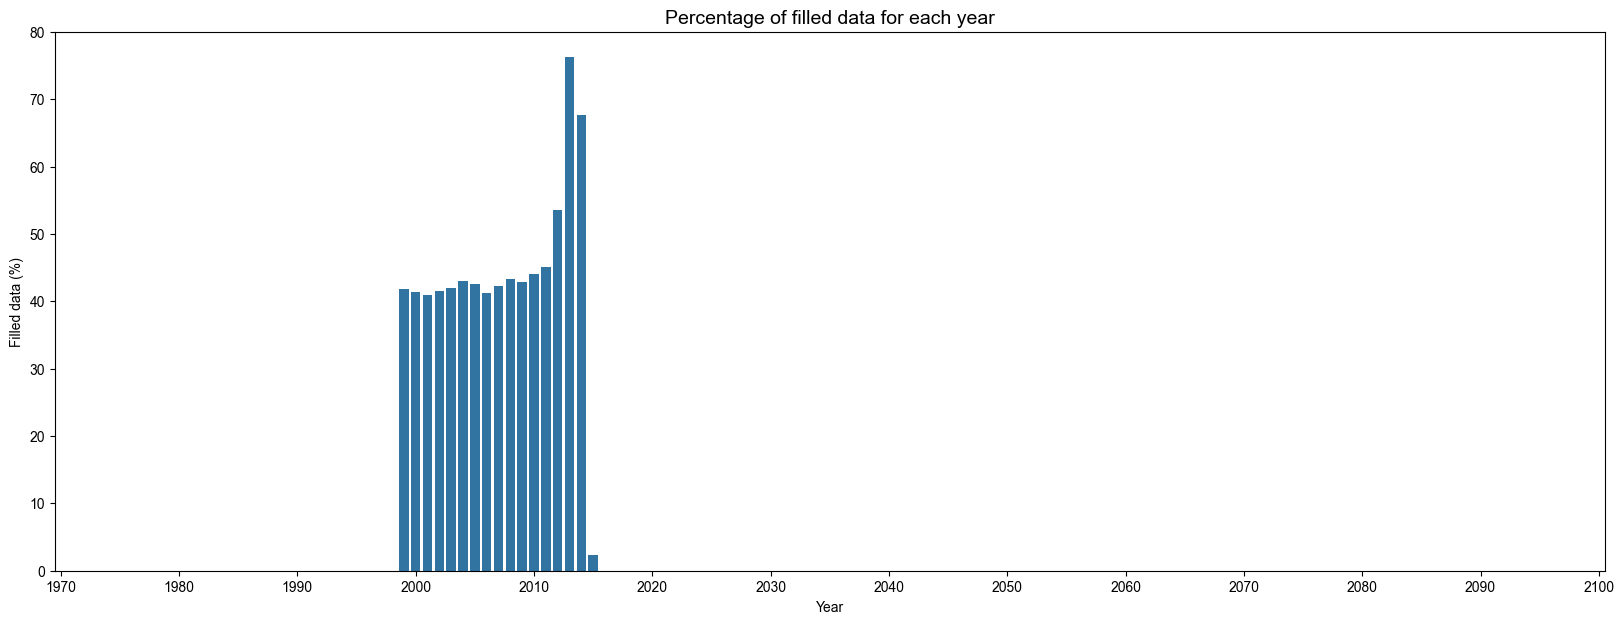

In [11]:
# Calculate the percentage of filled data for each year

# Drop the 'Unnamed: 69' column as it contains no data
total_entries = ed_stats_data.loc[ed_stats_data["Indicator Code"].isin(["UIS.E.3", "UIS.E.5.B", "UIS.E.6", "UIS.E.7"])].shape[0]

# Initialize an empty DataFrame to store the results
filled_percentage_per_year = {"Year":[], "Filled percentage":[]}

# Calculate the percentage of filled data for each year
for year in range(1970,2101):
    filled_percentage_per_year["Year"].append(int(year))
    if str(year) in ed_stats_data.columns:
        filled_entries = ed_stats_data.loc[ed_stats_data["Indicator Code"].isin(["UIS.E.3", "UIS.E.5.B", "UIS.E.6", "UIS.E.7"]), str(year)].count()
        filled_percentage_per_year["Filled percentage"].append(round((filled_entries / total_entries) * 100, 2))
    else:
        filled_percentage_per_year["Filled percentage"].append(0)

df_filled_percentage_per_year = pd.DataFrame(filled_percentage_per_year, index = filled_percentage_per_year["Year"], columns = ["Filled percentage"])
df_filled_percentage_per_year
# Visualize the years for which there is most data

plt.figure(figsize=(20,7))
sns.barplot(df_filled_percentage_per_year, x=df_filled_percentage_per_year.index, y="Filled percentage")
plt.xticks(np.arange(min(df_filled_percentage_per_year.index), max(df_filled_percentage_per_year.index)+1, 10).astype('str'))
plt.ylabel("Filled data (%)")
plt.xlabel("Year")
plt.title("Percentage of filled data for each year", fontsize=14)
sns.set_theme(palette="dark")
plt.show()

For any given criterion listed above, there are sometimes several indicators which are quite similar.  
Let's determine which are the most relevant.

Let's create a new variable "Filled percentage" representing the percentage of filled data. This will help determining the most relevant indicators.

In [4]:
# Calculate the percentage of filled data for each indicator
def calculate_filled_percentage(row):
    total_columns = len(row) - 4  # Exclude the first 4 columns (Country Name, Country Code, Indicator Name, Indicator Code)
    filled_columns = row[4:].count()  # Count non-null values from the 5th column onwards
    return round((filled_columns / total_columns) * 100, 2)

ed_stats_data.loc[:, 'Filled Percentage'] = ed_stats_data.apply(calculate_filled_percentage, axis=1)

In [6]:
# Display indicators sorted by Filled Percentage

# Group by Indicator Code and calculate the average filled percentage
indicator_filled_percentage = ed_stats_data.groupby('Indicator Code')["Filled Percentage"].mean().round(2).reset_index()

# Sort by filled percentage in descending order
indicator_filled_percentage = indicator_filled_percentage.sort_values(by='Filled Percentage', ascending=False)

display(indicator_filled_percentage)

,Indicator Code,Filled Percentage
2590,SP.POP.TOTL,69.84
2589,SP.POP.GROW,69.80
2510,SP.POP.1564.TO.ZS,64.13
2404,SP.POP.0014.TO.ZS,64.07
2594,SP.POP.TOTL.MA.ZS,64.07
...,...,...
959,LO.EGRA.READ.0.SPN.2GRD,0.01
960,LO.EGRA.READ.0.SPN.3GRD,0.01
961,LO.EGRA.READ.0.SPN.4GRD,0.01
809,LO.EGRA.LSTN.0.TIG.2GRD,0.01


In [7]:
indicators_to_compare = ['SE.PRM.PRIV.ZS', 'SE.PRM.DROP.FE.ZS', 'UIS.SLE.12.F', 'NY.GDP.MKTP.PP.CD', 'UIS.FEP.4', 'UIS.MS.56.T', 'UIS.E.2.GPV', 'NY.GNP.MKTP.CD', 'UIS.E.8', 'UIS.SAP.4', 'SE.PRE.TCHR', 'SP.PRM.TOTL.IN', 'NY.GDP.MKTP.KD', 'UIS.NERT.2.M', 'UIS.ROFST.2.M', 'SP.POP.0014.TO', 'SE.PRM.TCHR', 'SE.PRM.PRSL.FE.ZS', 'UIS.SLE.1T6.GPI', 'UIS.ESL.1.M', 'UIS.SLE.0.GPI', 'UIS.SLE.0.M', 'SE.SEC.ENRL', 'UIS.TEP.5.B', 'UIS.MS.56.F', 'UIS.NIRA.1.M', 'UIS.GOER.56', 'UIS.PTRHC.3', 'UIS.GTVP.2.GPV.M', 'UIS.NER.23.GPI', 'NY.GDP.MKTP.CD', 'UIS.FEP.56.FOREIGN', 'UIS.E.1.G4', 'SP.TER.TOTL.IN', 'UIS.OFST.2.F', 'SE.SEC.ENRL.GC.FE', 'UIS.E.2.GPV.F', 'SP.POP.1564.TO', 'UIS.SAP.4.M', 'NY.GNP.PCAP.PP.CD', 'UIS.GER.0.GPI', 'SE.PRM.ENRL.FE.ZS', 'SP.SEC.LTOT.IN', 'SP.POP.TOTL.FE.IN', 'UIS.GER.12.M', 'SP.POP.TOTL.MA.IN', 'SE.PRM.UNER.FE', 'UIS.GTVP.23.GPV.M', 'UIS.E.1.PR', 'SE.SEC.ENRL.VO.FE.ZS', 'SE.PRM.ENRR', 'IT.NET.USER.P2', 'UIS.E.3.V.F', 'UIS.SAP.1.G1', 'SE.SEC.ENRR.MA', 'UIS.NERT.2', 'UIS.TEP.8', 'SE.PRM.GINT.FE.ZS', 'UIS.E.23.PR', 'UIS.E.7.F', 'SL.TLF.TOTL.FE.ZS', 'UIS.GER.12.GPI', 'SE.SEC.ENRL.VO.ZS', 'UIS.SLE.56', 'SE.PRM.NENR.FE', 'SP.SEC.UTOT.IN', 'SE.TER.ENRR', 'UIS.GER.12', 'SE.SEC.ENRR.UP.FE', 'UIS.GER.3.GPI', 'UIS.SLE.1.M', 'UIS.TEP.6', 'UIS.E.6.F', 'UIS.OE.56.40510', 'UIS.GER.1T6.F', 'UIS.GTVP.2.V.M', 'UIS.ESL.1.T', 'SE.PRM.ENRL.FE', 'SE.PRM.GINT.MA.ZS', 'UIS.SAP.1.G1.F', 'UIS.OFST.3.M.CP', 'UIS.GTVP.2.V', 'UIS.GTVP.2.GPV.F', 'SP.POP.TOTL', 'UIS.ROFST.3.M.CP', 'UIS.GTVP.3.GPV.F', 'UIS.SAP.23.GPV.G1', 'UIS.GTVP.3.GPV', 'UIS.GER.123', 'UIS.E.1.G4.F', 'UIS.E.2', 'UIS.E.4.PR', 'UIS.GTVP.23.GPV', 'SL.TLF.TOTL.IN', 'SP.POP.1564.MA.IN', 'UIS.E.1.G6', 'UIS.E.1.G1', 'UIS.OFST.2', 'UIS.ROFST.2', 'UIS.GER.123.F', 'SE.SEC.ENRL.GC', 'SP.PRM.TOTL.FE.IN', 'UIS.ROFST.1', 'SE.TER.ENRR.MA', 'UIS.OMR.56', 'UIS.PTRHC.2', 'IT.CMP.PCMP.P2', 'SE.SEC.ENRR.LO.FE', 'SE.PRM.TENR', 'UIS.FTP.2', 'UIS.FEP.3', 'UIS.E.8.F', 'UIS.E.1.G2', 'UIS.FEP.3.GPV', 'SE.PRM.ENRL.TC.ZS', 'UIS.E.1.G2.F', 'UIS.PRP.4', 'UIS.E.1.G3', 'UIS.MSEP.56.F', 'UIS.E.7', 'SE.PRE.TCHR.FE.ZS', 'SE.SEC.ENRR.LO.MA', 'SP.POP.0014.MA.IN', 'UIS.E.1.G5', 'SE.TER.TCHR.FE.ZS', 'UIS.SR.1.GLAST.GPI', 'UIS.SLE.12.M', 'UIS.FNP.1', 'SE.ENR.PRSC.FM.ZS', 'UIS.SLE.123.F', 'UIS.E.1.G3.F', 'UIS.MSEP.56', 'UIS.E.1.G6.F', 'SE.PRM.DROP.MA.ZS', 'SE.TER.ENRL', 'SE.SEC.ENRL.VO.FE', 'UIS.SLE.123.M', 'SE.SEC.ENRL.FE.ZS', 'SE.SEC.TCHR.FE.ZS', 'SL.UEM.TOTL.FE.ZS', 'SE.SEC.NENR', 'SP.PRE.TOTL.MA.IN', 'UIS.NERT.2.F', 'UIS.E.3.GPV.F', 'UIS.SLE.56.GPI', 'SE.ENR.PRIM.FM.ZS', 'SE.TER.ENRL.FE', 'NY.GDP.MKTP.PP.KD', 'SE.PRE.ENRL.FE.ZS', 'UIS.T.3', 'UIS.FEP.6', 'UIS.OFST.3.F.CP', 'SE.PRM.TENR.FE', 'UIS.FEP.2', 'SE.PRM.TCHR.FE.ZS', 'SP.SEC.UTOT.FE.IN', 'UIS.E.3.F', 'SP.POP.GROW', 'SP.PRM.TOTL.MA.IN', 'UIS.SLE.123', 'UIS.GTVP.3.GPV.M', 'SE.PRM.UNER', 'NY.GDP.PCAP.PP.KD', 'UIS.SAP.23.GPV.G1.F', 'SE.SEC.ENRR', 'UIS.E.1.G5.F', 'SP.SEC.TOTL.MA.IN', 'UIS.E.4.F', 'UIS.GTVP.3.V.F', 'SE.PRE.ENRL.FE', 'SE.TER.TCHR.FE', 'UIS.E.2.F', 'SE.SEC.ENRL.FE', 'SE.PRM.ENRR.FE', 'UIS.GTVP.2.GPV', 'UIS.FEP.8', 'SL.UEM.TOTL.MA.ZS', 'SE.PRM.UNER.MA', 'SL.UEM.TOTL.ZS', 'UIS.E.2.V.F', 'UIS.T.3.F', 'UIS.GER.1T6.M', 'UIS.AIR.1.GPI', 'SE.PRM.ENRR.MA', 'SE.SCH.LIFE', 'UIS.E.3.V', 'SP.PRM.GRAD.TO', 'UIS.SLE.1.F', 'UIS.NIRA.1.GPI', 'UIS.GTVP.3.V', 'UIS.SLE.0', 'UIS.NERT.2.GPI', 'SE.PRM.TCHR.FE', 'UIS.ROFST.2.F', 'NY.GDP.PCAP.KD', 'SE.PRE.ENRR.FE', 'UIS.ROFST.3.F.CP', 'UIS.NE.1.G1', 'SE.SEC.ENRL.MA.VO.ZS', 'SE.SEC.NENR.FE', 'SE.PRE.ENRR', 'SE.PRE.ENRR.MA', 'SE.TOT.ENRR', 'SH.DYN.MORT', 'UIS.TEP.7', 'SP.PRE.TOTL.FE.IN', 'UIS.E.5.B.F', 'UIS.SAP.4.F', 'SE.PRE.TCHR.FE', 'UIS.GER.123.M', 'SE.PRM.GINT.ZS', 'UIS.NIRA.1', 'SE.PRM.DROP.ZS', 'NY.GDP.PCAP.PP.CD', 'UIS.OFST.3.CP', 'UIS.E.3', 'SP.POP.TOTL.MA.ZS', 'UIS.GER.1T6.GPI', 'UIS.FEP.3.V', 'UIS.SAP.1.G1.M', 'NY.GNP.PCAP.CD', 'UIS.GTVP.2.V.F', 'NY.GNP.MKTP.PP.CD', 'SE.TER.ENRL.FE.ZS', 'UIS.SAP.23.GPV.G1.M', 'SP.POP.TOTL.FE.ZS', 'UIS.SLE.0.F', 'SE.PRM.PRSL.MA.ZS', 'SE.PRM.ENRL', 'UIS.NER.2', 'SP.POP.0014.FE.IN', 'SE.SEC.ENRR.UP', 'SE.SEC.ENRL.TC.ZS', 'SE.TER.ENRR.FE', 'UIS.SLE.12', 'UIS.ROFST.3.CP', 'SE.SEC.ENRR.UP.MA', 'UIS.SLE.1', 'SP.SEC.LTOT.MA.IN', 'NY.GDP.PCAP.CD', 'SE.SEC.ENRR.FE', 'SP.SEC.UTOT.MA.IN', 'UIS.ROFST.1.F', 'UIS.SLE.123.GPI', 'SP.SEC.TOTL.FE.IN', 'UIS.FEP.5.B', 'UIS.E.4', 'SP.PRM.GRAD.MA', 'UIS.E.2.V', 'UIS.GER.2.GPI', 'UIS.NIRA.1.F', 'UIS.E.1.G1.F', 'UIS.OFST.2.M', 'SE.SEC.TCHR', 'SP.TER.TOTL.MA.IN', 'UIS.NE.1.G1.F', 'UIS.E.0.PR.T', 'SE.ENR.TERT.FM.ZS', 'SE.SEC.NENR.MA', 'SE.PRE.PRIV.ZS', 'SP.SEC.LTOT.FE.IN', 'UIS.T.2.F', 'SP.TER.TOTL.FE.IN', 'UIS.E.3.GPV', 'SP.PRE.TOTL.IN', 'SE.SEC.ENRR.LO', 'SE.TER.TCHR', 'UIS.T.2', 'UIS.SLE.56.F', 'SE.SEC.ENRL.VO', 'UIS.MSEP.56.M', 'SE.PRM.PRSL.ZS', 'SE.SEC.ENRL.FE.VO.ZS', 'SP.POP.0014.TO.ZS', 'SE.SEC.TCHR.FE', 'SE.PRM.NENR', 'SP.POP.1564.FE.IN', 'UIS.FTP.3', 'UIS.NERT.1.GPI', 'SP.POP.1564.TO.ZS', 'UIS.E.6', 'SE.PRM.NENR.MA', 'UIS.ESL.1.F', 'SP.SEC.TOTL.IN', 'SE.PRE.ENRL', 'UIS.E.5.B', 'SE.SEC.ENRL.GC.FE.ZS', 'SE.ENR.SECO.FM.ZS', 'SE.PRM.TENR.MA', 'SE.SCH.LIFE.MA', 'UIS.GTVP.3.V.M', 'SE.SCH.LIFE.FE', 'SE.PRE.ENRL.TC.ZS', 'SE.SEC.PRIV.ZS', 'UIS.NER.1.GPI', 'UIS.GTVP.23.GPV.F', 'UIS.SLE.56.M', 'UIS.FEP.7', 'UIS.NERA.1.GPI', 'UIS.GER.12.F', 'SP.PRM.GRAD.FE', 'UIS.ROFST.1.M']

indicator_filled_percentage.loc[indicator_filled_percentage["Indicator Code"].isin(indicators_to_compare)]


,Indicator Code,Filled Percentage
2590,SP.POP.TOTL,69.84
2589,SP.POP.GROW,69.80
2510,SP.POP.1564.TO.ZS,64.13
2404,SP.POP.0014.TO.ZS,64.07
2594,SP.POP.TOTL.MA.ZS,64.07
...,...,...
2844,UIS.E.6.F,1.84
2845,UIS.E.7,1.75
3539,UIS.TEP.7,1.75
2944,UIS.FEP.7,1.73


<Axes: xlabel='Country Name', ylabel='Indicator Code'>

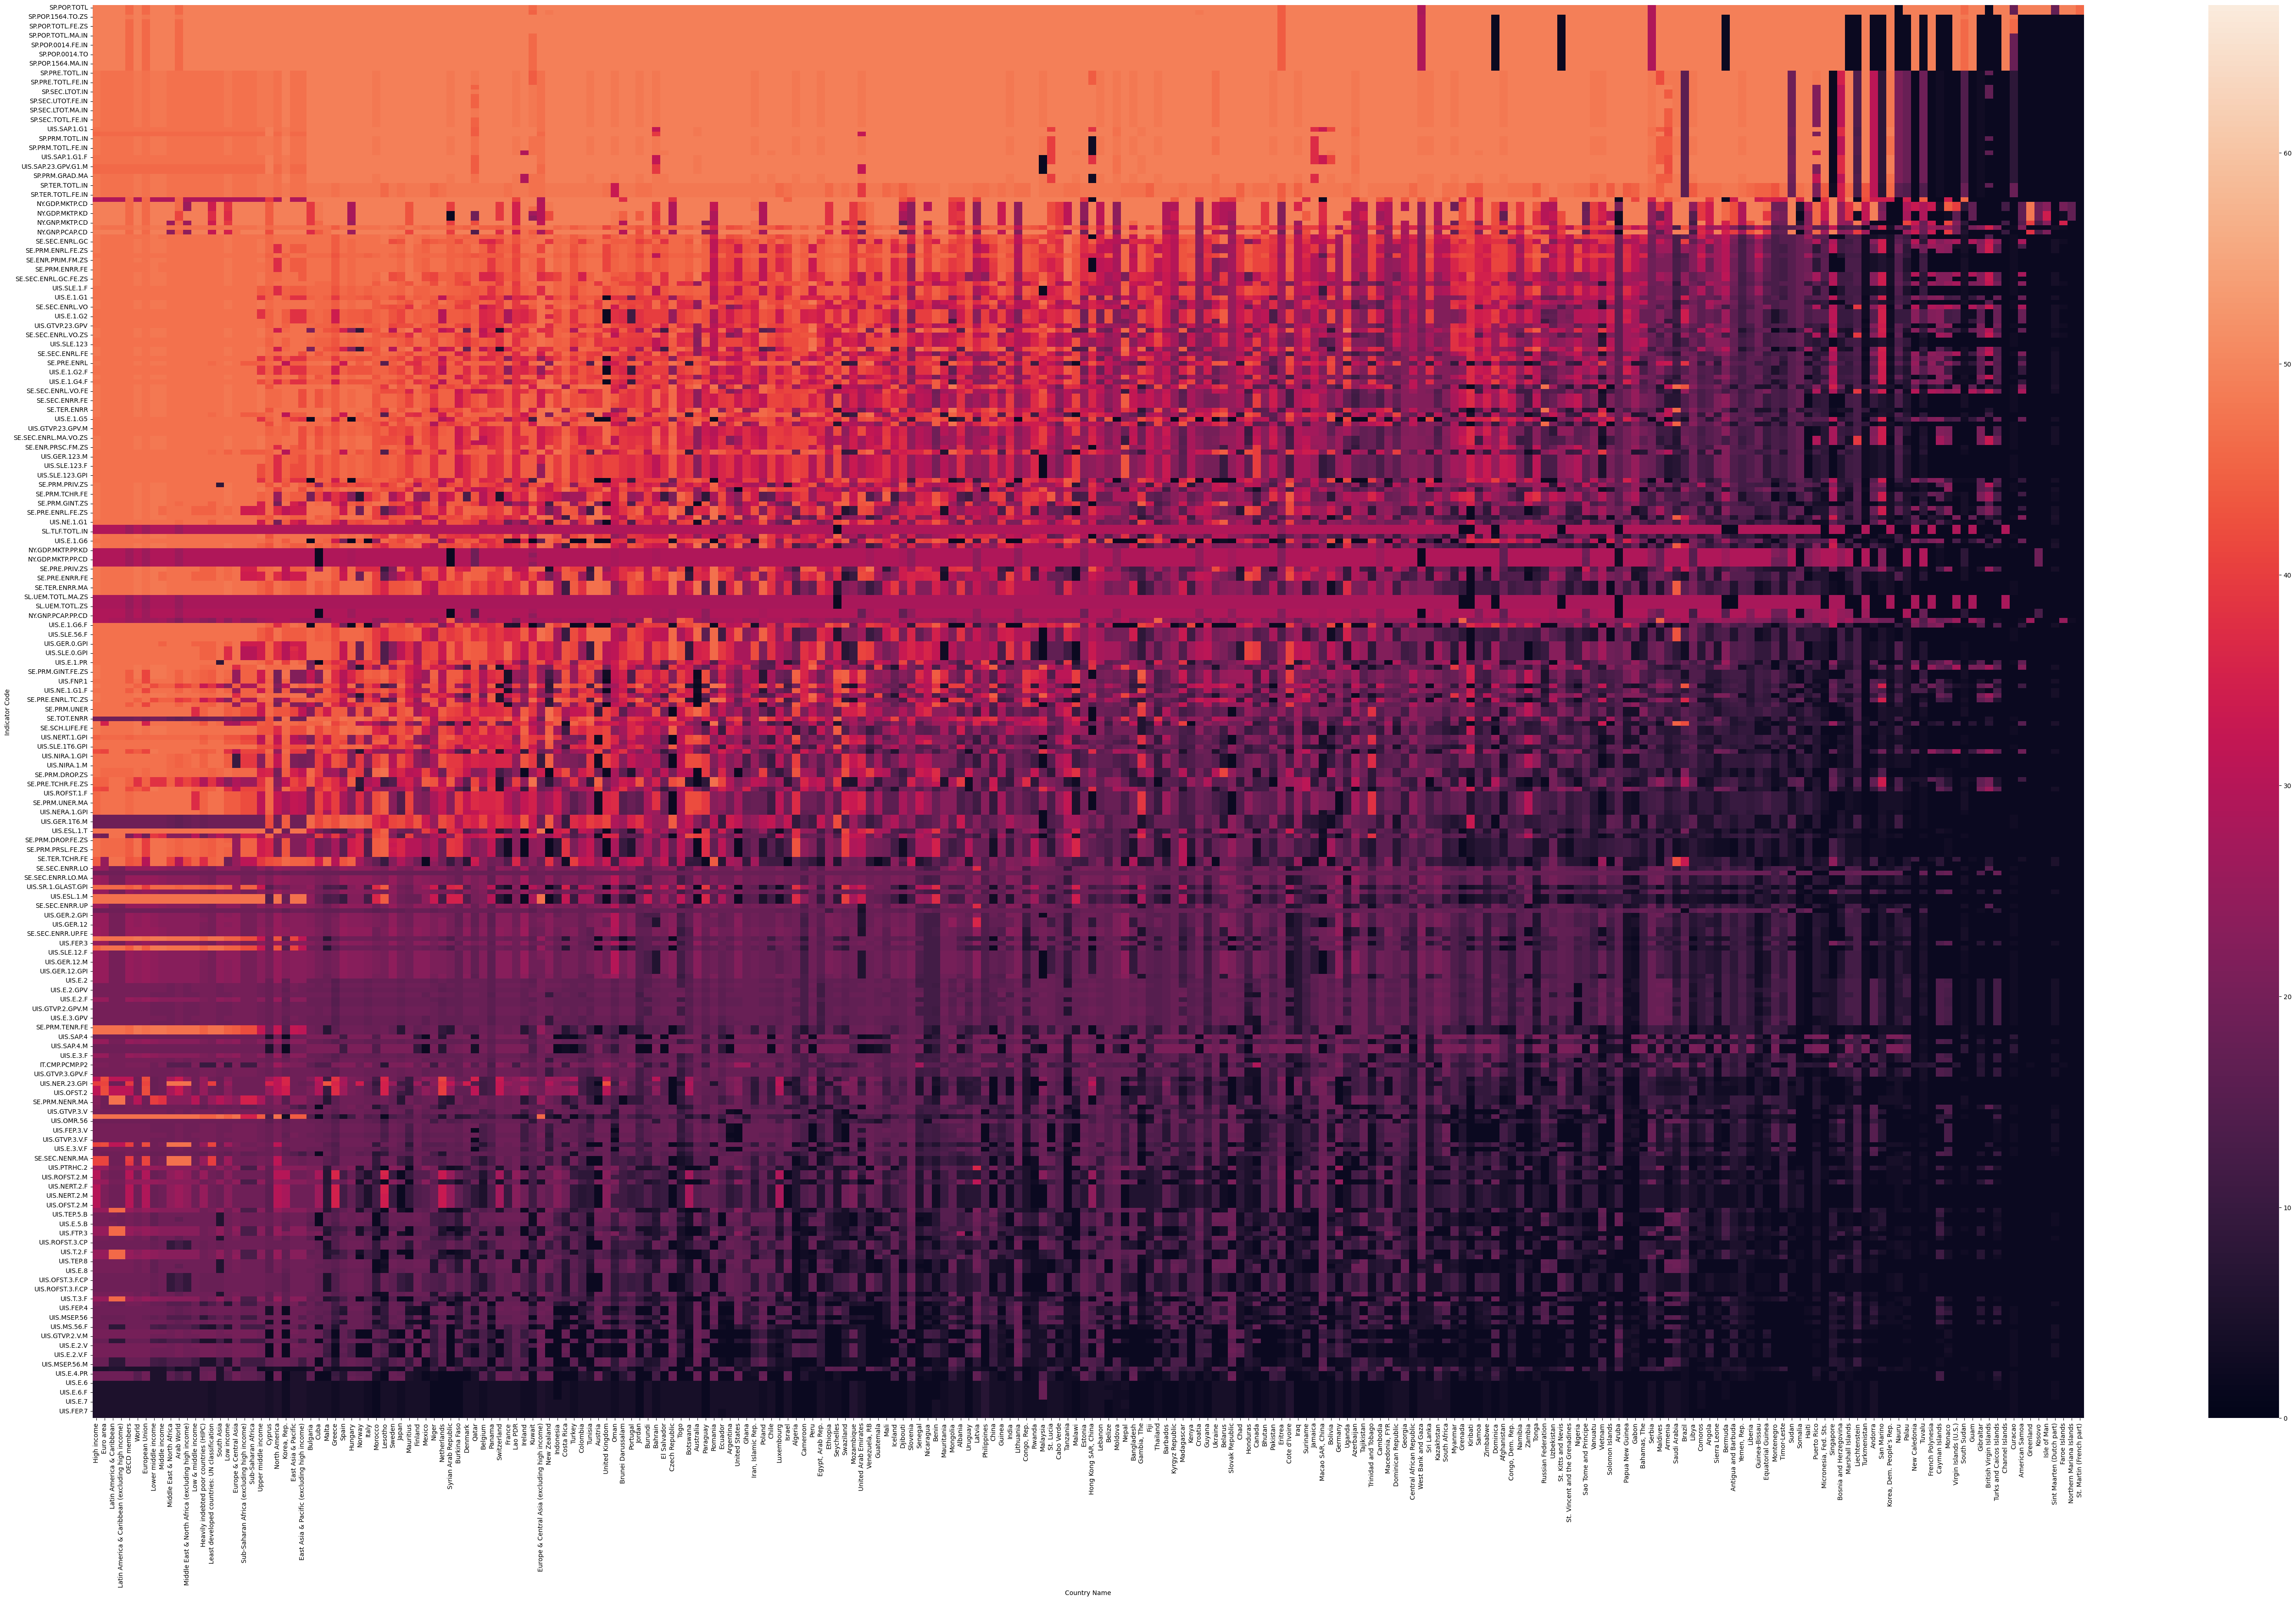

In [8]:
# Step 1: Melt the DataFrame to have years as rows
melted_data = ed_stats_data[ed_stats_data["Indicator Code"].isin(indicators_to_compare)].melt(id_vars=['Indicator Code', 'Country Name', 'Filled Percentage'], 
                                   var_name='Year', 
                                   value_name='Value')

# Step 2: Filter to keep only non-null values
non_null_counts = melted_data[melted_data['Value'].notnull()]

# Step 3: Create a pivot table
pivot_table = non_null_counts.pivot_table(index='Indicator Code', 
                                           columns='Country Name', 
                                           values='Year', 
                                           aggfunc='count', 
                                           fill_value=0)  # Fill NaNs with 0
# Step 4: Add total row
pivot_table.loc['Total'] = pivot_table.sum()


# Step 5: Add total column
pivot_table['Total'] = pivot_table.sum(axis=1)

pivot_table = pivot_table.sort_values(by="Total", axis=1, ascending = False).sort_values(by="Total", axis=0, ascending = False)

# setting the dimensions of the plot
plt.figure(figsize=(70, 40))

sns.heatmap(pivot_table.loc[pivot_table.index != "Total", pivot_table.columns != "Total"], vmin=0, vmax=len(ed_stats_data.columns[4:]))

In [4]:
len(ed_stats_series.loc[ed_stats_series["Topic"].isin(["Expenditures", "Teachers"]), "Series Code"].tolist())

230

In [139]:
ed_stats_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2932 entries, 65 to 357401
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country Name       2932 non-null   object 
 1   Country Code       2932 non-null   object 
 2   Indicator Name     2932 non-null   object 
 3   Indicator Code     2932 non-null   object 
 4   1999               1403 non-null   float64
 5   2000               1554 non-null   float64
 6   2001               1444 non-null   float64
 7   2002               1477 non-null   float64
 8   2003               1574 non-null   float64
 9   2004               1509 non-null   float64
 10  2005               1477 non-null   float64
 11  2006               1560 non-null   float64
 12  2007               1368 non-null   float64
 13  2008               1359 non-null   float64
 14  2009               1567 non-null   float64
 15  2010               1396 non-null   float64
 16  2011               1432 no

In [15]:
def count_common_countries(df: pd.DataFrame, indicators: list) -> int:
    """
    Count the number of countries that have data for all specified indicators.

    Parameters:
    df (pd.DataFrame): The DataFrame containing country data.
    indicators (list): A list of indicator names to check.

    Returns:
    int: The number of countries that have data for all specified indicators.
    """
    # Filter the DataFrame for the specified indicators
    filtered_df = df[df['Indicator Code'].isin(indicators)]

    # Pivot the DataFrame to have countries as rows and indicators as columns
    pivoted_df = filtered_df.pivot_table(index='Country Name', columns='Indicator Code', values='Filled Percentage', aggfunc='first')

    # Count the countries with non-null values for all specified indicators
    common_countries = pivoted_df.dropna(subset=indicators)

    return common_countries  # Number of countries

# Example usage:
#indicators_list = ["UIS.E.3", "UIS.E.5.B", "SE.TER.ENRL", "SE.SEC.ENRR.UP", "SE.TER.ENRR", "IT.CMP.PCMP.P2", "IT.NET.USER.P2", "NY.GDP.PCAP.PP.KD"]
indicators_list = indicators_to_compare
 # Replace with actual indicator names
common_countries = count_common_countries(ed_stats_data, indicators_list)

In [16]:
common_countries

Indicator Code,UIS.E.3,UIS.E.5.B,UIS.E.6,UIS.E.7
Country Name,,,,
Afghanistan,72.22,5.56,5.56,5.56
Albania,88.89,44.44,11.11,11.11
Andorra,72.22,11.11,11.11,11.11
Arab World,88.89,88.89,16.67,16.67
Argentina,83.33,83.33,11.11,11.11
...,...,...,...,...
United States,88.89,83.33,11.11,11.11
Upper middle income,88.89,88.89,16.67,16.67
West Bank and Gaza,88.89,88.89,11.11,11.11


In [229]:
def correlation(country_code, ind_code1, ind_code2):
    years = ed_stats_data.columns[ed_stats_data.columns.str.isnumeric()]
    country_df = ed_stats_data.loc[(ed_stats_data["Country Code"] == country_code) & (ed_stats_data["Indicator Code"].isin([ind_code1, ind_code2]))]
    country_df.set_index("Indicator Code", inplace=True)
    country_df = country_df[years].transpose()
    sns.scatterplot(country_df, x=ind_code1, y=ind_code2)
    plt.show()
    return np.corrcoef(country_df[ind_code1], country_df[ind_code2])


In [ ]:
def correlation_all_countries(countries, ind_code1, ind_code2):
    for country in countries:
        years = ed_stats_data.columns[ed_stats_data.columns.str.isnumeric()]
        country_df = ed_stats_data.loc[(ed_stats_data["Country Name"] == country) & (ed_stats_data["Indicator Code"].isin([ind_code1, ind_code2]))]
        country_df.set_index("Indicator Code", inplace=True)
        country_df = country_df[years].transpose()

        # Calculate linear regression parameters using OLS method
        Y = country_df[ind_code2]
        X = country_df[[ind_code1]] # On modifiera X, on en crée donc une copie
        X['intercept'] = 1.
        result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
        a, b, rsquared = result.params['Year'], result.params['intercept'], result.rsquared
        x_reg_line = np.linspace(X["Year"].min(), X["Year"].max(), num=2)
        y_reg_line = a * x_reg_line + b
        sns.scatterplot(country_df, x=ind_code1, y=ind_code2)
        plt.show()
        
    
    return np.corrcoef(country_df[ind_code1], country_df[ind_code2])


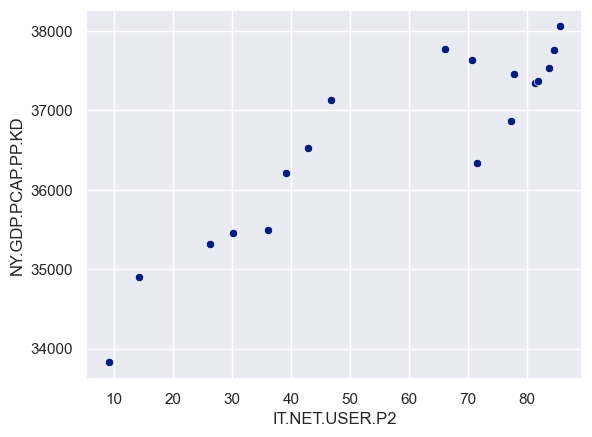

array([[1.        , 0.90972349],
       [0.90972349, 1.        ]])

In [230]:
correlation("FRA", "IT.NET.USER.P2", "NY.GDP.PCAP.PP.KD")

In [155]:
ed_stats_data.loc[ed_stats_data["Indicator Code"]]

,Country Name,Country Code,Indicator Name,Indicator Code,1999,2000,2001,2002,2003,2004,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Filled Percentage
65,Arab World,ARB,"Enrolment in tertiary education, all programmes, both sexes (number)",SE.TER.ENRL,4.875952e+06,5.089854e+06,5.400639e+06,5.798696e+06,5.955514e+06,6.465715e+06,...,8.006892e+06,8.382284e+06,8.715273e+06,8.594488e+06,9.147083e+06,9.688632e+06,9.966484e+06,NaN,NaN,88.89
67,Arab World,ARB,"Enrolment in tertiary education, ISCED 5 programmes, both sexes (number)",UIS.E.5.B,5.302846e+05,5.148767e+05,4.999205e+05,5.101809e+05,5.677510e+05,6.160004e+05,...,7.615262e+05,7.982681e+05,8.045393e+05,8.006934e+05,8.241692e+05,9.499818e+05,9.539314e+05,NaN,NaN,88.89
69,Arab World,ARB,"Enrolment in tertiary education, ISCED 6 programmes, both sexes (number)",UIS.E.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.435219e+06,7.809188e+06,8.064208e+06,NaN,NaN,16.67
71,Arab World,ARB,"Enrolment in tertiary education, ISCED 7 programmes, both sexes (number)",UIS.E.7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.744512e+05,8.066636e+05,8.168677e+05,NaN,NaN,16.67
75,Arab World,ARB,"Enrolment in upper secondary education, both sexes (number)",UIS.E.3,8.190412e+06,8.554936e+06,9.096402e+06,9.393456e+06,1.018652e+07,1.074748e+07,...,1.030286e+07,1.017877e+07,1.064478e+07,1.162018e+07,1.202761e+07,1.202161e+07,1.199598e+07,NaN,NaN,88.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356018,Zimbabwe,ZWE,"Gross enrolment ratio, upper secondary, both sexes (%)",SE.SEC.ENRR.UP,3.062389e+01,3.136677e+01,3.158360e+01,3.052315e+01,2.796657e+01,NaN,...,NaN,NaN,NaN,NaN,3.623769e+01,3.696362e+01,NaN,NaN,NaN,38.89
356050,Zimbabwe,ZWE,Internet users (per 100 people),IT.NET.USER.P2,1.616755e-01,4.014335e-01,7.998460e-01,1.100000e+00,1.800000e+00,2.100000e+00,...,3.500000e+00,4.000000e+00,6.400000e+00,8.400000e+00,1.200000e+01,1.550000e+01,1.636474e+01,22.742818,23.119989,100.00
356400,Zimbabwe,ZWE,"Percentage of teachers in secondary education who are trained, both sexes (%)",SE.SEC.TCAQ.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.109126e+01,7.295057e+01,NaN,NaN,NaN,11.11
356403,Zimbabwe,ZWE,Personal computers (per 100 people),IT.CMP.PCMP.P2,1.211169e+00,1.559544e+00,1.588971e+00,4.746489e+00,4.892251e+00,5.514830e+00,...,7.431140e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.00


In [151]:
ed_stats_data.loc[ed_stats_data["Country Code"].isin((ed_stats_data["Country Code"].value_counts() >= len(relevent_indicators)).index)]

,Country Name,Country Code,Indicator Name,Indicator Code,1999,2000,2001,2002,2003,2004,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Filled Percentage
65,Arab World,ARB,"Enrolment in tertiary education, all programmes, both sexes (number)",SE.TER.ENRL,4.875952e+06,5.089854e+06,5.400639e+06,5.798696e+06,5.955514e+06,6.465715e+06,...,8.006892e+06,8.382284e+06,8.715273e+06,8.594488e+06,9.147083e+06,9.688632e+06,9.966484e+06,NaN,NaN,88.89
67,Arab World,ARB,"Enrolment in tertiary education, ISCED 5 programmes, both sexes (number)",UIS.E.5.B,5.302846e+05,5.148767e+05,4.999205e+05,5.101809e+05,5.677510e+05,6.160004e+05,...,7.615262e+05,7.982681e+05,8.045393e+05,8.006934e+05,8.241692e+05,9.499818e+05,9.539314e+05,NaN,NaN,88.89
69,Arab World,ARB,"Enrolment in tertiary education, ISCED 6 programmes, both sexes (number)",UIS.E.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.435219e+06,7.809188e+06,8.064208e+06,NaN,NaN,16.67
71,Arab World,ARB,"Enrolment in tertiary education, ISCED 7 programmes, both sexes (number)",UIS.E.7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.744512e+05,8.066636e+05,8.168677e+05,NaN,NaN,16.67
75,Arab World,ARB,"Enrolment in upper secondary education, both sexes (number)",UIS.E.3,8.190412e+06,8.554936e+06,9.096402e+06,9.393456e+06,1.018652e+07,1.074748e+07,...,1.030286e+07,1.017877e+07,1.064478e+07,1.162018e+07,1.202761e+07,1.202161e+07,1.199598e+07,NaN,NaN,88.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356018,Zimbabwe,ZWE,"Gross enrolment ratio, upper secondary, both sexes (%)",SE.SEC.ENRR.UP,3.062389e+01,3.136677e+01,3.158360e+01,3.052315e+01,2.796657e+01,NaN,...,NaN,NaN,NaN,NaN,3.623769e+01,3.696362e+01,NaN,NaN,NaN,38.89
356050,Zimbabwe,ZWE,Internet users (per 100 people),IT.NET.USER.P2,1.616755e-01,4.014335e-01,7.998460e-01,1.100000e+00,1.800000e+00,2.100000e+00,...,3.500000e+00,4.000000e+00,6.400000e+00,8.400000e+00,1.200000e+01,1.550000e+01,1.636474e+01,22.742818,23.119989,100.00
356400,Zimbabwe,ZWE,"Percentage of teachers in secondary education who are trained, both sexes (%)",SE.SEC.TCAQ.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.109126e+01,7.295057e+01,NaN,NaN,NaN,11.11
356403,Zimbabwe,ZWE,Personal computers (per 100 people),IT.CMP.PCMP.P2,1.211169e+00,1.559544e+00,1.588971e+00,4.746489e+00,4.892251e+00,5.514830e+00,...,7.431140e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.00


In [134]:
#set(indicator_filled_percentage.loc[indicator_filled_percentage["Indicator Code"] == "SE.ADT.1524.LT.ZS", "Countries"].values[0]) - set(indicator_filled_percentage.loc[indicator_filled_percentage["Indicator Code"] == "LO.PIAAC.LIT.YOU", "Countries"].values[0])
set(ed_stats_data.loc[ed_stats_data["Indicator Code"] == "LO.PIAAC.LIT.YOU", "Country Name"].unique()) - set(ed_stats_data.loc[ed_stats_data["Indicator Code"] == "SE.ADT.1524.LT.ZS", "Country Name"].unique())

{'Australia',
 'Austria',
 'Canada',
 'Czech Republic',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Ireland',
 'Japan',
 'Korea, Rep.',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Slovak Republic',
 'Sweden',
 'United States'}

In [166]:
ed_stats_data.loc[ed_stats_data["Indicator Code"] == "SABER.PRVT.GOAL1", ["Country Name", "1980", "2000", "2005", "2010", "2014", "2015", "2016", "2017", "2020"]]

,Country Name,1980,2000,2005,2010,2014,2015,2016,2017,2020
33027,Bangladesh,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
129044,Ghana,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
202975,Malawi,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
213727,Mauritania,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
233954,Nepal,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
243732,Nigeria,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
278927,Senegal,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
306668,Swaziland,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
316626,Tanzania,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
354562,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN


__What information is needed to answer the problem ?__

We are looking for countries in which it would be interesting for *academia* to develop.

Where it would just be possible as weel (certifications standards, ...)


S'appuyer sur les critères qui semblent avoir jouer un rôle dans l'augmentation de la part du secteur privé dans les pays où elle a augmenté.


"Percentage of enrolment in secondary education in private institutions (%)"

- Series
  - Rechercher des indicatuers par mot clé grâce aux définitions, etc...
- Data
  - Tout, avec un focus sur les années multiples de 5 éventuellement car il y a plus de données. Focus sur les indicateurs communs entre tous les pays avec un income assez élevée
  - Regarder les indicateurs liés au développement des outils numériques (Personal computers, Internet users, ...) (présent + projections)
  - Regarder les indicateurs économiques (présent + projections)
  - Regarder les pays dans lesquels le système d'éducation est en développement ? (présent + projections)
  - Se concentrer sur les indicateurs des élèves de niveau licée / université
  - Est-ce que'on recherche plutôt des pays où les résultats sont mauvais ou alors où les résultats sont bons , Si les résultats sont bons, ça veut dire que le système éducatif en place fonctionne, pas de raison qu'ils aient besoin de formation en ligne supplémentaire. Donc plutôt viser des pays où les résultats sont assez mauvais ?
  - Proporiotn des différentes tranches d'age
  - Projection de proportion de jeunes / étudiants
- Country : Income Group ? -> Viser les pays qui en ont besoin
- FootNote : Year ? mais dans Data on a déjà l'information pour chaque indicateurs pour chaque année
- Country-Series : ?